In [1]:
!ls

CONTRIBUTING.md               adventureworks2008_schema.gif
LICENSE.md                    halfway-there.gif
Northwind_ERD.png             index.ipynb
Northwind_small.sqlite        mod-3-project.py
README.md                     nick_scratch.ipynb


In [2]:
import pandas as pd
import sqlite3

<img src='Northwind_ERD.png'>

In [7]:
conn = sqlite3.connect('Northwind_small.sqlite')
c = conn.cursor()

In [32]:
c.execute("""SELECT *
             FROM OrderDetail""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.00,12,0.00
1,10248/42,10248,42,9.80,10,0.00
2,10248/72,10248,72,34.80,5,0.00
3,10249/14,10249,14,18.60,9,0.00
4,10249/51,10249,51,42.40,40,0.00
5,10250/41,10250,41,7.70,10,0.00
6,10250/51,10250,51,42.40,35,0.15
7,10250/65,10250,65,16.80,15,0.15
8,10251/22,10251,22,16.80,6,0.05
9,10251/57,10251,57,15.60,15,0.05


In [34]:
df.columns

Index(['Id', 'OrderId', 'ProductId', 'UnitPrice', 'Quantity', 'Discount'], dtype='object')

In [42]:
sorted(df["ProductId"].unique()) == list(range(1,78))

True

In [36]:
groupby_productid = df.groupby('ProductId')

In [39]:
groupby_productid.nunique()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
ProductId,,,,,,
1,38,38,1,2,21,6
2,44,44,1,2,19,6
3,12,12,1,2,9,2
4,20,20,1,2,14,6
5,10,10,1,2,8,4
6,12,12,1,2,9,4
7,29,29,1,2,19,5
8,13,13,1,2,8,5
9,5,5,1,2,5,4


In [46]:
df.isnull().sum()

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

In [48]:
for productID in range(1,78):
    print(productID, len(df[df["ProductId"] == productID]))

1 38
2 44
3 12
4 20
5 10
6 12
7 29
8 13
9 5
10 33
11 38
12 14
13 40
14 22
15 6
16 43
17 37
18 27
19 37
20 16
21 39
22 14
23 20
24 51
25 18
26 32
27 9
28 33
29 32
30 32
31 51
32 15
33 32
34 19
35 36
36 31
37 6
38 24
39 30
40 41
41 47
42 30
43 28
44 24
45 14
46 27
47 21
48 6
49 21
50 10
51 39
52 29
53 30
54 36
55 33
56 50
57 23
58 18
59 54
60 51
61 24
62 48
63 17
64 30
65 32
66 8
67 10
68 34
69 31
70 39
71 42
72 38
73 14
74 13
75 46
76 39
77 38


In [49]:
product_id_df_dict = {}
for productID in range(1,78):
    product_id_df_dict[productID] = df[df["ProductId"] == productID]

In [51]:
for productID, product_df in product_id_df_dict.items():
    print(productID, len(product_df["Discount"].unique()))

1 6
2 6
3 2
4 6
5 4
6 4
7 5
8 5
9 4
10 6
11 6
12 5
13 6
14 7
15 2
16 7
17 5
18 6
19 6
20 6
21 6
22 3
23 6
24 6
25 6
26 6
27 2
28 6
29 5
30 5
31 6
32 5
33 6
34 5
35 6
36 6
37 3
38 5
39 6
40 6
41 6
42 6
43 5
44 6
45 5
46 7
47 5
48 3
49 4
50 3
51 6
52 6
53 5
54 6
55 6
56 6
57 5
58 6
59 6
60 7
61 5
62 6
63 5
64 6
65 5
66 3
67 4
68 5
69 6
70 6
71 6
72 5
73 6
74 3
75 6
76 6
77 6


In [52]:
len(df["Discount"].unique())

11

In [53]:
df["Discount"].unique()

array([0.  , 0.15, 0.05, 0.2 , 0.25, 0.1 , 0.02, 0.03, 0.04, 0.06, 0.01])

In [54]:
sorted(df["Discount"].unique())

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 0.15, 0.2, 0.25]

In [55]:
discount_dict_df = {}
for discount in sorted(df["Discount"].unique()):
    discount_dict_df[discount] = df[df["Discount"] == discount]

In [56]:
discount_dict_df.keys()

dict_keys([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 0.15, 0.2, 0.25])

In [57]:
import matplotlib.pyplot as plt

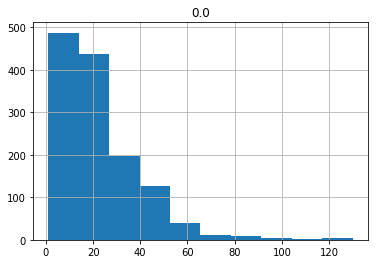

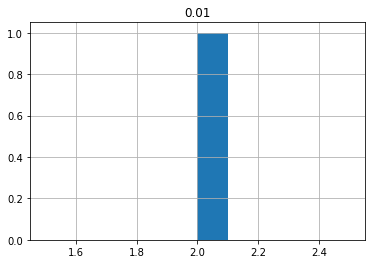

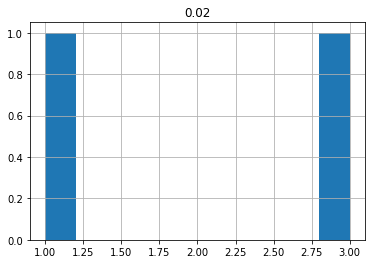

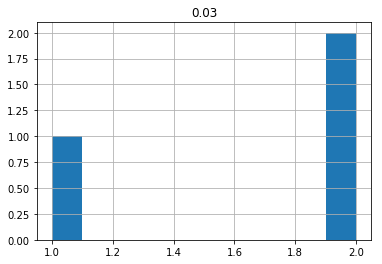

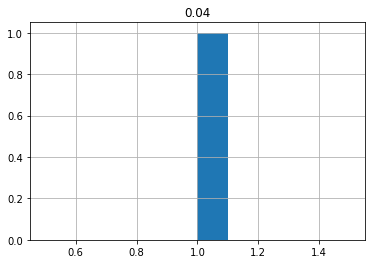

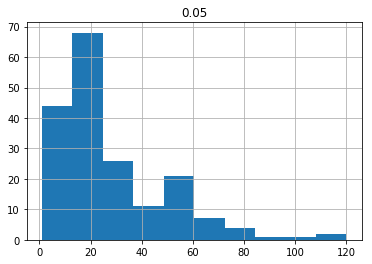

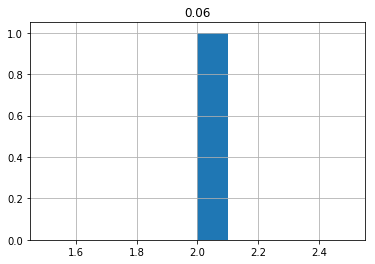

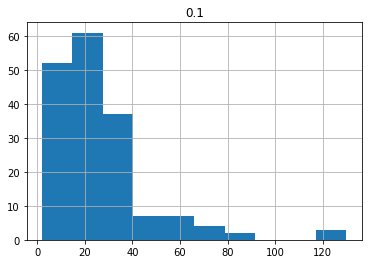

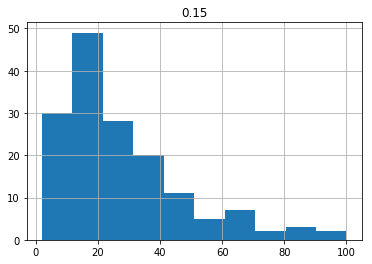

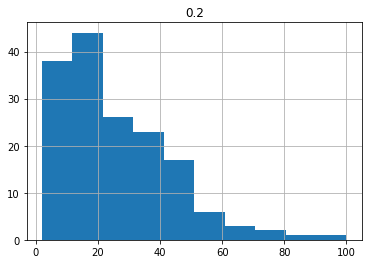

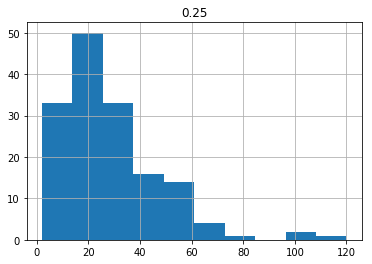

In [60]:
for discount, discount_df in discount_dict_df.items():
    plt.figure()
    discount_df["Quantity"].hist()
    plt.title(discount)

In [62]:
for discount, discount_df in discount_dict_df.items():
    print(discount, len(discount_df))

0.0 1317
0.01 1
0.02 2
0.03 3
0.04 1
0.05 185
0.06 1
0.1 173
0.15 157
0.2 161
0.25 154


In [63]:
import numpy as np

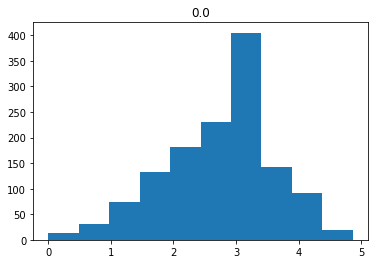

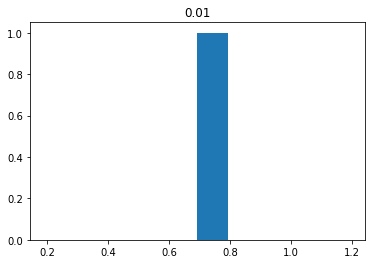

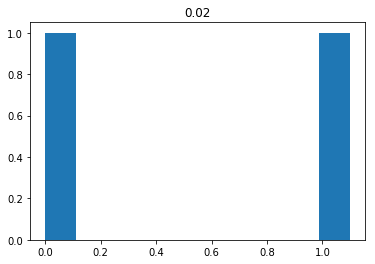

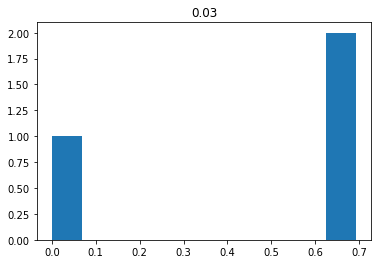

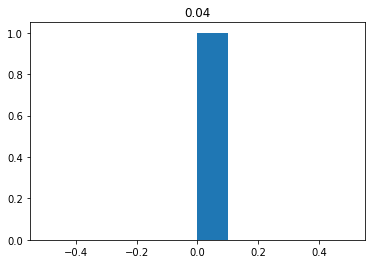

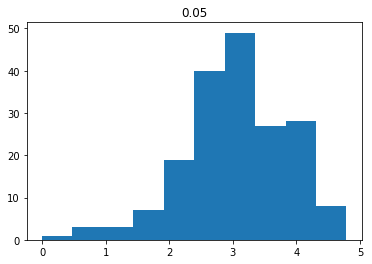

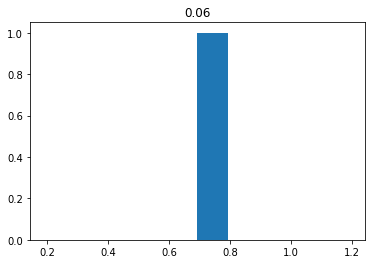

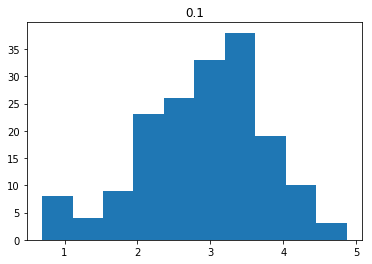

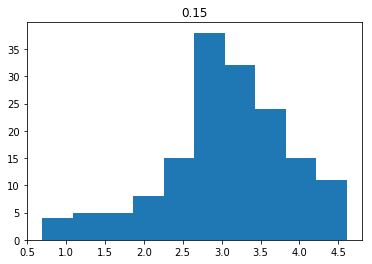

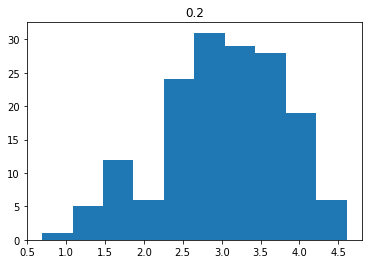

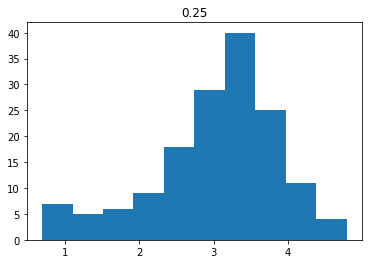

In [64]:
for discount, discount_df in discount_dict_df.items():
    plt.figure()
    plt.hist(np.log(discount_df["Quantity"]))
    plt.title(discount)

**_Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?_**

1. First, ask whether the mean log(quantity) of a product in an order is different for discounted vs non-discounted products (two sample test averaged over all products).
2. Second, ask whether different levels of discount (0%, 5%, 10%, 15%, 20%, 25%) have different distributions of log(quantity) ordered (ANOVA over all products).
3. Third, create a series of paired tests of individual products discounted vs. non-discounted.
4. Are higher priced products discounted more?
5. Are higher priced products ordered in lower quantity?

In [65]:
all_discounted_df = df[df["Discount"] > 0]

In [66]:
all_discounted_df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
6,10250/51,10250,51,42.4,35,0.15
7,10250/65,10250,65,16.8,15,0.15
8,10251/22,10251,22,16.8,6,0.05
9,10251/57,10251,57,15.6,15,0.05
11,10252/20,10252,20,64.8,40,0.05


In [67]:
all_non_discounted_df = df[df["Discount"] == 0]

In [68]:
all_non_discounted_df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [ ]:
# Import library and dataset
import seaborn as sns

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


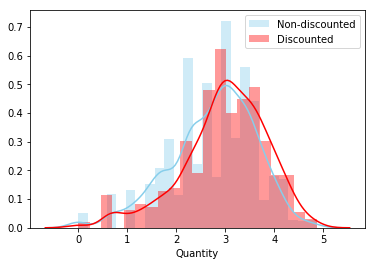

In [100]:
sns.distplot( np.log(all_non_discounted_df["Quantity"]) , color="skyblue", label="Non-discounted")
sns.distplot( np.log(all_discounted_df["Quantity"]) , color="red", label="Discounted")
plt.legend()

In [72]:
np.mean(np.log(all_non_discounted_df["Quantity"]))

2.753158244525603

In [73]:
np.mean(np.log(all_discounted_df["Quantity"]))

2.9909354388835294

In [110]:
c.execute("""SELECT *
             FROM OrderDetail""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [126]:
non_discounted_df = df[df["Discount"] == 0]
discounted_df = df[df["Discount"] > 0]

In [128]:
actual_differece = np.mean(discounted_df["Quantity"])-np.mean(non_discounted_df["Quantity"])

In [124]:
npermutations = 1000
differences = []
for _ in range(npermutations):
    permuted_df = df.copy()
    permuted_df["Quantity"] = np.random.permutation(permuted_df["Quantity"])
    permuted_non_discounted_df = permuted_df[permuted_df["Discount"] == 0]
    permuted_discounted_df = permuted_df[permuted_df["Discount"] > 0]
    differences.append(np.mean(permuted_discounted_df["Quantity"]) - \
                 np.mean(permuted_non_discounted_df["Quantity"]))

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


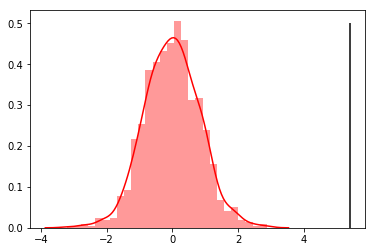

In [130]:
sns.distplot( differences , color="red", label="Differences")
plt.vlines(actual_differece, ymin=0, ymax=0.5)

# Logarithm of quantity

In [134]:
non_discounted_df = df[df["Discount"] == 0]
discounted_df = df[df["Discount"] > 0]

In [135]:
actual_differece = np.mean(np.log(discounted_df["Quantity"]))-np.mean(np.log(non_discounted_df["Quantity"]))

In [136]:
npermutations = 1000
differences = []
for _ in range(npermutations):
    permuted_df = df.copy()
    permuted_df["Quantity"] = np.random.permutation(permuted_df["Quantity"])
    permuted_non_discounted_df = permuted_df[permuted_df["Discount"] == 0]
    permuted_discounted_df = permuted_df[permuted_df["Discount"] > 0]
    differences.append(np.mean(np.log(permuted_discounted_df["Quantity"])) - \
                 np.mean(np.log(permuted_non_discounted_df["Quantity"])))

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


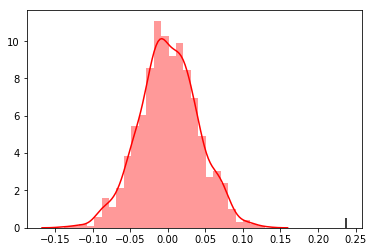

In [137]:
sns.distplot( differences , color="red", label="Differences")
plt.vlines(actual_differece, ymin=0, ymax=0.5)

In [132]:
sorted(df["Discount"].unique())

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 0.15, 0.2, 0.25]

In [133]:
discounts_to_investigate = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25]

In [138]:
non_discounted_df = df[df["Discount"] == 0]
discounted_df = df[df["Discount"] > 0]

In [139]:
actual_differece = np.mean(discounted_df["ProductId"])-np.mean(non_discounted_df["ProductId"])

In [142]:
npermutations = 10000
differences = []
for _ in range(npermutations):
    permuted_df = df.copy()
    permuted_df["ProductId"] = np.random.permutation(permuted_df["ProductId"])
    permuted_non_discounted_df = permuted_df[permuted_df["Discount"] == 0]
    permuted_discounted_df = permuted_df[permuted_df["Discount"] > 0]
    differences.append(np.mean(permuted_discounted_df["ProductId"]) - \
                 np.mean(permuted_non_discounted_df["ProductId"]))

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


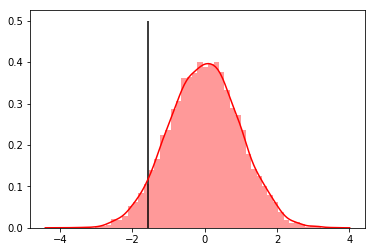

In [143]:
sns.distplot( differences , color="red", label="Differences")
plt.vlines(actual_differece, ymin=0, ymax=0.5)

In [144]:
df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [138]:
non_discounted_df = df[df["Discount"] == 0]
discounted_df = df[df["Discount"] > 0]

In [139]:
actual_differece = np.mean(discounted_df["OrderId"])-np.mean(non_discounted_df["OrderId"])

In [145]:
npermutations = 10000
differences = []
for _ in range(npermutations):
    permuted_df = df.copy()
    permuted_df["OrderId"] = np.random.permutation(permuted_df["OrderId"])
    permuted_non_discounted_df = permuted_df[permuted_df["Discount"] == 0]
    permuted_discounted_df = permuted_df[permuted_df["Discount"] > 0]
    differences.append(np.mean(permuted_discounted_df["OrderId"]) - \
                 np.mean(permuted_non_discounted_df["OrderId"]))

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


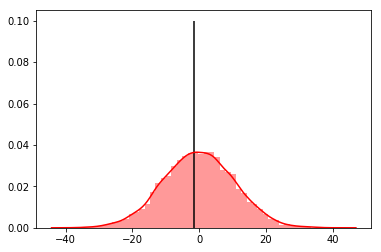

In [147]:
sns.distplot( differences , color="red", label="Differences")
plt.vlines(actual_differece, ymin=0, ymax=0.1)

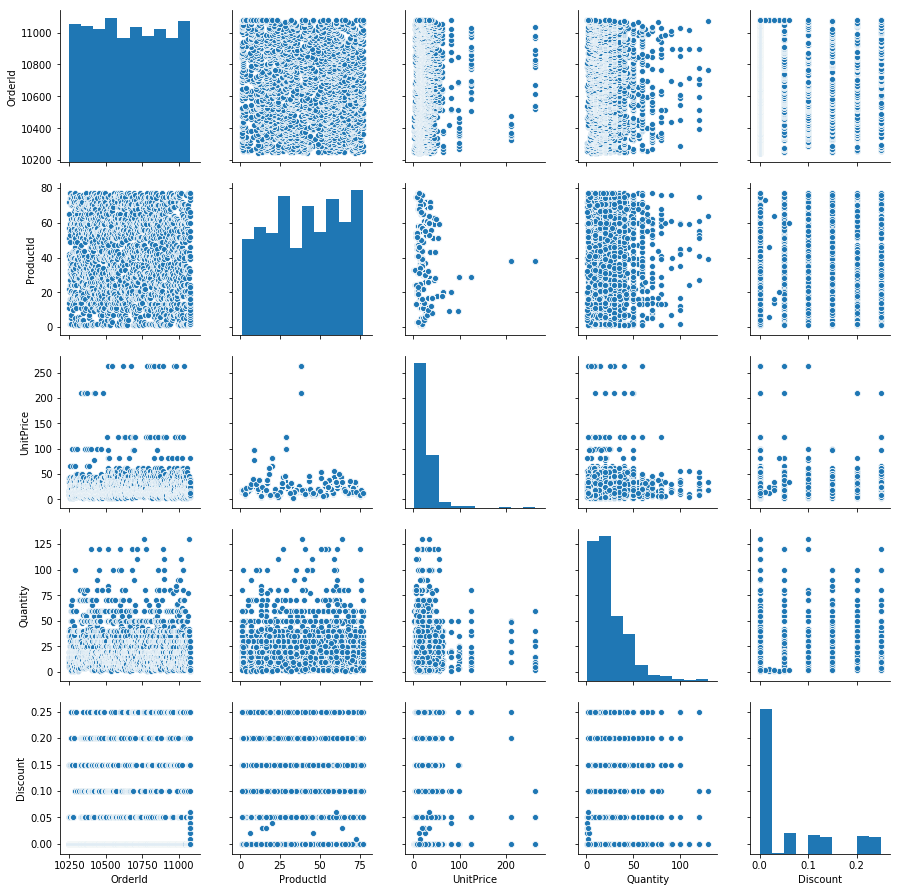

In [148]:
sns.pairplot(df)

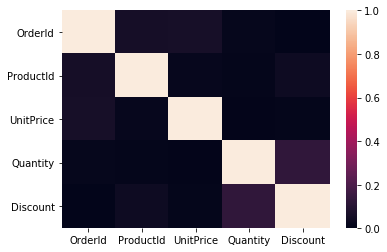

In [152]:
sns.heatmap(np.abs(df.corr()))

In [151]:
np.abs(df.corr())

,OrderId,ProductId,UnitPrice,Quantity,Discount
OrderId,1.000000,0.057118,0.061743,0.016260,0.002041
ProductId,0.057118,1.000000,0.019956,0.011932,0.037659
UnitPrice,0.061743,0.019956,1.000000,0.007366,0.011166
Quantity,0.016260,0.011932,0.007366,1.000000,0.128577
Discount,0.002041,0.037659,0.011166,0.128577,1.000000


In [153]:
df.corr?

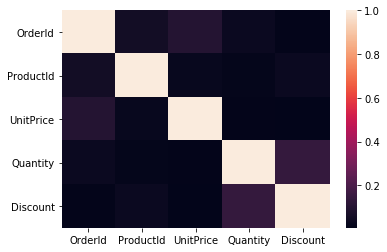

In [154]:
sns.heatmap(np.abs(df.corr(method='spearman')))

In [155]:
np.abs(df.corr(method='spearman'))

,OrderId,ProductId,UnitPrice,Quantity,Discount
OrderId,1.000000,0.055461,0.099738,0.036584,0.010801
ProductId,0.055461,1.000000,0.026355,0.016314,0.036501
UnitPrice,0.099738,0.026355,1.000000,0.013606,0.006226
Quantity,0.036584,0.016314,0.013606,1.000000,0.145893
Discount,0.010801,0.036501,0.006226,0.145893,1.000000


In [156]:
df.anova1way('Quantity', 'Discount')

AttributeError: 'DataFrame' object has no attribute 'anova1way'

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [161]:
mod = ols('Quantity ~ Discount',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df          F        PR(>F)
Discount   12884.989179     1.0  36.191587  2.095888e-09
Residual  766514.647015  2153.0        NaN           NaN


In [162]:
mod = ols('OrderId ~ Discount',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df         F    PR(>F)
Discount  5.230272e+02     1.0  0.008973  0.924542
Residual  1.254987e+08  2153.0       NaN       NaN


In [163]:
mod = ols('ProductId ~ Discount',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df        F    PR(>F)
Discount  1.499956e+03     1.0  3.05768  0.080499
Residual  1.056162e+06  2153.0      NaN       NaN


/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


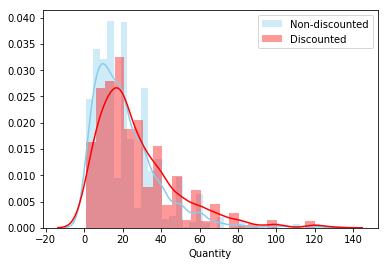

In [164]:
sns.distplot( all_non_discounted_df["Quantity"] , color="skyblue", label="Non-discounted")
sns.distplot( all_discounted_df["Quantity"] , color="red", label="Discounted")
plt.legend()

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


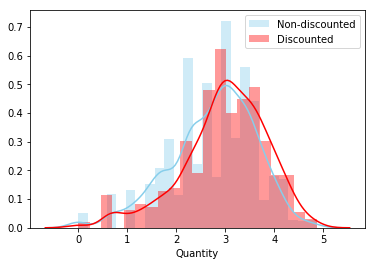

In [165]:
sns.distplot( np.log(all_non_discounted_df["Quantity"]) , color="skyblue", label="Non-discounted")
sns.distplot( np.log(all_discounted_df["Quantity"]) , color="red", label="Discounted")
plt.legend()

# Testing dependence on discount amount

In [170]:
non_discounted_df = df[df["Discount"] == 0]
discounted_df = df[(df["Discount"] > 0) & (df["Discount"] <= 0.05)]

In [171]:
actual_differece = np.mean(discounted_df["Quantity"])-np.mean(non_discounted_df["Quantity"])

In [172]:
npermutations = 1000
differences = []
for _ in range(npermutations):
    permuted_df = df.copy()
    permuted_df["Quantity"] = np.random.permutation(permuted_df["Quantity"])
    permuted_non_discounted_df = permuted_df[permuted_df["Discount"] == 0]
    permuted_discounted_df = permuted_df[(df["Discount"] > 0) & (df["Discount"] <= 0.05)]
    differences.append(np.mean(permuted_discounted_df["Quantity"]) - \
                 np.mean(permuted_non_discounted_df["Quantity"]))

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


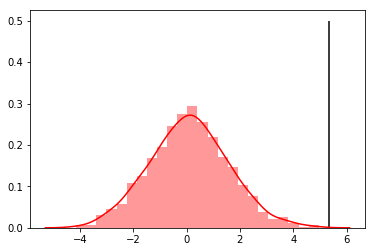

In [173]:
sns.distplot( differences , color="red", label="Differences")
plt.vlines(actual_differece, ymin=0, ymax=0.5)

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


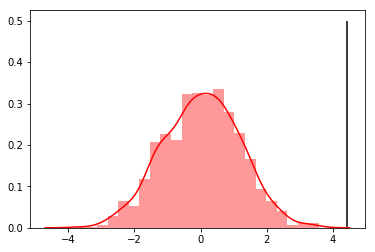

In [178]:
non_discounted_df = df[df["Discount"] == 0]
discounted_df = df[(df["Discount"] > 0) & (df["Discount"] <= 0.10)]

actual_differece = np.mean(discounted_df["Quantity"])-np.mean(non_discounted_df["Quantity"])

npermutations = 1000
differences = []
for _ in range(npermutations):
    permuted_df = df.copy()
    permuted_df["Quantity"] = np.random.permutation(permuted_df["Quantity"])
    permuted_non_discounted_df = permuted_df[permuted_df["Discount"] == 0]
    permuted_discounted_df = permuted_df[(df["Discount"] > 0) & (df["Discount"] <= 0.10)]
    differences.append(np.mean(permuted_discounted_df["Quantity"]) - \
                 np.mean(permuted_non_discounted_df["Quantity"]))

sns.distplot( differences , color="red", label="Differences")
plt.vlines(actual_differece, ymin=0, ymax=0.5)

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


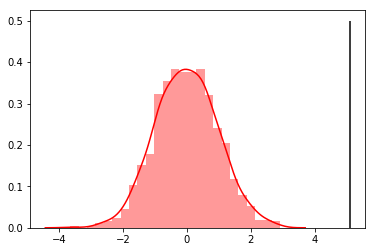

In [179]:
minimum_discount = 0.15

non_discounted_df = df[df["Discount"] == 0]
discounted_df = df[(df["Discount"] > 0) & (df["Discount"] <= minimum_discount)]

actual_differece = np.mean(discounted_df["Quantity"])-np.mean(non_discounted_df["Quantity"])

npermutations = 1000
differences = []
for _ in range(npermutations):
    permuted_df = df.copy()
    permuted_df["Quantity"] = np.random.permutation(permuted_df["Quantity"])
    permuted_non_discounted_df = permuted_df[permuted_df["Discount"] == 0]
    permuted_discounted_df = permuted_df[(df["Discount"] > 0) & (df["Discount"] <= minimum_discount)]
    differences.append(np.mean(permuted_discounted_df["Quantity"]) - \
                 np.mean(permuted_non_discounted_df["Quantity"]))

sns.distplot( differences , color="red", label="Differences")
plt.vlines(actual_differece, ymin=0, ymax=0.5)

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


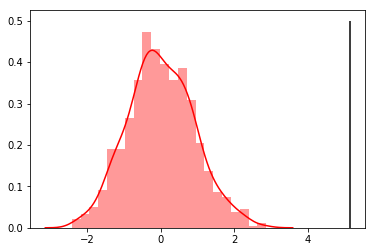

In [180]:
minimum_discount = 0.20

non_discounted_df = df[df["Discount"] == 0]
discounted_df = df[(df["Discount"] > 0) & (df["Discount"] <= minimum_discount)]

actual_differece = np.mean(discounted_df["Quantity"])-np.mean(non_discounted_df["Quantity"])

npermutations = 1000
differences = []
for _ in range(npermutations):
    permuted_df = df.copy()
    permuted_df["Quantity"] = np.random.permutation(permuted_df["Quantity"])
    permuted_non_discounted_df = permuted_df[permuted_df["Discount"] == 0]
    permuted_discounted_df = permuted_df[(df["Discount"] > 0) & (df["Discount"] <= minimum_discount)]
    differences.append(np.mean(permuted_discounted_df["Quantity"]) - \
                 np.mean(permuted_non_discounted_df["Quantity"]))

sns.distplot( differences , color="red", label="Differences")
plt.vlines(actual_differece, ymin=0, ymax=0.5)

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


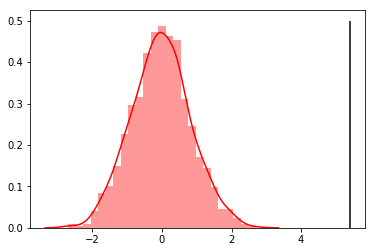

In [181]:
minimum_discount = 0.25

non_discounted_df = df[df["Discount"] == 0]
discounted_df = df[(df["Discount"] > 0) & (df["Discount"] <= minimum_discount)]

actual_differece = np.mean(discounted_df["Quantity"])-np.mean(non_discounted_df["Quantity"])

npermutations = 1000
differences = []
for _ in range(npermutations):
    permuted_df = df.copy()
    permuted_df["Quantity"] = np.random.permutation(permuted_df["Quantity"])
    permuted_non_discounted_df = permuted_df[permuted_df["Discount"] == 0]
    permuted_discounted_df = permuted_df[(df["Discount"] > 0) & (df["Discount"] <= minimum_discount)]
    differences.append(np.mean(permuted_discounted_df["Quantity"]) - \
                 np.mean(permuted_non_discounted_df["Quantity"]))

sns.distplot( differences , color="red", label="Differences")
plt.vlines(actual_differece, ymin=0, ymax=0.5)

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


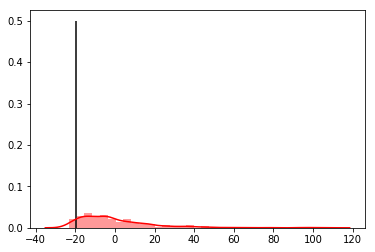

In [182]:
minimum_discount = 0.01

non_discounted_df = df[df["Discount"] == 0]
discounted_df = df[(df["Discount"] > 0) & (df["Discount"] <= minimum_discount)]

actual_differece = np.mean(discounted_df["Quantity"])-np.mean(non_discounted_df["Quantity"])

npermutations = 1000
differences = []
for _ in range(npermutations):
    permuted_df = df.copy()
    permuted_df["Quantity"] = np.random.permutation(permuted_df["Quantity"])
    permuted_non_discounted_df = permuted_df[permuted_df["Discount"] == 0]
    permuted_discounted_df = permuted_df[(df["Discount"] > 0) & (df["Discount"] <= minimum_discount)]
    differences.append(np.mean(permuted_discounted_df["Quantity"]) - \
                 np.mean(permuted_non_discounted_df["Quantity"]))

sns.distplot( differences , color="red", label="Differences")
plt.vlines(actual_differece, ymin=0, ymax=0.5)

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


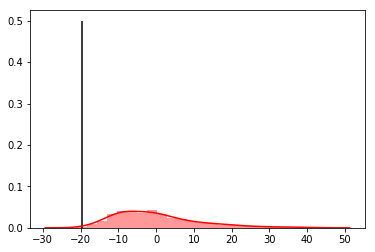

In [183]:
minimum_discount = 0.02

non_discounted_df = df[df["Discount"] == 0]
discounted_df = df[(df["Discount"] > 0) & (df["Discount"] <= minimum_discount)]

actual_differece = np.mean(discounted_df["Quantity"])-np.mean(non_discounted_df["Quantity"])

npermutations = 1000
differences = []
for _ in range(npermutations):
    permuted_df = df.copy()
    permuted_df["Quantity"] = np.random.permutation(permuted_df["Quantity"])
    permuted_non_discounted_df = permuted_df[permuted_df["Discount"] == 0]
    permuted_discounted_df = permuted_df[(df["Discount"] > 0) & (df["Discount"] <= minimum_discount)]
    differences.append(np.mean(permuted_discounted_df["Quantity"]) - \
                 np.mean(permuted_non_discounted_df["Quantity"]))

sns.distplot( differences , color="red", label="Differences")
plt.vlines(actual_differece, ymin=0, ymax=0.5)

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


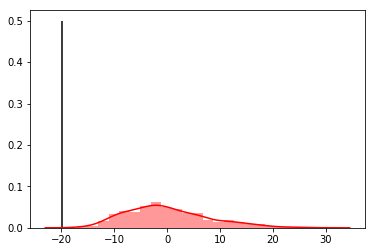

In [184]:
minimum_discount = 0.03

non_discounted_df = df[df["Discount"] == 0]
discounted_df = df[(df["Discount"] > 0) & (df["Discount"] <= minimum_discount)]

actual_differece = np.mean(discounted_df["Quantity"])-np.mean(non_discounted_df["Quantity"])

npermutations = 1000
differences = []
for _ in range(npermutations):
    permuted_df = df.copy()
    permuted_df["Quantity"] = np.random.permutation(permuted_df["Quantity"])
    permuted_non_discounted_df = permuted_df[permuted_df["Discount"] == 0]
    permuted_discounted_df = permuted_df[(df["Discount"] > 0) & (df["Discount"] <= minimum_discount)]
    differences.append(np.mean(permuted_discounted_df["Quantity"]) - \
                 np.mean(permuted_non_discounted_df["Quantity"]))

sns.distplot( differences , color="red", label="Differences")
plt.vlines(actual_differece, ymin=0, ymax=0.5)

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


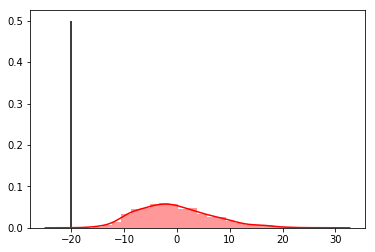

In [185]:
minimum_discount = 0.04

non_discounted_df = df[df["Discount"] == 0]
discounted_df = df[(df["Discount"] > 0) & (df["Discount"] <= minimum_discount)]

actual_differece = np.mean(discounted_df["Quantity"])-np.mean(non_discounted_df["Quantity"])

npermutations = 1000
differences = []
for _ in range(npermutations):
    permuted_df = df.copy()
    permuted_df["Quantity"] = np.random.permutation(permuted_df["Quantity"])
    permuted_non_discounted_df = permuted_df[permuted_df["Discount"] == 0]
    permuted_discounted_df = permuted_df[(df["Discount"] > 0) & (df["Discount"] <= minimum_discount)]
    differences.append(np.mean(permuted_discounted_df["Quantity"]) - \
                 np.mean(permuted_non_discounted_df["Quantity"]))

sns.distplot( differences , color="red", label="Differences")
plt.vlines(actual_differece, ymin=0, ymax=0.5)

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


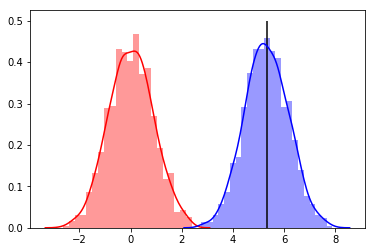

In [190]:
npermutations = 1000

minimum_discount = 0.25

column_to_probe = "Quantity"
column_to_test = "Discount"
statistic_to_probe = np.mean

resample = np.random.choice
permute = np.random.permutation



non_discounted_df = df[df["Discount"] == 0]
discounted_df = df[(df["Discount"] > 0) & (df["Discount"] <= minimum_discount)]

actual_differences = []
for _ in range(npermutations):
    discounted_quantities = np.random.choice(discounted_df["Quantity"], size=len(discounted_df["Quantity"]))
    non_discounted_quantities = np.random.choice(non_discounted_df["Quantity"], size=len(non_discounted_df["Quantity"]))
    actual_differences.append(np.mean(discounted_quantities)-np.mean(non_discounted_quantities))

differences = []
for _ in range(npermutations):
    permuted_df = df.copy()
    permuted_df["Quantity"] = np.random.permutation(permuted_df["Quantity"])
    permuted_non_discounted_df = permuted_df[permuted_df["Discount"] == 0]
    permuted_discounted_df = permuted_df[(df["Discount"] > 0) & (df["Discount"] <= minimum_discount)]
    differences.append(np.mean(permuted_discounted_df["Quantity"]) - \
                 np.mean(permuted_non_discounted_df["Quantity"]))

sns.distplot( differences , color="red", label="Permuted Differences")
sns.distplot( actual_differences , color="blue", label="Actual Differences")
plt.vlines(actual_differece, ymin=0, ymax=0.5)

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


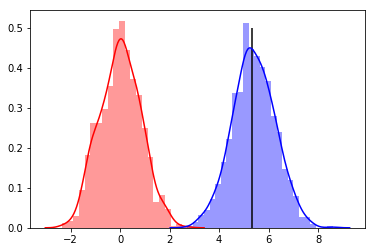

In [192]:
npermutations = 1000

minimum_discount = .25

column_to_probe = "Quantity"
column_to_permute = "Discount"
statistic_to_probe = np.mean

def resample(array_to_resample):
    return np.random.choice(array_to_resample, size=len(array_to_resample))

permute = np.random.permutation

non_discounted_df = df[df[column_to_permute] == 0]
discounted_df = df[(df[column_to_permute] > 0) & (df[column_to_permute] <= minimum_discount)]

actual_differences = []
for _ in range(npermutations):
    discounted_quantities = resample(discounted_df[column_to_probe])
    non_discounted_quantities = resample(non_discounted_df[column_to_probe])
    actual_differences.append(statistic_to_probe(discounted_quantities)-statistic_to_probe(non_discounted_quantities))

differences = []
for _ in range(npermutations):
    permuted_df = df.copy()
    permuted_df[column_to_probe] = permute(permuted_df[column_to_probe])
    permuted_non_discounted_df = permuted_df[permuted_df[column_to_permute] == 0]
    permuted_discounted_df = permuted_df[(df[column_to_permute] > 0) & (df[column_to_permute] <= minimum_discount)]
    differences.append(statistic_to_probe(permuted_discounted_df[column_to_probe]) - \
                 statistic_to_probe(permuted_non_discounted_df[column_to_probe]))

sns.distplot( differences , color="red", label="Permuted Differences")
sns.distplot( actual_differences , color="blue", label="Actual Differences")
plt.vlines(actual_differece, ymin=0, ymax=0.5)

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


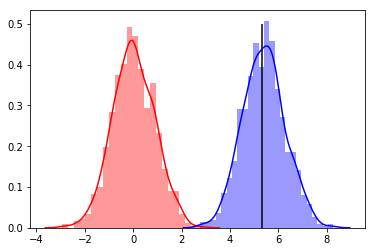

In [194]:
npermutations = 1000

minimum_discount = .25

column_to_probe = "Quantity"
column_to_permute = "Discount"
statistic_to_probe = np.mean

def resample(array_to_resample):
    return np.random.choice(array_to_resample, size=len(array_to_resample))

permute = np.random.permutation

non_discounted_df = df[df[column_to_permute] == 0]
discounted_df = df[(df[column_to_permute] > 0) & (df[column_to_permute] <= minimum_discount)]

actual_differences = []
for _ in range(npermutations):
    discounted_quantities = resample(discounted_df[column_to_probe])
    non_discounted_quantities = resample(non_discounted_df[column_to_probe])
    actual_differences.append(statistic_to_probe(discounted_quantities)-statistic_to_probe(non_discounted_quantities))

differences = []
for _ in range(npermutations):
    permuted_df = df.copy()
    permuted_df[column_to_probe] = permute(permuted_df[column_to_probe])
    permuted_non_discounted_df = permuted_df[permuted_df[column_to_permute] == 0]
    permuted_discounted_df = permuted_df[(df[column_to_permute] > 0) & (df[column_to_permute] <= minimum_discount)]
    differences.append(statistic_to_probe(permuted_discounted_df[column_to_probe]) - \
                 statistic_to_probe(permuted_non_discounted_df[column_to_probe]))

sns.distplot( differences , color="red", label="Permuted Differences")
sns.distplot( actual_differences , color="blue", label="Actual Differences")
plt.vlines(actual_differece, ymin=0, ymax=0.5)

/Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


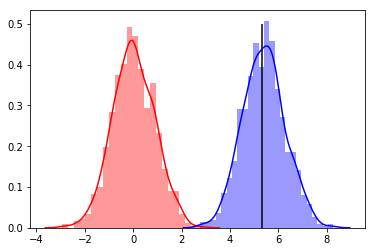

In [194]:
# Define resampling intensity
npermutations = 1000

# Defining quantities of interest
column_to_probe = "Quantity"
column_to_permute = "Discount"
statistic_to_probe = np.mean

def resample(array_to_resample):
    return np.random.choice(array_to_resample, size=len(array_to_resample))

permute = np.random.permutation


minimum_discount = .25

non_discounted_df = df[df[column_to_permute] == 0]
discounted_df = df[(df[column_to_permute] > 0) & (df[column_to_permute] <= minimum_discount)]

actual_differences = []
for _ in range(npermutations):
    discounted_quantities = resample(discounted_df[column_to_probe])
    non_discounted_quantities = resample(non_discounted_df[column_to_probe])
    actual_differences.append(statistic_to_probe(discounted_quantities)-statistic_to_probe(non_discounted_quantities))

differences = []
for _ in range(npermutations):
    permuted_df = df.copy()
    permuted_df[column_to_probe] = permute(permuted_df[column_to_probe])
    permuted_non_discounted_df = permuted_df[permuted_df[column_to_permute] == 0]
    permuted_discounted_df = permuted_df[(df[column_to_permute] > 0) & (df[column_to_permute] <= minimum_discount)]
    differences.append(statistic_to_probe(permuted_discounted_df[column_to_probe]) - \
                 statistic_to_probe(permuted_non_discounted_df[column_to_probe]))

sns.distplot( differences , color="red", label="Permuted Differences")
sns.distplot( actual_differences , color="blue", label="Actual Differences")
plt.vlines(actual_differece, ymin=0, ymax=0.5)

# Changing project

In [195]:
conn = sqlite3.connect('database.sqlite3')
c = conn.cursor()

In [199]:
c.execute("""SELECT *
             FROM instructors
             LIMIT 10""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,id,name
0,id,name
1,761703,JOHN ARCHAMBAULT
2,3677061,STEPHANIE KANN
3,788586,KATHY PREM
4,1600463,KRISTIN KLARKOWSKI
5,693634,DAVID BOHNHOFF
6,590599,RICHARD STRAUB
7,664097,KEVIN SHINNERS
8,2600979,SUNDARAM GUNASEKARAN
9,4847746,ROBERT ANEX


In [200]:
c.execute("""SELECT *
             FROM subject_memberships
             LIMIT 10""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,subject_code,course_offering_uuid
0,220,344b3ebe-da7e-314c-83ed-9425269695fd
1,320,344b3ebe-da7e-314c-83ed-9425269695fd
2,346,344b3ebe-da7e-314c-83ed-9425269695fd
3,612,344b3ebe-da7e-314c-83ed-9425269695fd
4,636,344b3ebe-da7e-314c-83ed-9425269695fd
5,207,344b3ebe-da7e-314c-83ed-9425269695fd
6,490,344b3ebe-da7e-314c-83ed-9425269695fd
7,240,344b3ebe-da7e-314c-83ed-9425269695fd
8,220,f718e6cd-33f0-3c14-a9a6-834d9c3610a8
9,320,f718e6cd-33f0-3c14-a9a6-834d9c3610a8


In [201]:
c.execute("""SELECT *
             FROM grade_distributions
             LIMIT 10""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,course_offering_uuid,section_number,n_count,c_count,f_count,cr_count,p_count,nw_count,other_count,bc_count,u_count,d_count,ab_count,a_count,s_count,i_count,b_count,nr_count
0,344b3ebe-da7e-314c-83ed-9425269695fd,1,0,0,0,0,0,0,0,0,0,0,0,105,0,0,0,0
1,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,1,0,0,0,0,0,0,0,0,0,0,0,158,0,1,0,0
2,ea3b717c-d66b-30dc-8b37-964d9688295f,1,0,3,0,0,0,0,0,0,0,0,12,139,0,0,2,0
3,075da420-5f49-3dd0-93df-13e3c152e1b1,1,0,0,0,0,0,0,0,0,0,0,0,87,0,1,0,0
4,2b4e216d-a728-3713-8c7c-19afffc6b2fd,1,0,0,0,0,0,0,0,0,0,0,0,70,0,1,0,0
5,87966a7b-f676-33d0-83d2-acdb67da6790,1,0,0,0,0,0,0,0,0,0,0,0,79,0,12,0,0
6,ff511882-5eab-3e7b-a89f-8fbfd1906127,1,0,0,0,0,0,0,0,0,0,0,3,114,0,3,1,0
7,b3e26604-fe6e-30df-bc91-b5fa57717a7e,1,0,0,1,0,0,0,0,0,0,0,1,105,0,0,0,0
8,e100d196-5e82-32e4-80e9-ac45c07a498c,1,0,0,0,0,0,0,0,0,0,0,3,107,0,2,1,0
9,76b9c458-d3c2-38c4-951f-69b6900bd7fe,1,0,1,0,0,0,0,0,0,0,1,8,129,0,3,2,0


In [202]:
c.execute("""SELECT *
             FROM courses
             LIMIT 10""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,uuid,name,number
0,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1
1,c070a84f-648f-351d-9499-5d0e30ad02cc,Cooperative Education/Co-op in Life Sciences C...,1
2,e6b4b7ae-0e0b-3aa5-9d77-7fcd90c9cfa3,Cooperative Education Program,1
3,8f63bde1-ff7f-3fe7-9901-862908bf134c,Workshop in Dance Activity,1
4,f3541888-584a-3923-9ce7-6341ff3d84a1,Cooperative Education/Co-op in Agricultural & ...,1
5,d07193c1-551e-3c4d-82cd-7059fc2cd512,Ballroom Dance I,2
6,eb1a8a08-a675-3c45-aa49-23a6589fed56,Fundamentals-Flute,7
7,57540351-0e4a-3528-9ac0-84e8f72b41bc,Contemporary Dance I,11
8,0422e04f-96d2-3b9f-ba5e-4ed3a43173f6,Fundamentals: Single Reeds,14
9,3e2fe18a-32f9-3e6f-a627-f77481eb84d9,Fundamentals-Low Brass,24


In [203]:
c.execute("""SELECT *
             FROM course_offerings
             LIMIT 10""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,uuid,course_uuid,term_code,name
0,uuid,course_uuid,term_code,name
1,344b3ebe-da7e-314c-83ed-9425269695fd,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1092,Cooperative Education Prog
2,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1082,Cooperative Education Prog
3,ea3b717c-d66b-30dc-8b37-964d9688295f,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1172,Cooperative Education Prog
4,075da420-5f49-3dd0-93df-13e3c152e1b1,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1114,Cooperative Education Prog
5,2b4e216d-a728-3713-8c7c-19afffc6b2fd,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1104,Cooperative Education Prog
6,87966a7b-f676-33d0-83d2-acdb67da6790,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1112,Cooperative Education Prog
7,ff511882-5eab-3e7b-a89f-8fbfd1906127,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1134,Cooperative Education Prog
8,b3e26604-fe6e-30df-bc91-b5fa57717a7e,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1084,Cooperative Education Prog
9,e100d196-5e82-32e4-80e9-ac45c07a498c,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1154,Cooperative Education Prog


In [204]:
c.execute("""SELECT *
             FROM rooms
             LIMIT 10""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,uuid,facility_code,room_code
0,04368a56-c959-3e4b-8b3d-f4cc3538fea5,OFF CAMPUS,null
1,2cc50da3-ef0e-3572-a557-ca44930a0688,0032,0249
2,ebbf62b4-2ac3-356b-b0fa-7897f4446a17,0032,B101
3,ed828265-475b-31b4-b9a8-daec2a600449,0032,0549
4,b277dc8e-bab1-3a12-bc17-48d4a364d297,0032,0349
5,bab1dd92-c641-3d28-abd5-50c9573c480b,0032,0510
6,9759cb5f-a7d3-3d0c-b8b3-03910bd0153e,0469,2441
7,6af80b0b-b3e3-370a-925f-829869f007bc,0469,4411
8,50322d30-dd8f-3c65-9a75-78c5ff29d62c,0469,2511
9,b7211db3-303f-3605-bead-237e1f663932,0469,1341


In [205]:
c.execute("""SELECT *
             FROM teachings
             LIMIT 10""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,instructor_id,section_uuid
0,761703,45adf63c-48c9-3659-8561-07556d2d4ddf
1,761703,c6280e23-5e43-3859-893e-540d94993529
2,761703,9395dc21-15d1-3fab-8d1f-6f3fe6114c48
3,3677061,b99e440b-39db-350a-81eb-b6eb1bd8b0bc
4,761703,ca1c841f-41d5-3298-bd25-01c65751f150
5,3677061,da41b0aa-2b81-378f-914e-39f3465eed19
6,761703,51c4dc00-1fc7-3c7c-98a1-eba112aa3e5d
7,761703,53f95c0f-4ea9-374c-9285-ac41c30ff720
8,761703,574d9b35-9c76-3380-8e83-bd883a078694
9,761703,8fc362a6-d94e-3ade-aee7-87796c567dcf


In [206]:
c.execute("""SELECT *
             FROM sections
             LIMIT 10""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,uuid,course_offering_uuid,section_type,number,room_uuid,schedule_uuid
0,"uuid,course_offering_uuid,section_type,number,...",None,None,None,None,None
1,"45adf63c-48c9-3659-8561-07556d2d4ddf"",""344b3eb...",None,None,None,None,None
2,"c6280e23-5e43-3859-893e-540d94993529"",""f718e6c...",None,None,None,None,None
3,"9395dc21-15d1-3fab-8d1f-6f3fe6114c48"",""ea3b717...",None,None,None,None,None
4,"b99e440b-39db-350a-81eb-b6eb1bd8b0bc"",""ea3b717...",None,None,None,None,None
5,"ca1c841f-41d5-3298-bd25-01c65751f150"",""ea3b717...",None,None,None,None,None
6,"da41b0aa-2b81-378f-914e-39f3465eed19"",""ea3b717...",None,None,None,None,None
7,"51c4dc00-1fc7-3c7c-98a1-eba112aa3e5d"",""075da42...",None,None,None,None,None
8,"53f95c0f-4ea9-374c-9285-ac41c30ff720"",""075da42...",None,None,None,None,None
9,"574d9b35-9c76-3380-8e83-bd883a078694"",""2b4e216...",None,None,None,None,None


In [208]:
c.execute("""SELECT *
             FROM subjects
             LIMIT 10""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,code,name,abbreviation
0,908,Soil Science,SOIL SCI
1,350,ENGLISH,ENGLISH
2,351,English as a Second Language,ESL
3,230,Human Development and Family Studies,HDFS
4,352,English,ENGL
5,231,General Business,GEN BUS
6,232,Accounting and Information Systems,ACCT I S
7,112,Biological Systems Engineering,BSE
8,233,"Finance, Investment and Banking",FINANCE
9,476,Horticulture,HORT


In [209]:
c.execute("""SELECT *
             FROM schedules
             LIMIT 10""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,uuid,start_time,end_time,mon,tues,wed,thurs,fri,sat,sun
0,f2d66a4d-0c08-3b48-abf6-649fffd7ae90,-1,-1,false,false,false,false,false,false,false
1,875542a2-f786-34dd-933b-84a8af1aaaba,530,580,true,false,true,false,false,false,false
2,f41f1e4d-cb4f-3ded-b4b0-4a7c4da044e5,660,710,false,true,false,true,false,false,false
3,46da55a4-17f7-31a1-9492-fddb5af9cf13,800,850,false,true,false,true,false,false,false
4,8c7cd81e-4f81-357c-a40b-43f954484804,725,775,false,true,false,true,false,false,false
5,76c82895-6420-3a2c-bb27-5b19b2e07755,800,850,true,false,true,false,false,false,false
6,88ad9821-70fb-3829-96cc-b5babbfed60b,660,760,false,false,true,false,false,false,false
7,d81c681b-958c-3b19-ace7-9f24939251c2,865,915,true,false,true,false,false,false,false
8,9fe9fc2a-fdfa-36bb-8188-0bc9d87aedf5,660,760,true,false,false,false,false,false,false
9,99c6bbc5-fb31-3566-b494-d4ba5a5c0aff,595,645,true,false,true,false,false,false,false


Content
The University of Wisconsin - Madison publishes reports for all courses (and sections of these courses), instructors, subjects, and grade reports for each section for every Fall and Spring semester since 2006.

There are more than 9,000 courses in this dataset. There are nearly 200,000 course sections with grades, with 3 million grades reported in total. 18,000 instructors are included in the dataset, all of whom are associated with various sections that may or may not have grades reported for them.

The data was retrieved from the UW Madison registrar office, and extracted from PDF files using the open source tool, madgrades-extractor.

Context
This dataset was made out of a desire to create a website which could make sense of the PDF grade report files published by my university. The final result was Madgrades, an open source website and REST API designed to do just that. The website uses the same dataset published here but in SQL format, with some additional data generated in order to optimize for particular requests.

Acknowledgements
The UW Madison registrar graciously provides us with all this data for free! Indeed, public universities are required to offer this data to the public by law, but often times they will charge exorbitant fees (one university I contacted stated more than $1,000 for the same data).

<img src="schema.png" width=50%>

○ Does your teacher have a statistically significant correlation with the number of As earned in a course?

○ Does time of day have a statistically significant correlation with the number of As earned in a course?

○ Do STEM fields have a statistically significantly difference in the number of As earned when compared to the humanities?

In [211]:
c.execute("""SELECT *
             FROM grade_distributions""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()

,course_offering_uuid,section_number,n_count,c_count,f_count,cr_count,p_count,nw_count,other_count,bc_count,u_count,d_count,ab_count,a_count,s_count,i_count,b_count,nr_count
0,344b3ebe-da7e-314c-83ed-9425269695fd,1,0,0,0,0,0,0,0,0,0,0,0,105,0,0,0,0
1,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,1,0,0,0,0,0,0,0,0,0,0,0,158,0,1,0,0
2,ea3b717c-d66b-30dc-8b37-964d9688295f,1,0,3,0,0,0,0,0,0,0,0,12,139,0,0,2,0
3,075da420-5f49-3dd0-93df-13e3c152e1b1,1,0,0,0,0,0,0,0,0,0,0,0,87,0,1,0,0
4,2b4e216d-a728-3713-8c7c-19afffc6b2fd,1,0,0,0,0,0,0,0,0,0,0,0,70,0,1,0,0


In [212]:
grades_df = df

In [213]:
len(grades_df)

193262

https://registrar.wisc.edu/grades-and-gpa/

<img src="gpequivalent.png" width=50%>

In [41]:
gp_dict = {'a':  4.0,
           'ab': 3.5,
           'b':  3.0,
           'bc': 2.5,
           'c':  2.0,
           'd':  1.0,
           'f':  0.0}

## Does your teacher have a statistically significant correlation with the mean GP earned in a course?
- Find courses taught by more than one teacher
- Compute GP distribution for each instructor
- Get confidence interval for mean GP by resampling with replacement
- Depending on whether there are two or more instructors
    - For two instructors, randomly permute instructor and compute distribution of GP means
    - For more than two instructors, do ANOVA (?)

In [216]:
c.execute("""SELECT *
             FROM grade_distributions g
             JOIN course_offerings co ON g.course_offering_uuid = co.uuid
             JOIN instructors i ON i
             LIMIT 10""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()

,course_offering_uuid,section_number,n_count,c_count,f_count,cr_count,p_count,nw_count,other_count,bc_count,...,ab_count,a_count,s_count,i_count,b_count,nr_count,uuid,course_uuid,term_code,name
0,344b3ebe-da7e-314c-83ed-9425269695fd,1,0,0,0,0,0,0,0,0,...,0,105,0,0,0,0,344b3ebe-da7e-314c-83ed-9425269695fd,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1092,Cooperative Education Prog
1,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,1,0,0,0,0,0,0,0,0,...,0,158,0,1,0,0,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1082,Cooperative Education Prog
2,ea3b717c-d66b-30dc-8b37-964d9688295f,1,0,3,0,0,0,0,0,0,...,12,139,0,0,2,0,ea3b717c-d66b-30dc-8b37-964d9688295f,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1172,Cooperative Education Prog
3,075da420-5f49-3dd0-93df-13e3c152e1b1,1,0,0,0,0,0,0,0,0,...,0,87,0,1,0,0,075da420-5f49-3dd0-93df-13e3c152e1b1,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1114,Cooperative Education Prog
4,2b4e216d-a728-3713-8c7c-19afffc6b2fd,1,0,0,0,0,0,0,0,0,...,0,70,0,1,0,0,2b4e216d-a728-3713-8c7c-19afffc6b2fd,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1104,Cooperative Education Prog



The goal of this project is to test your ability to gather information from a real-world database and use your knowledge of statistical analysis and hypothesis testing to generate analytical insights that can be meaningful to the company/stakeholder.

### USE OF ALTERNATIVE DATABASES

The original idea was to use the Northwind database, an example relational database created by Microsoft. After thinking about the goal of the project, we want to open up alternative datasets that can be used in lieu of the Northwind database to give students the opportunity to interact with real-world data.

### SQL REQUIREMENTS

You are required to import your static files (i.e. .csv, .json, .txt) files into a PostgreSQL database. By working with a relational database, you’ll get practice at crafting queries that pull out relevant data prior to performing statistical analysis.

### STATISTICAL ANALYSIS REQUIREMENTS

The goal of your project is to query the database to get the data needed to perform a statistical analysis. In this statistical analysis, you'll need to perform a hypothesis test to answer at least one of the questions from the database you choose.

For each hypothesis, be sure to specify both the null hypothesis and the alternative hypothesis for your question. You should also specify if this is one-tail or a two-tail test.

In addition to answering this question with a hypothesis test, you will also need to come up with at least 3 other hypotheses to test on your own. These can by anything that you think could be important information for the company/stakeholder.

### REVISED STAKEHOLDERS

The use of alternative datasets brings with it a question of who your audience is for this data science project. Much like the Module 1 project, picking an audience at the beginning of your project helps you define the scope of the project. Once a stakeholder is picked, keep them in mind as you’re generating your statistical analysis. When translating statistics for a non-technical audience, be sure you are answering questions that are relevant to the stakeholder and being clear with the limitations of your findings.

### DELIVERABLES
To complete this project, you will need to turn in the following 3 deliverables:
1. A ​Jupyter Notebook​ containing any code you've written for this project. This work will need to be pushed to your GitHub repository in order to submit your project.
    a. The notebook contains well-formatted, professional looking markdown cells explaining any substantial code. All functions have docstrings that act as professional-quality documentation.
    b. The notebook is written to technical audiences with a way to both understand your approach and reproduce your results. The target audience for this deliverable is other data scientists looking to validate your findings.
    c. The notebook should be well organized, easy to follow, and code is commented where appropriate.
    d. Your notebook should clearly show how you arrived at your results for each hypothesis test, including how you calculated your p-values.
2. A user-focused README.md file that explains your process, methodology and findings.
    a. Take the time to make sure that you craft your story well, and clearly explain your process and findings in a way that clearly shows both your technical expertise and your ability to communicate your results!
3. An "Executive Summary" Keynote/PowerPoint/Google Slide presentation​ (delivered as a PDF export) that explains the hypothesis tests you answered, your findings, and their relevance to the company/stakeholders.
    a. Make sure to also add and commit this pdf of your non-technical presentation to your repository with a file name of presentation.pdf
    b. Contain between 5-10 professional quality slides detailing:
        i. A high-level overview of your methodology
        ii. The results of your hypothesis tests
        iii. Anyreal-worldrecommendationsyouwouldliketomakebasedonyour findings (ask yourself--why should the executive team care about what you found? How can your findings help the company/stakeholder?)
        iv. Takenomorethan5minutestopresent
        v. Avoid technical jargon and explain results in a clear, actionable way for non-technical audiences.

### ALTERNATIVE DATABASE
- Grades: University of Wisconsin, Madison https://www.kaggle.com/Madgrades/uw-madison-courses
    - Does your teacher have a statistically significant correlation with the number of As earned in a course?
    - Does time of day have a statistically significant correlation with the number of As earned in a course?
    - Do STEM fields have a statistically significantly difference in the number of As earned when compared to the humanities?

<img src="schema.png" width=50%>

In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('database.sqlite3')
c = conn.cursor()

In [3]:
c.execute("""SELECT 
    name
FROM 
    sqlite_master 
WHERE 
    type ='table' AND 
    name NOT LIKE 'sqlite_%';""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()

,name
0,sections
1,instructors
2,course_offerings
3,subject_memberships
4,courses


grade_distributions --> course_offerings --> sections --> teachings

In [4]:
c.execute("""SELECT *
             FROM grade_distributions g
             JOIN course_offerings co ON g.course_offering_uuid = co.uuid
             JOIN sections s ON co.uuid = s.course_offering_uuid
             JOIN teachings t ON t.section_uuid = s.uuid
             """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()

,course_offering_uuid,section_number,n_count,c_count,f_count,cr_count,p_count,nw_count,other_count,bc_count,...,term_code,name,uuid,course_offering_uuid,section_type,number,room_uuid,schedule_uuid,instructor_id,section_uuid
0,344b3ebe-da7e-314c-83ed-9425269695fd,1,0,0,0,0,0,0,0,0,...,1092,Cooperative Education Prog,45adf63c-48c9-3659-8561-07556d2d4ddf,344b3ebe-da7e-314c-83ed-9425269695fd,FLD,1,null,f2d66a4d-0c08-3b48-abf6-649fffd7ae90,761703,45adf63c-48c9-3659-8561-07556d2d4ddf
1,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,1,0,0,0,0,0,0,0,0,...,1082,Cooperative Education Prog,c6280e23-5e43-3859-893e-540d94993529,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,FLD,1,null,f2d66a4d-0c08-3b48-abf6-649fffd7ae90,761703,c6280e23-5e43-3859-893e-540d94993529
2,ea3b717c-d66b-30dc-8b37-964d9688295f,1,0,3,0,0,0,0,0,0,...,1172,Cooperative Education Prog,9395dc21-15d1-3fab-8d1f-6f3fe6114c48,ea3b717c-d66b-30dc-8b37-964d9688295f,FLD,1,04368a56-c959-3e4b-8b3d-f4cc3538fea5,f2d66a4d-0c08-3b48-abf6-649fffd7ae90,761703,9395dc21-15d1-3fab-8d1f-6f3fe6114c48
3,ea3b717c-d66b-30dc-8b37-964d9688295f,1,0,3,0,0,0,0,0,0,...,1172,Cooperative Education Prog,b99e440b-39db-350a-81eb-b6eb1bd8b0bc,ea3b717c-d66b-30dc-8b37-964d9688295f,FLD,1,null,f2d66a4d-0c08-3b48-abf6-649fffd7ae90,3677061,b99e440b-39db-350a-81eb-b6eb1bd8b0bc
4,ea3b717c-d66b-30dc-8b37-964d9688295f,1,0,3,0,0,0,0,0,0,...,1172,Cooperative Education Prog,ca1c841f-41d5-3298-bd25-01c65751f150,ea3b717c-d66b-30dc-8b37-964d9688295f,FLD,1,null,f2d66a4d-0c08-3b48-abf6-649fffd7ae90,761703,ca1c841f-41d5-3298-bd25-01c65751f150


In [5]:
len(df)

2076665

In [6]:
df.columns

Index(['course_offering_uuid', 'section_number', 'n_count', 'c_count',
       'f_count', 'cr_count', 'p_count', 'nw_count', 'other_count', 'bc_count',
       'u_count', 'd_count', 'ab_count', 'a_count', 's_count', 'i_count',
       'b_count', 'nr_count', 'uuid', 'course_uuid', 'term_code', 'name',
       'uuid', 'course_offering_uuid', 'section_type', 'number', 'room_uuid',
       'schedule_uuid', 'instructor_id', 'section_uuid'],
      dtype='object')

In [21]:
grades_df = df[['course_offering_uuid', 'instructor_id', 'section_uuid', 'section_number', 
                'a_count', 'ab_count', 'b_count', 'bc_count', 'c_count', 'd_count', 'f_count', ]]

In [22]:
grades_list = ["a", "ab", "b", "bc", "c", "d", "f"]
for grade in grades_list:
    grades_df["%s_count" % grade] = grades_df["%s_count" % grade].astype(float)

/Users/npschafer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
grades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076665 entries, 0 to 2076664
Data columns (total 12 columns):
course_offering_uuid    object
course_offering_uuid    object
instructor_id           object
section_uuid            object
section_number          object
a_count                 float64
ab_count                float64
b_count                 float64
bc_count                float64
c_count                 float64
d_count                 float64
f_count                 float64
dtypes: float64(7), object(5)
memory usage: 190.1+ MB


In [24]:
grades_df["total_grades"] = grades_df["a_count"] + grades_df["ab_count"] + grades_df["b_count"] + \
grades_df["bc_count"] + grades_df["c_count"] + grades_df["d_count"] + grades_df["f_count"]

/Users/npschafer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
grades_df = grades_df[grades_df["total_grades"] > 0]

In [26]:
len(grades_df)

756253

In [38]:
grades_df.iloc[200,:]

course_offering_uuid    dd3caaea-05bf-383a-afa4-52297c455208
course_offering_uuid    dd3caaea-05bf-383a-afa4-52297c455208
instructor_id                                         724351
section_uuid            bfe37f5b-738d-3e20-ba05-8ef3c612f3ac
section_number                                             6
a_count                                                   12
ab_count                                                   9
b_count                                                    0
bc_count                                                   1
c_count                                                    4
d_count                                                    0
f_count                                                    1
total_grades                                              27
Name: 306, dtype: object

# Compute PMF/PDF of grade point for a given course

In [39]:
grades_df.iloc[200,:]["f_count"]/grades_df.iloc[200,:]["total_grades"]

0.037037037037037035

In [40]:
grades_list

['a', 'ab', 'b', 'bc', 'c', 'd', 'f']

In [ ]:
gp_di

In [43]:
row = grades_df.iloc[200,:]

In [46]:
grades_distribution = []
for grade in grades_list:
    grades_distribution += [gp_dict[grade]]*int(row[f"{grade}_count"])
grades_distribution

[4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 2.5,
 2.0,
 2.0,
 2.0,
 2.0,
 0.0]

In [48]:
import matplotlib.pyplot as plt

In [53]:
list(range(6))

[0, 1, 2, 3, 4, 5]

In [56]:
import numpy as np

In [57]:
np.histogram(grades_distribution, bins=list(range(6)))

(array([ 1,  0,  5,  9, 12]), array([0, 1, 2, 3, 4, 5]))

In [59]:
pdf, bins = np.histogram(grades_distribution, bins=list(range(6)), density=True)

In [60]:
cdf = np.cumsum(pdf)

In [61]:
cdf

array([0.03703704, 0.03703704, 0.22222222, 0.55555556, 1.        ])

## Working more on SQL query

<img src="schema.png" width=50%>

In [78]:
c.execute("""SELECT co.course_uuid as course_uuid,
                    g.course_offering_uuid as course_offering_uuid,
                    t.instructor_id as instructor_id,
                    g.a_count as a_count,
                    g.ab_count as ab_count,
                    g.b_count as b_count,
                    g.bc_count as bc_count,
                    g.c_count as c_count,
                    g.d_count as d_count,
                    g.f_count as f_count
             FROM grade_distributions g
             JOIN course_offerings co ON g.course_offering_uuid = co.uuid
             JOIN sections s ON co.uuid = s.course_offering_uuid
             JOIN teachings t ON t.section_uuid = s.uuid
             """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()

,course_uuid,course_offering_uuid,instructor_id,a_count,ab_count,b_count,bc_count,c_count,d_count,f_count
0,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,344b3ebe-da7e-314c-83ed-9425269695fd,761703,105,0,0,0,0,0,0
1,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,761703,158,0,0,0,0,0,0
2,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,ea3b717c-d66b-30dc-8b37-964d9688295f,761703,139,12,2,0,3,0,0
3,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,ea3b717c-d66b-30dc-8b37-964d9688295f,3677061,139,12,2,0,3,0,0
4,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,ea3b717c-d66b-30dc-8b37-964d9688295f,761703,139,12,2,0,3,0,0


In [79]:
len(df)

2076665

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076665 entries, 0 to 2076664
Data columns (total 10 columns):
course_uuid             object
course_offering_uuid    object
instructor_id           object
a_count                 object
ab_count                object
b_count                 object
bc_count                object
c_count                 object
d_count                 object
f_count                 object
dtypes: object(10)
memory usage: 158.4+ MB


In [84]:
def convert_grades_to_ints(df):
    grades_list = ["a", "ab", "b", "bc", "c", "d", "f"]
    for grade in grades_list:
        df["%s_count" % grade] = df["%s_count" % grade].astype(int)

In [85]:
convert_grades_to_ints(df)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076665 entries, 0 to 2076664
Data columns (total 10 columns):
course_uuid             object
course_offering_uuid    object
instructor_id           object
a_count                 int64
ab_count                int64
b_count                 int64
bc_count                int64
c_count                 int64
d_count                 int64
f_count                 int64
dtypes: int64(7), object(3)
memory usage: 158.4+ MB


In [87]:
def add_total_grades(df):
    df["total_grades"] = df["a_count"] + df["ab_count"] + df["b_count"] + \
    df["bc_count"] + df["c_count"] + df["d_count"] + df["f_count"]

In [88]:
add_total_grades(df)

In [89]:
df.columns

Index(['course_uuid', 'course_offering_uuid', 'instructor_id', 'a_count',
       'ab_count', 'b_count', 'bc_count', 'c_count', 'd_count', 'f_count',
       'total_grades'],
      dtype='object')

In [97]:
def filter_no_grades(df):
    return df[df["total_grades"] > 0]

In [99]:
df = filter_no_grades(df)

In [100]:
len(df)

756253

In [101]:
df.columns

Index(['course_uuid', 'course_offering_uuid', 'instructor_id', 'a_count',
       'ab_count', 'b_count', 'bc_count', 'c_count', 'd_count', 'f_count',
       'total_grades'],
      dtype='object')

In [107]:
for column in list(df.columns):
    print(column, len(df[column].unique()))

course_uuid 7626
course_offering_uuid 56211
instructor_id 18081
a_count 273
ab_count 154
b_count 184
bc_count 105
c_count 122
d_count 56
f_count 33
total_grades 502


### 7,626 unique courses, 56,211 unique course offerings, 18,081 unique instructors

### Find courses with more than one instructor

In [113]:
grouped = df.groupby("course_uuid")

at_least_two_instructors = 0
for name, group in grouped:
    if len(group["instructor_id"].unique())>1:
        at_least_two_instructors += 1
at_least_two_instructors

5188

https://www.itl.nist.gov/div898/handbook/prc/section4/prc41.htm

<img src="kwtest.png" width=50%>

- For each course
    - If the course has more than one instructor
        - Pool all the grades for a given instructor
        - Compute the mean grade (in grade points) for each instructor
        - Compute the mean of the absolute all of the unique pairs of instructors

# Statistical tests for comparing multiple discrete distributions

https://rdrr.io/cran/WRS2/src/R/discANOVA.R

https://en.wikipedia.org/wiki/Multinomial_distribution

http://mathworld.wolfram.com/MultinomialDistribution.html

https://en.wikipedia.org/wiki/Multinomial_test

https://stats.stackexchange.com/questions/35461/is-there-a-multiple-sample-version-or-alternative-to-the-kolmogorov-smirnov-test

https://en.wikipedia.org/wiki/Bonferroni_correction


# Filter classes with only one instructor

<img src="alan-schema.png" width=60%>

In [59]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
conn = sqlite3.connect('database.sqlite3')
c = conn.cursor()

In [16]:
c.execute("""SELECT co.course_uuid as course_uuid,
                    g.course_offering_uuid as course_offering_uuid,
                    t.instructor_id as instructor_id,
                    g.a_count as a_count,
                    g.ab_count as ab_count,
                    g.b_count as b_count,
                    g.bc_count as bc_count,
                    g.c_count as c_count,
                    g.d_count as d_count,
                    g.f_count as f_count
             FROM grade_distributions g
             JOIN course_offerings co ON g.course_offering_uuid = co.uuid
             JOIN sections s ON co.uuid = s.course_offering_uuid
             JOIN teachings t ON t.section_uuid = s.uuid
             """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()

,course_uuid,course_offering_uuid,instructor_id,a_count,ab_count,b_count,bc_count,c_count,d_count,f_count
0,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,344b3ebe-da7e-314c-83ed-9425269695fd,761703,105,0,0,0,0,0,0
1,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,761703,158,0,0,0,0,0,0
2,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,ea3b717c-d66b-30dc-8b37-964d9688295f,761703,139,12,2,0,3,0,0
3,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,ea3b717c-d66b-30dc-8b37-964d9688295f,3677061,139,12,2,0,3,0,0
4,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,ea3b717c-d66b-30dc-8b37-964d9688295f,761703,139,12,2,0,3,0,0


In [17]:
def convert_grades_to_ints(df):
    grades_list = ["a", "ab", "b", "bc", "c", "d", "f"]
    for grade in grades_list:
        df["%s_count" % grade] = df["%s_count" % grade].astype(int)

In [18]:
def add_total_grades(df):
    df["total_grades"] = df["a_count"] + df["ab_count"] + df["b_count"] + \
    df["bc_count"] + df["c_count"] + df["d_count"] + df["f_count"]

In [19]:
def filter_no_grades(df):
    return df[df["total_grades"] > 0]

In [20]:
def filter_only_one_instructor(df):
    grouped = df.groupby("course_uuid")
    return grouped.filter(lambda x: len(x["instructor_id"].unique())>1)

In [21]:
convert_grades_to_ints(df)

In [22]:
add_total_grades(df)

In [23]:
len(df)

2076665

In [24]:
df = filter_no_grades(df)

In [25]:
len(df)

756253

In [26]:
df = filter_only_one_instructor(df)

In [27]:
len(df)

742616

## Option 1

- For each class
    - For each instructor
        - Sum grade counts and total grades
        - Compute pmf
    - Compile matrix with multiple instructors pmfs
    - Perform discANOVA test?
- Compile distribution of log(p-values)

## Option 2

- For each class
    - For each instructor
        - Sum grade counts and total grades
        - Compute pmf
        - Compute the cdf
    - Compile matrix with multiple instructors cdfs
    - Compute maximum KS distance
    - Repeat the above N times while permuting the instructor labels
    - Check the fraction of times during the permutation test that the KS distance goes above observed KS distance, assign P-value
    - Correct p-value with Bonferroni correction?
- Compile distribution of log(corrected p-values)

https://stats.stackexchange.com/questions/57885/how-to-interpret-p-value-of-kolmogorov-smirnov-test-python

In [52]:
grouped_courses = df.groupby("course_uuid")
for course, course_df in list(grouped_courses)[:1]:
    grouped_course_offerings = course_df.groupby("instructor_id")
    all_cdfs = []
    for instructor, instructor_df in list(grouped_course_offerings):
        print(course, instructor)
        pmf = np.array(instructor_df[['f_count', 'd_count', 'c_count', 'bc_count', 'b_count', 'ab_count', 'a_count']].sum().values, dtype=float)
        pmf /= float(instructor_df[['total_grades']].sum().values[0])
        cdf = np.cumsum(pmf)
        all_cdfs.append(cdf)
    all_cdfs = np.array(all_cdfs)
    min_cdf = np.min(all_cdfs, axis=0)
    max_cdf = np.max(all_cdfs, axis=0)
    cdfs_diffs = max_cdf-min_cdf
    max_diff = np.max(cdfs_diffs)

00060aa6-37a0-31ea-9cbc-764733edaa37 232239
00060aa6-37a0-31ea-9cbc-764733edaa37 2601749
00060aa6-37a0-31ea-9cbc-764733edaa37 3358691
00060aa6-37a0-31ea-9cbc-764733edaa37 3768583
00060aa6-37a0-31ea-9cbc-764733edaa37 4108364
00060aa6-37a0-31ea-9cbc-764733edaa37 4884504
00060aa6-37a0-31ea-9cbc-764733edaa37 599036
[0. 0. 0. 0. 0. 0. 1.]
[0.         0.         0.         0.03125    0.0625     0.22222222
 1.        ]
0.22222222222222224


In [78]:
npermutations=100

grouped_courses = df.groupby("course_uuid")
for course, course_df in grouped_courses:
    grouped_course_offerings = course_df.groupby("instructor_id")
    all_cdfs = []
    for instructor, instructor_df in grouped_course_offerings:
        pmf = np.array(instructor_df[['f_count', 'd_count', 'c_count', 'bc_count', 'b_count', 'ab_count', 'a_count']].sum().values, dtype=float)
        pmf /= float(instructor_df[['total_grades']].sum().values[0])
        cdf = np.cumsum(pmf)
        all_cdfs.append(cdf)
    all_cdfs = np.array(all_cdfs)
    min_cdf = np.min(all_cdfs, axis=0)
    max_cdf = np.max(all_cdfs, axis=0)
    cdfs_diffs = max_cdf-min_cdf
    max_diff = np.max(cdfs_diffs)
    real_max_diff = max_diff
    num_instructors = len(grouped_course_offerings)
    num_comparisons = num_instructors*(num_instructors-1)/2
    
    permuted_max_diffs = []
    for _ in range(npermutations):
        course_df["instructor_id"] = np.random.permutation(course_df["instructor_id"])
        grouped_course_offerings = course_df.groupby("instructor_id")
        all_cdfs = []
        for instructor, instructor_df in list(grouped_course_offerings):
            pmf = np.array(instructor_df[['f_count', 'd_count', 'c_count', 'bc_count', 'b_count', 'ab_count', 'a_count']].sum().values, dtype=float)
            pmf /= float(instructor_df[['total_grades']].sum().values[0])
            cdf = np.cumsum(pmf)
            all_cdfs.append(cdf)
        all_cdfs = np.array(all_cdfs)
        min_cdf = np.min(all_cdfs, axis=0)
        max_cdf = np.max(all_cdfs, axis=0)
        cdfs_diffs = max_cdf-min_cdf
        max_diff = np.max(cdfs_diffs)
        permuted_max_diffs.append(max_diff)
    permuted_max_diffs = np.array(permuted_max_diffs)
    p_value = np.mean(permuted_max_diffs > real_max_diff)
    corrected_p_value = p_value*num_comparisons
    
    print(course, p_value, num_comparisons, corrected_p_value)
    

/Users/npschafer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


00060aa6-37a0-31ea-9cbc-764733edaa37 0.2 21.0 4.2
0008ba14-8d7a-3648-a092-9af2afd01474 0.0 1.0 0.0
0009e5ca-836c-3770-bf9e-7ad53caee832 0.39 10.0 3.9000000000000004
0016a642-b100-3c2c-83ea-bcb8d18622fd 0.13 10.0 1.3
001738d6-6195-3557-8833-83cb53fdc779 0.0 10585.0 0.0
00311152-1b06-32b8-b282-969566843287 0.06 1176.0 70.56
0038a678-b176-3a32-ba12-41c27a3aa0f6 0.0 1.0 0.0
0039d485-90d6-30cc-aac4-fe36a8021b19 0.0 1.0 0.0
003e7bf5-85a2-369b-a0d6-b6215231a67c 0.03 1431.0 42.93
003fbdbf-277c-3eae-bcc9-4e09e05f925b 1.0 1.0 1.0
005123fb-4f4d-3b2a-892c-33bbe79964f1 0.38 1.0 0.38
00820589-1457-3756-8de6-95f302b554bb 0.35 6.0 2.0999999999999996
008a6c97-fc09-3672-a1c8-110fb3e6c258 0.0 253.0 0.0
009bdb47-39c1-34d5-8cbb-e3c5ebdff217 0.87 1.0 0.87
00a17f67-ed74-3d86-9876-9a677ef991e4 0.01 6.0 0.06
00bcfa1d-ebe1-3209-bbd3-99d930ac649d 0.0 15.0 0.0
00e2f136-f0f1-325a-b4d3-e32d4ff820a7 0.0 105.0 0.0
010f43a6-ec05-30ab-aad7-c1f700131ab7 0.23 3.0 0.6900000000000001
0116084b-a3b9-38a7-8b5f-f5a43352bdea 0.

KeyboardInterrupt: 

In [109]:
len(df.groupby("course_uuid"))

5188

00060aa6-37a0-31ea-9cbc-764733edaa37 0.22 21.0 4.62
0008ba14-8d7a-3648-a092-9af2afd01474 0.15 1.0 0.15
0009e5ca-836c-3770-bf9e-7ad53caee832 0.5 10.0 5.0
0016a642-b100-3c2c-83ea-bcb8d18622fd 0.08 10.0 0.8
001738d6-6195-3557-8833-83cb53fdc779 0.0 10585.0 0.0
00311152-1b06-32b8-b282-969566843287 0.06 1176.0 70.56
0038a678-b176-3a32-ba12-41c27a3aa0f6 1.0 1.0 1.0
0039d485-90d6-30cc-aac4-fe36a8021b19 0.02 1.0 0.02
003e7bf5-85a2-369b-a0d6-b6215231a67c 0.04 1431.0 57.24
003fbdbf-277c-3eae-bcc9-4e09e05f925b 1.0 1.0 1.0
005123fb-4f4d-3b2a-892c-33bbe79964f1 1.0 1.0 1.0
00820589-1457-3756-8de6-95f302b554bb 0.69 6.0 4.14
008a6c97-fc09-3672-a1c8-110fb3e6c258 0.46 253.0 116.38000000000001
009bdb47-39c1-34d5-8cbb-e3c5ebdff217 1.0 1.0 1.0
00a17f67-ed74-3d86-9876-9a677ef991e4 0.03 6.0 0.18
00bcfa1d-ebe1-3209-bbd3-99d930ac649d 0.44 15.0 6.6
00e2f136-f0f1-325a-b4d3-e32d4ff820a7 1.0 105.0 105.0
010f43a6-ec05-30ab-aad7-c1f700131ab7 0.21 3.0 0.63
0116084b-a3b9-38a7-8b5f-f5a43352bdea 0.06 1.0 0.06
013502d1-7d

/Users/npschafer/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


0153bb26-fa18-3648-bcd8-9d85a4d7dfbf 1.0 6.0 6.0
015810bb-117d-3792-a352-c0e193d49860 0.26 15.0 3.9000000000000004
0184f9fa-3037-3391-987b-fd61338ed226 0.09 10.0 0.8999999999999999
0197f3d8-785d-3a4e-a93b-06e34105c951 0.0 2211.0 0.0
0199b3be-6ae4-39f9-a569-29ac2f308297 1.0 1.0 1.0
019dc9cc-18d1-3371-b571-36f48be443e5 0.86 3.0 2.58
01a08dbc-5118-301c-aa1b-24b5177c9969 0.02 10.0 0.2
01accea9-4ccd-3e13-a7a3-874f52ace4c3 0.86 3.0 2.58
01acecf4-405a-3d69-ace1-021b66465e89 0.02 253.0 5.0600000000000005
01b263c7-ecf6-3b4b-bc36-05e9f8eec5d1 0.0 378.0 0.0
01bb5b93-ddbe-3233-81ec-6c78fc5b9e2b 0.26 3.0 0.78
01bd2ab1-ec28-3465-9db7-df116893906f 0.98 10.0 9.8
01bf06a5-890b-3ad3-8b4e-c200dce2489e 0.49 6.0 2.94
01d2d0f3-6f4a-3a21-b3c5-0b214aa777e7 0.02 3.0 0.06
01f470e7-13cf-324d-ba96-3aae428673b2 0.73 10.0 7.3
01fd54fb-bf74-32ad-9a0a-19db6901cfe2 0.73 1.0 0.73
01fd61ed-c14e-3b0a-b905-4a6ec36fe883 1.0 1.0 1.0
02230bef-7123-3e10-b520-7e2e1e8dd854 1.0 3.0 3.0
0228eacf-77aa-3800-9d21-6dc7895b2519 1.0 1.

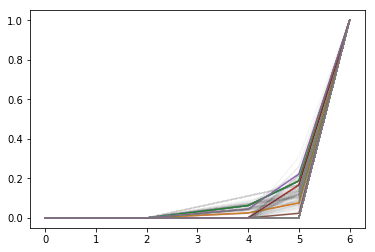

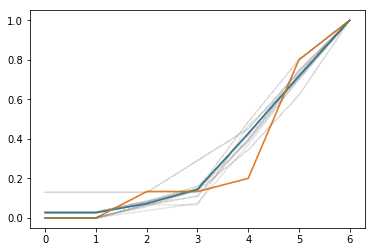

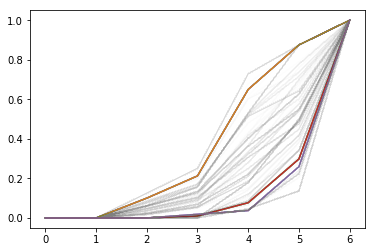

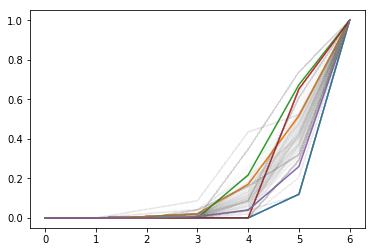

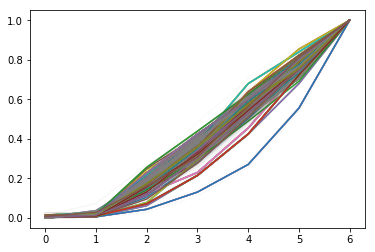

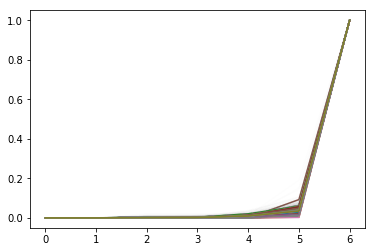

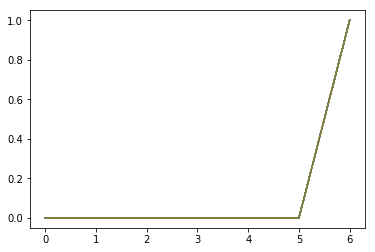

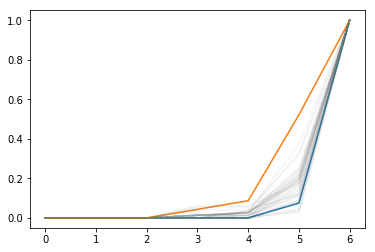

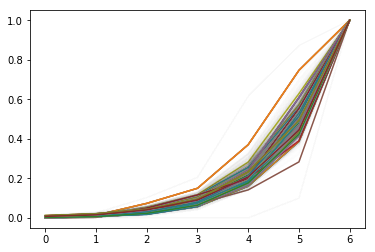

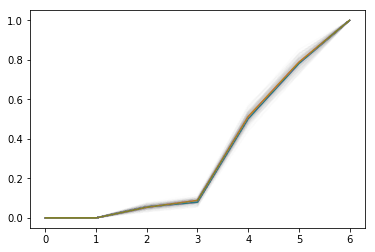

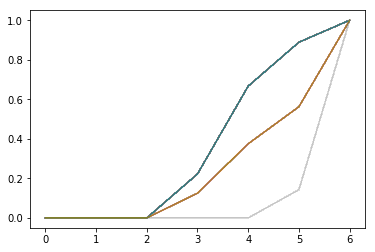

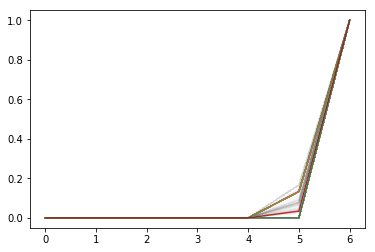

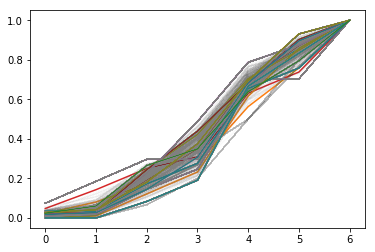

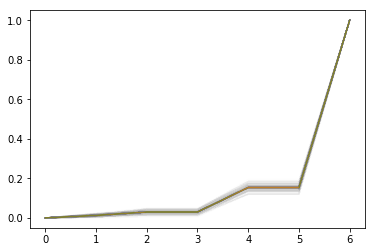

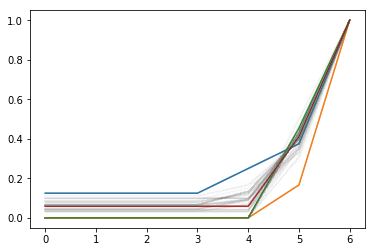

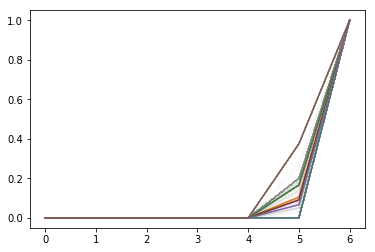

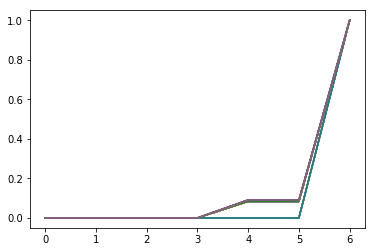

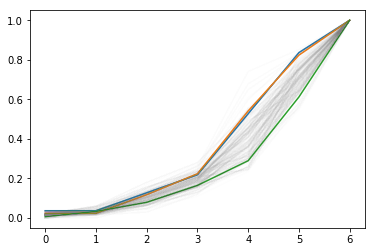

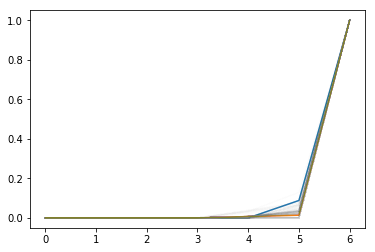

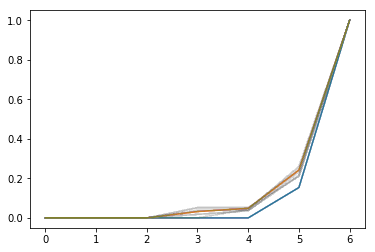

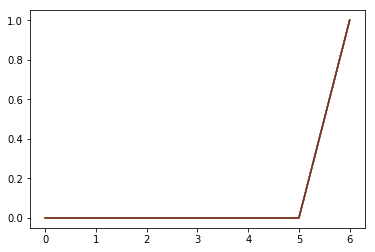

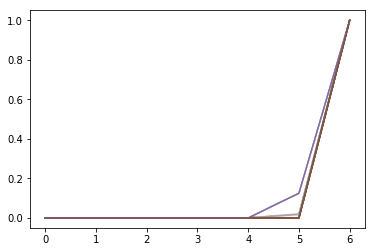

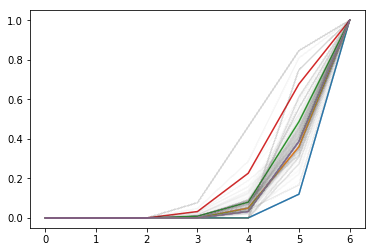

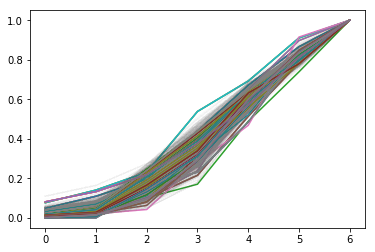

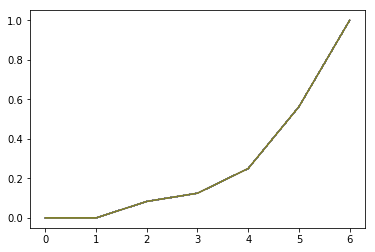

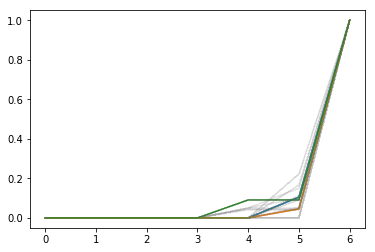

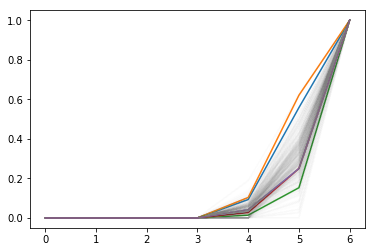

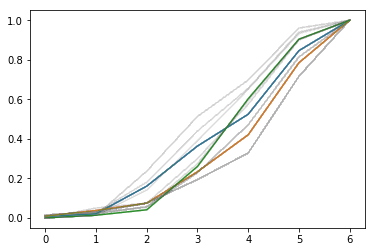

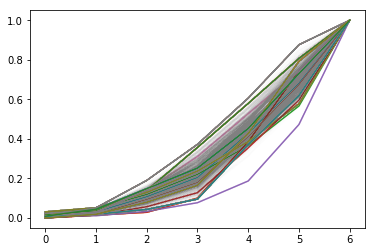

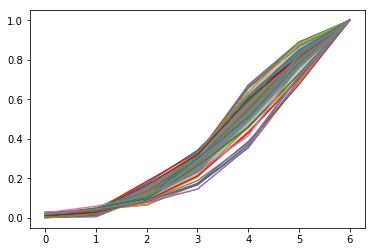

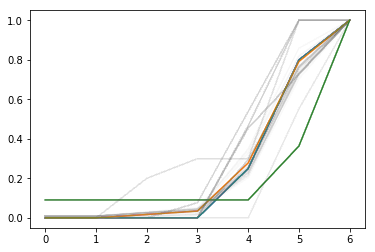

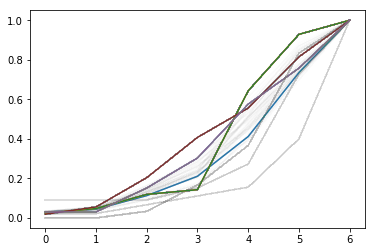

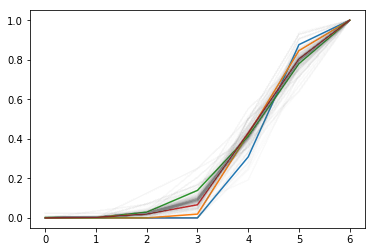

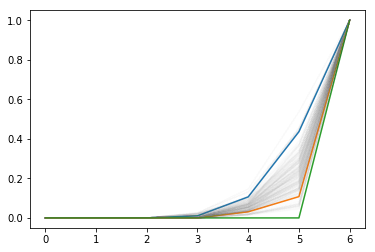

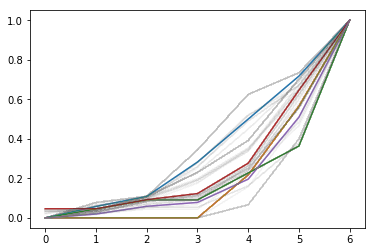

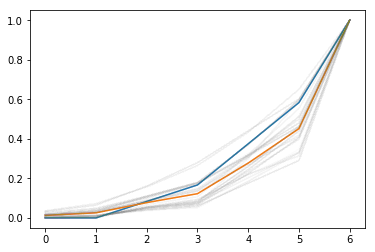

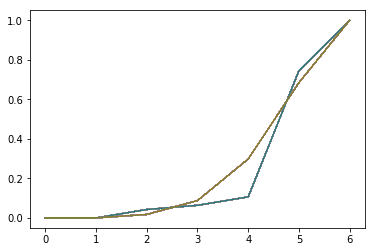

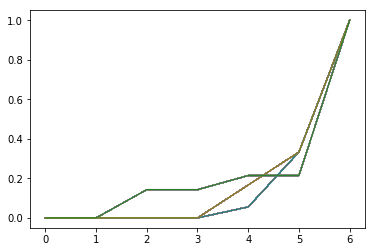

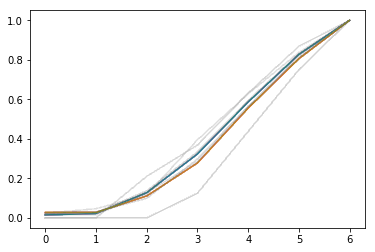

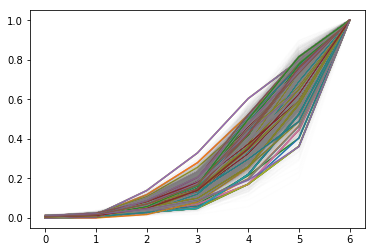

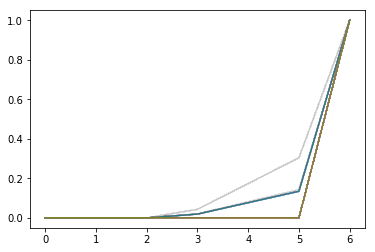

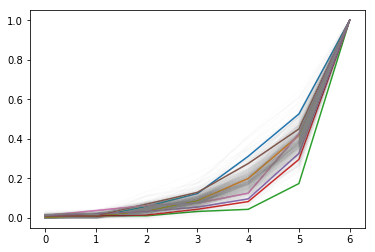

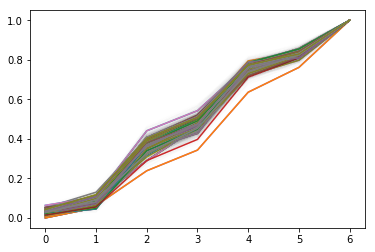

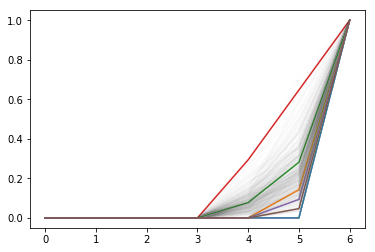

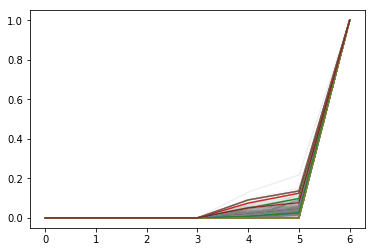

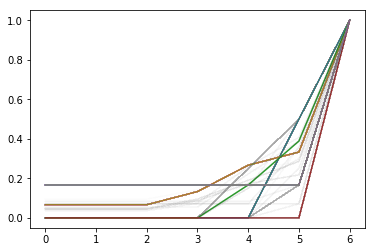

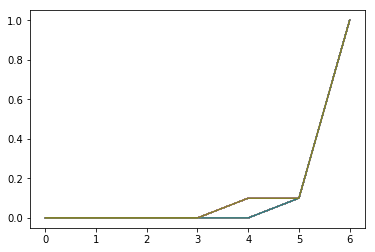

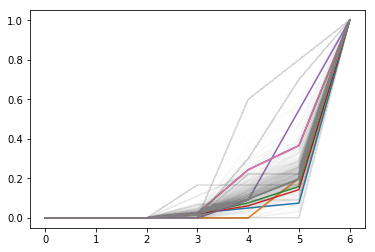

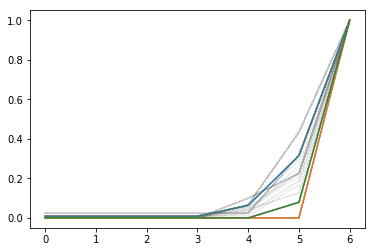

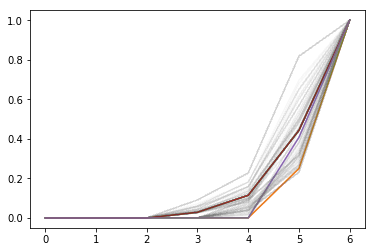

In [105]:
%%time

npermutations=100

letter_grades = ['f_count', 'd_count', 'c_count', 'bc_count', 'b_count', 'ab_count', 'a_count']

all_pvalues = {}

grouped_courses = df.groupby("course_uuid")
for course, course_df in list(grouped_courses)[:50]:    
    plt.figure()
    grouped_course_offerings = course_df.groupby("instructor_id")
    num_instructors = len(grouped_course_offerings)
    num_comparisons = num_instructors*(num_instructors-1)/2
    all_cdfs = []
    for instructor, instructor_df in grouped_course_offerings:
        pmf = np.array(instructor_df[letter_grades].sum().values, dtype=float)
        pmf /= float(instructor_df[['total_grades']].sum().values[0])
        cdf = np.cumsum(pmf)
        plt.plot(cdf)
        all_cdfs.append(cdf)
    all_cdfs = np.array(all_cdfs)
    min_cdf = np.min(all_cdfs, axis=0)
    max_cdf = np.max(all_cdfs, axis=0)
    cdfs_diffs = max_cdf-min_cdf
    max_diff = np.max(cdfs_diffs)
    real_max_diff = max_diff

    permuted_max_diffs = []
    for _ in range(npermutations):
        course_df["instructor_id"] = np.random.permutation(course_df["instructor_id"])
        grouped_course_offerings = course_df.groupby("instructor_id")
        all_cdfs = []
        for instructor, instructor_df in list(grouped_course_offerings):
            pmf = np.array(instructor_df[letter_grades].sum().values, dtype=float)
            pmf /= float(instructor_df[['total_grades']].sum().values[0])
            cdf = np.cumsum(pmf)
            plt.plot(cdf, color='gray', alpha=0.01)
            all_cdfs.append(cdf)
        all_cdfs = np.array(all_cdfs)
        min_cdf = np.min(all_cdfs, axis=0)
        max_cdf = np.max(all_cdfs, axis=0)
        cdfs_diffs = max_cdf-min_cdf
        max_diff = np.max(cdfs_diffs)
        permuted_max_diffs.append(max_diff)
    permuted_max_diffs = np.array(permuted_max_diffs)
    p_value = np.mean(permuted_max_diffs >= real_max_diff)
    corrected_p_value = p_value*num_comparisons
    
    print(course, p_value, num_comparisons, corrected_p_value)
    all_pvalues[course] = (p_value, num_comparisons, corrected_p_value)
    

In [108]:
8/50.*5000/60

13.333333333333334

# Trying to run on a bunch of courses

In [110]:
all_pvalues = {}

In [111]:
import pickle

In [112]:
pickle.dump(all_pvalues, open("all_pvalues_100.pkl", "wb"))

In [ ]:
%%time

npermutations=100

letter_grades = ['f_count', 'd_count', 'c_count', 'bc_count', 'b_count', 'ab_count', 'a_count']

all_pvalues = pickle.load(open(f"all_pvalues_{npermutations}.pkl", "rb"))

grouped_courses = df.groupby("course_uuid")
for course_index, (course, course_df) in enumerate(list(grouped_courses)): 
    if course in all_pvalues.keys():
        continue
    grouped_course_offerings = course_df.groupby("instructor_id")
    num_instructors = len(grouped_course_offerings)
    num_comparisons = num_instructors*(num_instructors-1)/2
    all_cdfs = []
    for instructor, instructor_df in grouped_course_offerings:
        pmf = np.array(instructor_df[letter_grades].sum().values, dtype=float)
        pmf /= float(instructor_df[['total_grades']].sum().values[0])
        cdf = np.cumsum(pmf)
        all_cdfs.append(cdf)
    all_cdfs = np.array(all_cdfs)
    min_cdf = np.min(all_cdfs, axis=0)
    max_cdf = np.max(all_cdfs, axis=0)
    cdfs_diffs = max_cdf-min_cdf
    max_diff = np.max(cdfs_diffs)
    real_max_diff = max_diff

    permuted_max_diffs = []
    for _ in range(npermutations):
        course_df["instructor_id"] = np.random.permutation(course_df["instructor_id"])
        grouped_course_offerings = course_df.groupby("instructor_id")
        all_cdfs = []
        for instructor, instructor_df in list(grouped_course_offerings):
            pmf = np.array(instructor_df[letter_grades].sum().values, dtype=float)
            pmf /= float(instructor_df[['total_grades']].sum().values[0])
            cdf = np.cumsum(pmf)
            all_cdfs.append(cdf)
        all_cdfs = np.array(all_cdfs)
        min_cdf = np.min(all_cdfs, axis=0)
        max_cdf = np.max(all_cdfs, axis=0)
        cdfs_diffs = max_cdf-min_cdf
        max_diff = np.max(cdfs_diffs)
        permuted_max_diffs.append(max_diff)
    permuted_max_diffs = np.array(permuted_max_diffs)
    p_value = np.mean(permuted_max_diffs >= real_max_diff)
    corrected_p_value = p_value*num_comparisons
    
    print(course_index, course, p_value, num_comparisons, corrected_p_value)
    all_pvalues[course] = (p_value, num_comparisons, corrected_p_value)
    pickle.dump(all_pvalues, open(f"all_pvalues_{npermutations}.pkl", "wb"))
    

0 00060aa6-37a0-31ea-9cbc-764733edaa37 0.23 21.0 4.83
1 0008ba14-8d7a-3648-a092-9af2afd01474 0.12 1.0 0.12
2 0009e5ca-836c-3770-bf9e-7ad53caee832 0.57 10.0 5.699999999999999
3 0016a642-b100-3c2c-83ea-bcb8d18622fd 0.15 10.0 1.5
4 001738d6-6195-3557-8833-83cb53fdc779 0.0 10585.0 0.0
5 00311152-1b06-32b8-b282-969566843287 0.03 1176.0 35.28
6 0038a678-b176-3a32-ba12-41c27a3aa0f6 1.0 1.0 1.0
7 0039d485-90d6-30cc-aac4-fe36a8021b19 0.08 1.0 0.08
8 003e7bf5-85a2-369b-a0d6-b6215231a67c 0.07 1431.0 100.17000000000002
9 003fbdbf-277c-3eae-bcc9-4e09e05f925b 1.0 1.0 1.0
10 005123fb-4f4d-3b2a-892c-33bbe79964f1 1.0 1.0 1.0
11 00820589-1457-3756-8de6-95f302b554bb 0.63 6.0 3.7800000000000002
12 008a6c97-fc09-3672-a1c8-110fb3e6c258 0.45 253.0 113.85000000000001
13 009bdb47-39c1-34d5-8cbb-e3c5ebdff217 1.0 1.0 1.0
14 00a17f67-ed74-3d86-9876-9a677ef991e4 0.0 6.0 0.0
15 00bcfa1d-ebe1-3209-bbd3-99d930ac649d 0.44 15.0 6.6
16 00e2f136-f0f1-325a-b4d3-e32d4ff820a7 1.0 105.0 105.0
17 010f43a6-ec05-30ab-aad7-c1f70

147 070142f7-494e-3869-b47a-72dde9c5fe2b 0.81 1.0 0.81
148 0720ee51-513a-37bf-b7a0-d133a7cb716a 0.0 78.0 0.0
149 072dc2a3-5489-34c7-bef2-260d232b66e2 0.72 15.0 10.799999999999999
150 072eaa90-9431-36b1-855e-796e688ee738 0.19 10.0 1.9
151 07440f0a-e0d6-3a87-ba1e-18262f8c894e 0.43 28.0 12.04
152 07778556-63e3-3910-931e-b09973e94125 0.25 6.0 1.5
153 07796487-160e-34de-ac9c-0e12eb9e3a20 0.26 3.0 0.78
154 0791ad4d-0a9f-3d15-807f-9c0d7befb7b3 0.53 300.0 159.0
155 0792eac4-46ac-3e08-8cd0-858349ff66d1 0.86 120.0 103.2
156 07c5d906-049f-30c3-8133-c158d6086410 0.45 91.0 40.95
157 07cc8de1-729d-35e0-960c-3200a0c35fe8 0.06 36.0 2.16
158 07d20cd8-4d63-3677-9409-9f1675bf314f 0.77 6.0 4.62
159 07ed3a22-3f5b-3d2a-90ee-202dd9c7b8c6 0.78 6.0 4.68
160 07fad59c-5c8f-3982-9348-eecc09b5b6e7 0.0 66.0 0.0
161 0808c6a9-57e3-356b-a4b0-6c6a80dcd12f 0.98 6.0 5.88
162 080e88c4-05dd-3fe0-94df-6c6f8b4dc95c 0.76 1.0 0.76
163 080ff574-b08d-3484-be5a-9babd0a56728 1.0 3.0 3.0
164 0810dc81-809d-38a9-8990-c9bf0b6dd0be 0.0

290 0e19ad0e-3992-3e91-946d-65dfa19b3d2f 1.0 1.0 1.0
291 0e304617-5a36-37e5-952a-02187066e917 0.51 21.0 10.71
292 0e462e6d-2d38-36d6-b1f5-ee8840b68285 1.0 3.0 3.0
293 0e516981-1707-3504-ae66-9b719bd750ae 0.8 1.0 0.8
294 0e551101-8453-3ef1-ac93-8201437316c4 0.87 1.0 0.87
295 0e5f483d-7944-355b-b893-482624624598 0.15 1.0 0.15
296 0e7b8a34-bb25-3c3c-ae26-f3399a621d9f 1.0 6.0 6.0
297 0e8ba759-2847-3fcf-ad6d-2bcbdf289266 0.16 10.0 1.6
298 0e9e330d-cb14-3c90-becc-4705073a7f9a 0.94 3.0 2.82
299 0e9ed188-ecca-38fc-a298-f6b2766af140 0.39 28.0 10.92
300 0ea7c3d9-a5fa-375c-9d8d-5b91e9d8d111 0.2 3.0 0.6000000000000001
301 0ebb0273-228a-3431-8cf3-7d0383d26978 0.0 190.0 0.0
302 0ec10cfe-f9bd-3496-8595-d7170247e9de 0.12 1.0 0.12
303 0ed70c9c-273f-36b2-866b-d28bc2cb0717 1.0 1.0 1.0
304 0edcd923-d95e-3ca3-a9a7-e52e4f3a5702 1.0 1.0 1.0
305 0ee8ccf6-84b1-39ab-9709-f0a5f8615448 0.16 6.0 0.96
306 0ef87216-8a8f-378b-9135-eaf4ed49177a 0.27 1.0 0.27
307 0f028eba-ac26-36d3-b6f1-c18a72303e74 0.34 1225.0 416.500

432 157df5a6-94d7-3c74-8f7f-d07a6f8007cf 0.27 6.0 1.62
433 15b22272-f570-350c-9883-28eeed1184f8 1.0 6.0 6.0
434 15b8220c-0d09-3a8c-9067-3fd3cbbf9330 1.0 1.0 1.0
435 15be9517-c1f4-3912-ba4c-83eac617b985 0.11 36.0 3.96
436 15c23b70-d5cf-3278-90e0-518d9e10522c 0.71 1.0 0.71
437 15c753c4-6dd4-3394-9fc4-d75a69d0bd74 0.71 45.0 31.95
438 15cdd8fd-a021-3890-93e9-8bb4b826a670 0.2 15.0 3.0
439 15d39f80-c488-3a68-8e17-5ce2dd56a022 0.16 1.0 0.16
440 15d73bb2-e6f2-3faa-aa23-7acf11a89bfb 0.07 6.0 0.42000000000000004
441 15d8aeb7-b972-39b4-97e3-b5b66babf5dd 1.0 6.0 6.0
442 15de8b1f-a766-37a2-9138-b136d3bcf50a 0.27 1.0 0.27
443 161230ca-93df-3d23-b359-90007d351280 1.0 105.0 105.0
444 161c25e9-00bf-375d-9ec4-2f9729e8c830 0.76 1.0 0.76
445 161fd2d5-d5a3-3e80-849c-54ef4b77f575 0.94 6.0 5.64
446 16344173-1e66-39e0-b544-1c84a3c68d64 0.92 78.0 71.76
447 16475ac0-6dfa-3dd0-a46b-d0e6e740c909 0.86 1.0 0.86
448 16483a30-3978-3c1c-8593-f6400ee155d3 0.15 91.0 13.65
449 165e7668-3c76-3ddf-a98a-4653fb73aa73 1.0 55.

576 1ce81dd8-60d2-3d78-9d02-e38eeb29c980 0.5 28.0 14.0
577 1cfc6f85-091a-3413-b5bf-6026b6bf96ee 0.39 1.0 0.39
578 1d08ecec-b2b9-39b0-b5f9-d088d6e41d53 0.04 3.0 0.12
579 1d1a4c74-d8a9-362e-af28-009403f1d5fe 0.35 3.0 1.0499999999999998
580 1d1ea31e-cb6e-3b77-8652-2b00eadfadf4 1.0 1.0 1.0
581 1d21fd94-7542-3d26-b90b-71c1072de3e1 1.0 1.0 1.0
582 1d27971a-a47f-39c7-a0d6-9d149b143461 0.04 91.0 3.64
583 1d33489a-f1d9-3de3-80bd-480fafafd27f 0.0 528.0 0.0
584 1d4fc45f-9dba-313e-97ab-3a0bd732aeeb 0.7 10.0 7.0
585 1d5386f9-3984-3be2-96cd-84b950cc7ed6 1.0 1.0 1.0
586 1d591c52-eaa2-3cd5-a983-fd96b957e27d 0.17 3.0 0.51
587 1d5fe601-6ba8-3935-b57b-a9ce0b28aa55 0.77 15.0 11.55
588 1d6b38c8-9f31-385d-8760-24572b5d2c1b 0.18 1.0 0.18
589 1d793cc7-df09-3339-965d-dd59a352403b 0.91 1.0 0.91
590 1d892e7d-97c9-38f1-9e3f-608f57f6100a 0.84 3.0 2.52
591 1d9c64f4-af07-3b9b-8c22-b4f95be7d4e1 1.0 1.0 1.0
592 1d9e4abc-13f1-33a2-a266-06bd17a93da9 0.32 3.0 0.96
593 1da45b19-e735-3ac6-b11a-6d0c88bfb488 1.0 1.0 1.0
594 

720 237e2116-179c-3ab2-ade7-3f50da46c8f8 1.0 6.0 6.0
721 2388aad5-aab8-316c-b784-f61bc5fde0d4 1.0 1.0 1.0
722 238f38dd-efa0-373a-a649-984e22504602 0.19 1.0 0.19
723 23972733-241a-30fc-bd4f-a55a8b42b5a2 0.58 1.0 0.58
724 2398205a-3c84-3233-a0a9-dd7f207f8222 0.02 1.0 0.02
725 23ab6f2f-2213-3227-b01d-2fb5205caf43 0.06 253.0 15.18
726 23b135c1-af29-3743-b796-23528678230e 0.6 66.0 39.6
727 23b6daf6-6a59-3445-a4e3-3ca284a297db 1.0 1.0 1.0
728 23b90bbf-79e6-3183-a624-9ebdc4fd8b30 0.76 1.0 0.76
729 23d1e3b2-ee98-39ec-91d3-e755d0e8be69 1.0 1.0 1.0
730 23d3a1f6-744e-3db6-8153-9668d3bbc558 1.0 1.0 1.0
731 23f236ff-9bc6-3d79-bfda-bf527c8f3757 0.01 276.0 2.7600000000000002
732 2432a789-1704-3956-9ddd-1ad6bf56a2c9 0.81 3.0 2.43
733 24443493-95c7-394c-9b6e-fb43ba95d0f7 0.17 105.0 17.85
734 24682147-ecbf-370b-a241-617915b82183 0.06 6.0 0.36
735 246be55a-7b59-3723-95fa-4e5e45753bb0 0.05 10.0 0.5
736 2475767a-b994-3321-ab1a-48179af9b2d6 0.62 741.0 459.42
737 247bd27c-01b2-3204-992f-b4f8393b984c 0.7 561.

865 2a5db92f-540e-3a93-80cd-5194c7dc78eb 0.24 120.0 28.799999999999997
866 2a5f1d08-9fe8-3881-a71c-8af6977a8458 1.0 3.0 3.0
867 2a5f7815-e580-39ba-af04-cd786f555c43 0.13 6.0 0.78
868 2a7fe400-f913-3c99-9b0f-3b9a791d9dde 0.55 1.0 0.55
869 2a871652-283d-3bc1-9eb1-605f101e7935 0.32 3.0 0.96
870 2a993ef2-aebc-3e36-b620-8574b9d9e6cf 0.03 3.0 0.09
871 2ab4f89e-cb94-3c7a-99f1-869f3a608ddb 1.0 3.0 3.0
872 2abd6e4a-6c44-35bf-acf3-c648953ab752 1.0 1.0 1.0
873 2accc069-fdeb-360c-b1be-bba304044861 0.67 1.0 0.67
874 2ae394fc-eee1-326b-b08e-10d7c90f593e 0.73 3.0 2.19
875 2af67e07-66a9-35eb-952e-67b6b6c45adb 0.4 120.0 48.0
876 2af6815e-db49-319b-8c85-c2f6be396e84 0.74 6.0 4.4399999999999995
877 2af791b0-a462-3c30-928c-6328619277f7 0.98 1.0 0.98
878 2af85de5-8a48-3cce-b758-d5b454af22e5 0.17 6.0 1.02
879 2af8747e-03e1-3b05-89ec-a825bdeee987 0.15 1.0 0.15
880 2afa2dd1-b804-39bd-a2a6-c2ffc529ba5f 1.0 1.0 1.0
881 2afbba2d-a67e-3fff-aa33-942920d839db 0.0 10.0 0.0
882 2afdbd04-ee0a-305f-b68e-f93f323eb93c 0.

1010 30ce29ee-b997-3e91-b255-99d7fb329a26 0.0 36.0 0.0
1011 30d7a838-46f7-36bf-ac2d-8f61487b0917 0.05 10.0 0.5
1012 30d9120a-75f1-395c-aa26-cf9c55f8ad3c 0.7 1.0 0.7
1013 30e1fb5d-43c0-37e0-a3f0-4704d79d1b51 1.0 1.0 1.0
1014 30e77570-8291-314b-8189-d78d57df022f 0.21 28.0 5.88
1015 30edb0b0-ac0e-3127-a968-f98c43441e1a 0.3 1.0 0.3
1016 31025502-ca25-3739-bf0a-e1b794cea5b9 0.01 990.0 9.9
1017 311f4d1d-206e-333f-9dec-f6ca3c883782 0.63 3.0 1.8900000000000001
1018 312ac743-22fa-3630-9a87-2525649d80d3 0.02 3.0 0.06
1019 314bf4c3-988e-3c5d-b732-9569c2980e6d 0.4 10.0 4.0
1020 314f7ec4-5d4d-3c09-8657-44ab5b211fb2 0.5 1.0 0.5
1021 31520abb-69bb-3abe-8f84-86dfc4d4c7c6 1.0 3.0 3.0
1022 3152c34f-9675-38cb-9c5b-0cabd05aa240 0.39 10.0 3.9000000000000004
1023 3168ba8f-02f4-3499-9be6-5dc8fe3c4376 0.24 78.0 18.72
1024 3175ac41-81c0-3573-b926-c6e2461bd3e8 1.0 10.0 10.0
1025 3180b0eb-b24f-3b9e-93f5-e6f619a00255 0.07 36.0 2.5200000000000005
1026 31881ba1-0bb5-370d-b42e-9a811b6a75be 0.12 276.0 33.12
1027 318c

1152 36f8bd9e-56fa-387b-bf73-e3ced1678354 0.3 55.0 16.5
1153 36ff3bec-2c78-38e4-9458-3094ebc93820 1.0 1.0 1.0
1154 3706aaa5-73b5-34f2-b19d-a53944bacd47 0.72 91.0 65.52
1155 370be059-d2ff-365f-88ff-0d0663fc972c 0.12 15.0 1.7999999999999998
1156 371525f0-413e-376e-9ec5-43b905793e13 0.89 1.0 0.89
1157 371e8df6-2151-3963-ba12-162251ddd720 0.29 1.0 0.29
1158 373a85f0-e569-37e6-943f-13069050dab4 0.54 91.0 49.14
1159 373d0c73-8ca2-36cb-9275-bf0fa3b21ea6 0.52 21.0 10.92
1160 374e1a21-e20f-3c14-b3a0-22cb61db78e7 0.02 6.0 0.12
1161 375be695-8a2b-327f-a297-f7dbc97ce275 0.28 45.0 12.600000000000001
1162 375e0a24-cff8-3753-a5e7-1d91f789d088 0.12 1.0 0.12
1163 37674ae8-c279-3fc2-ae6a-590c55fa412b 0.08 1.0 0.08
1164 376d6cd8-e74e-3c70-bc74-9c8cf56dfd01 1.0 1.0 1.0
1165 376d9ae8-0b87-30a7-a85c-f63b385bb030 0.97 15.0 14.549999999999999
1166 37792b3b-dd76-3ddf-b858-31998dfc4e14 0.08 55.0 4.4
1167 3795cfcc-807e-3ca7-8348-d4a909a42f06 1.0 1.0 1.0
1168 379ebb84-20db-369e-b60c-7301651cfaf4 0.94 78.0 73.32
1

1291 3d984241-e3de-3fb1-966c-f13eb5df69ca 0.01 1485.0 14.85
1292 3d9db12a-7590-3378-bab8-a3a7b479dd77 0.0 1.0 0.0
1293 3dada730-2fef-3928-9c83-aa6ce1d8ee41 1.0 3.0 3.0
1294 3db95edd-0acd-3e07-87d9-27b6d7d3eae6 0.77 3.0 2.31
1295 3dbd2be9-9044-378f-b910-f6d851fe61f7 0.41 6670.0 2734.7
1296 3dcfe4b7-9340-3520-8562-54ba2f5d852f 0.28 1.0 0.28
1297 3ddb0d69-e85c-3987-a965-0324413f9775 0.29 1.0 0.29
1298 3de1ba65-5f38-3b86-99da-2925fe06f28e 0.2 3.0 0.6000000000000001
1299 3dfc4c70-81c5-3f5f-b3db-241f88ff6e14 0.98 3.0 2.94
1300 3e044657-77e4-3b82-809e-eb6446d8aa15 0.0 6.0 0.0
1301 3e0dec5f-6118-3a0b-8361-f460955a9840 0.32 1.0 0.32
1302 3e1acbfb-4822-3290-99cb-582ca67e798f 0.81 6.0 4.86
1303 3e215142-88a9-3871-90c7-ac47e0be6d0a 0.18 15.0 2.6999999999999997
1304 3e23efe6-72a4-3cc2-ac1f-10ac7a79aa03 1.0 1.0 1.0
1305 3e245053-7b77-3f12-9d65-e09422f23818 1.0 1.0 1.0
1306 3e2fe18a-32f9-3e6f-a627-f77481eb84d9 0.99 3.0 2.9699999999999998
1307 3e3720a8-4fbf-3a1a-8591-02635cb5ff14 0.46 3.0 1.3800000000

1432 44786b61-b8d5-3125-8a06-f8d3b0d59402 0.6 3.0 1.7999999999999998
1433 4482afd5-24af-3af8-a92f-6b7a58b83abd 0.13 3.0 0.39
1434 44a18a2a-bed3-35e4-bf5b-e6963bf5eb63 0.65 15.0 9.75
1435 44afdecd-5642-3ed8-8a14-ea075c219ceb 0.64 3.0 1.92
1436 44b0b66f-5ebc-3efc-a061-17bd8977c506 0.64 10.0 6.4
1437 44b21c2d-4778-39f1-ae95-425a067afa43 0.67 1.0 0.67
1438 44b564cb-c526-3846-a965-c6eba9557e41 0.25 1.0 0.25
1439 44ba7a07-97f3-3ab0-bf9a-d3cd4acce69f 1.0 1.0 1.0
1440 44e2386d-58cd-30ba-8807-df3b1e055c08 0.16 15.0 2.4
1441 44eba3b8-28d1-339a-b3cd-7383c73552a2 0.35 1.0 0.35
1442 44f56d90-d5d5-38d2-ad1b-36038fd3e90d 0.03 28.0 0.84
1443 44fc58fa-7ab4-3d7f-b675-8a4883e671f3 0.15 1.0 0.15
1444 4516d929-3d64-322c-85b0-7048ffe36e34 1.0 1.0 1.0
1445 45277f9d-de71-3fdc-a54f-4a74beebbaee 0.26 28.0 7.28
1446 4538bba5-6275-3204-a661-bd4d30b9cb26 1.0 6.0 6.0
1447 4546189f-f4a8-30b9-830b-8dc57da763d9 1.0 120.0 120.0
1448 454b1e45-2d07-3061-bcd8-e69a1cc9b74f 0.44 10.0 4.4
1449 45528405-f675-391b-b23a-676c9a0

1574 4bbe242a-9bd1-3cbd-8028-df71319855c5 0.27 4095.0 1105.65
1575 4bbf23ad-8c22-3e50-8b10-851722fba06d 0.61 171.0 104.31
1576 4bc9f278-6d97-33ec-8b4f-a5354e288af5 0.04 55.0 2.2
1577 4c05436f-19b3-3f06-b99a-c28d268997f5 0.45 36.0 16.2
1578 4c0f27c4-1c84-3392-93b7-ba6749a114a0 0.12 66.0 7.92
1579 4c1e700d-b496-38f2-a5ef-868282dd276d 0.74 36.0 26.64
1580 4c3ab513-553c-3ce9-9b53-5eeaf56a9608 0.7 1.0 0.7
1581 4c46f450-a829-3035-8d5a-d9c15ece70e9 0.13 91.0 11.83
1582 4c4fc10d-0a2e-3e41-8cae-7587ff15bd60 1.0 1.0 1.0
1583 4c60d485-46be-3db3-ac6d-9f13d36c3ca4 1.0 1.0 1.0
1584 4c64bcfa-0bd8-3dca-ad81-90ad87ba131c 0.15 10.0 1.5
1585 4c7a2403-5743-3119-b749-b6ae5ce46aa0 0.67 10.0 6.7
1586 4ca0c338-8ec6-3aa6-b087-df7dd57f9807 0.28 6.0 1.6800000000000002
1587 4ca14e6d-f7ce-3d2c-b1fd-f168631ac857 0.05 3.0 0.15000000000000002
1588 4cadcef2-9447-37a3-a232-04d07c3c2033 0.01 435.0 4.3500000000000005
1589 4cb449d1-5d35-3c20-b343-42fe786d9081 0.0 231.0 0.0
1590 4cbce30a-116b-32ca-81a1-690fd8b9b8cb 0.02 1.

1716 532d3503-6a9e-3440-baa7-1d29295413d4 0.0 1128.0 0.0
1717 534c041b-432f-3b9f-87d1-e009b16cb24f 1.0 1.0 1.0
1718 534e8555-79a9-373e-9c35-549e76c4c66d 0.32 1.0 0.32
1719 535b8fd3-cee7-3400-ac64-6d1d41ae68bb 0.02 1.0 0.02
1720 5363b5ae-36a3-307e-91b9-7b69de059c34 1.0 1.0 1.0
1721 53791164-92b5-3024-8226-be46ce35712d 0.58 36.0 20.88
1722 5395f5c6-68c4-3a81-ab4b-525365d12c55 0.05 435.0 21.75
1723 53afeb69-82d2-39fb-b952-c912a383fbea 0.97 1128.0 1094.16
1724 53c36728-5c8b-30f8-8323-a24044270303 1.0 1.0 1.0
1725 53cb0fda-6247-30cd-b334-70a5f30e2b86 0.08 21.0 1.68
1726 5445daae-7d9e-33eb-8754-d6d93bd2bfee 0.65 6.0 3.9000000000000004
1727 544fdb91-b3fa-33d7-9f6b-f35743329ba2 0.5 36.0 18.0
1728 54552417-ea86-31c2-8598-b1c5aa0815e0 0.01 10.0 0.1
1729 5470e727-b373-3c92-8229-03942101e332 0.04 1.0 0.04
1730 547b978f-6db9-3680-b73f-52e9cfe190d8 0.32 36.0 11.52
1731 5480959a-7832-31ed-91ce-2ed4add767d7 0.33 3.0 0.99
1732 54900332-20c3-3249-ab1b-d24e3ce2b457 0.0 300.0 0.0
1733 54bd1f78-8b0e-34ba-a

1856 5aa74467-9b9b-366d-b3fc-e33bca36101a 0.99 105.0 103.95
1857 5aaaaa5f-5489-30fe-87f2-a1d57bc6bbe8 0.54 21.0 11.34
1858 5ab25757-f857-3647-a6e5-5e6cc054ccad 1.0 36.0 36.0
1859 5ab9214d-d2cd-3142-ba22-822d6c7dee46 0.33 1.0 0.33
1860 5ae286a9-8c0a-3ae0-b4c2-725423ff5ce7 0.97 55.0 53.35
1861 5ae6cd86-e666-3e7b-8a49-7ebc236a3bea 0.6 1.0 0.6
1862 5ae7ea64-b38f-3988-b2e0-f831eab33fe4 0.2 171.0 34.2
1863 5af87913-71be-3fe6-bfd1-aabc43132db8 1.0 1.0 1.0
1864 5afd1483-16fb-36ef-ab5c-ca98ad6d855d 1.0 21.0 21.0
1865 5b0d87cf-b4d4-3d63-bfdb-cb4800c00486 0.12 21.0 2.52
1866 5b1d25ce-d413-3cab-8839-5f6590f05583 0.13 903.0 117.39
1867 5b292081-98a0-3274-8a93-84ffec432ebb 0.89 1.0 0.89
1868 5b361a11-a41d-3ab8-a9c4-fae80735b8a2 1.0 325.0 325.0
1869 5b4c76d4-43eb-312b-abbf-41e81f3e6f6b 0.45 10.0 4.5
1870 5b53156c-c425-33c8-8a02-2a0d5010dce0 0.44 1.0 0.44
1871 5b577af2-aa69-3a86-b677-b0448cf306ff 0.14 741.0 103.74000000000001
1872 5b720fb7-63df-38fd-9dba-2cb5288c60f5 0.43 15.0 6.45
1873 5b869c55-1bf3-

1997 60e314b0-0670-3442-88cf-1c21b43419b4 0.54 6.0 3.24
1998 6114d06a-4bd6-3b6d-8178-94fc8bd7e825 0.29 45.0 13.049999999999999
1999 6116f915-3660-3504-bc2d-da42b5cf3d7c 0.59 15.0 8.85
2000 61175dd0-3b06-3851-967d-3f05706cfa25 1.0 1.0 1.0
2001 613a6abb-9201-30bf-b617-9a5f9c25236c 0.45 45.0 20.25
2002 613ac8c5-d612-3d6e-9389-9b3d6e1a8dcf 0.96 3.0 2.88
2003 613aebf6-4b77-3517-9aa3-eb5606487b73 1.0 1.0 1.0
2004 613dd0d1-8c9a-3343-a9b2-66fb7ab27444 0.0 3.0 0.0
2005 613fbdc2-d4e9-3ac0-ae9b-af126ae97119 0.0 36.0 0.0
2006 6140f6ab-9f65-3833-aef1-4eaa2cb40a7d 0.24 1.0 0.24
2007 614ef33e-9cc8-359a-8104-d4d216132893 1.0 1.0 1.0
2008 615f8e56-a896-3479-8525-84449a7e852f 0.03 10.0 0.3
2009 616b3cdf-bbfd-3cee-9083-80d6d0f0c26b 0.39 6.0 2.34
2010 6171c664-0232-3b76-84b8-55b2abe36863 0.43 15.0 6.45
2011 6171ee68-1740-3c24-9cc9-02a1fab4a739 0.21 28.0 5.88
2012 618239e3-5740-3296-b934-e40abe1780c2 0.34 6.0 2.04
2013 61904276-2a83-31f4-a471-af10aa774567 0.0 1.0 0.0
2014 61a198cc-46d2-332d-af4b-2c67932e5b

2139 683a1049-8fa9-399e-9dd7-cd6ba55fbb4c 0.53 10.0 5.300000000000001
2140 683a3948-9700-35ea-acfa-be620a74abd6 0.78 15.0 11.700000000000001
2141 6841f5ee-7d67-3222-af59-c78b6fd87c74 0.0 10.0 0.0
2142 684eee71-f6f2-34f3-8ddd-0299554b1beb 0.9 6.0 5.4
2143 68540cbc-8286-3aa5-8d43-ead8ac006b67 0.07 3.0 0.21000000000000002
2144 685a727c-fdc0-3ba6-b521-1f236f69b5fa 1.0 6.0 6.0
2145 685ba79e-6e99-3112-9762-3986e1600f42 0.37 10.0 3.7
2146 685d1c16-3fe6-3442-9768-ef7f030de89c 0.32 55.0 17.6
2147 686cc568-8f32-3344-85af-a3a3dfe9c465 0.04 21.0 0.84
2148 68755eb2-e39c-3f57-b2bd-5ae77c1fdaa1 0.32 21.0 6.72
2149 6880598e-53d2-3f43-9b80-e855500e4431 0.23 6.0 1.3800000000000001
2150 68957ca9-f0a6-31ab-a7ce-9f32eb5191ad 0.2 45.0 9.0
2151 68a43156-97b4-3bbe-9c88-590f583ea891 0.88 3.0 2.64
2152 68d76c71-da72-3aa8-a1d2-d5366d1cae8f 0.67 3.0 2.0100000000000002
2153 68dc1830-6123-30cc-a4a4-c966531b43d4 0.07 1.0 0.07
2154 68de1aad-5cc3-3ba6-8326-98c2cfdfd47f 0.29 15.0 4.35
2155 68e210ee-274c-3483-b17d-bdceb

2279 6f6a1e5e-022d-350f-a0f8-3e9c9f26974f 0.34 351.0 119.34
2280 6f6d3141-2677-3800-b578-21e5e297d48f 1.0 1.0 1.0
2281 6f761faa-7dd8-37ce-9bdd-c38491cd7587 1.0 6.0 6.0
2282 6f7c4d5f-34e6-3248-ab0b-c0185991080c 1.0 105.0 105.0
2283 6f8650a3-2bb3-3c09-87d5-4821e6c063cd 0.41 6.0 2.46
2284 6f97c59d-1bdf-32f7-b162-940212b55084 0.01 10.0 0.1
2285 6fc61e7f-13f2-312f-af11-c3198055881e 0.64 1.0 0.64
2286 6fce827f-6488-341d-a24f-d08a3f5ed4d4 0.29 10.0 2.9
2287 6fd228a0-d79f-3878-ae6a-2656fe050231 0.0 1.0 0.0
2288 6fd3168e-722a-3706-af85-39160249270b 0.4 3.0 1.2000000000000002
2289 6fd4569b-96ff-37a7-9dcb-b8ac54a05600 0.19 1.0 0.19
2290 6fd9bf64-a4c1-3dec-b7d6-63b173e9d5bc 0.7 1.0 0.7
2291 6fe95e41-d5b5-3e65-8442-b8a3f5a9455a 0.22 1.0 0.22
2292 6ff894dd-963d-3781-a0e5-adc19824ecf8 0.01 36.0 0.36
2293 6ff9f808-fab0-38ee-90b2-f252b2d008b4 0.56 15.0 8.4
2294 7012fb0d-0500-316c-9296-a2e80a78d4b7 0.08 1.0 0.08
2295 701a5d02-9b58-31cb-8b80-f3bcf1dc023e 1.0 21.0 21.0
2296 702251f4-a7af-38ed-91ab-a8712ea

2419 7664c5d2-e056-3e8d-8393-1a1d9d8457d5 0.67 3.0 2.0100000000000002
2420 7670ee15-8e02-3100-aec4-bf5eb39078d6 0.02 6.0 0.12
2421 76786bff-5678-3f39-910c-1663cfe934bd 0.17 36.0 6.12
2422 7688b663-513f-3185-bd34-7367699e2d96 0.66 3.0 1.98
2423 76921f28-3037-35cb-8a7a-9234d1199281 0.29 3.0 0.8699999999999999
2424 76c0a72e-6784-3cb0-9cf8-8690d4985272 0.1 1.0 0.1
2425 76ca7ee4-2146-307f-b85c-f26e9e3414c2 0.7 55.0 38.5
2426 76dbd0fb-fe79-3b8a-881b-03c88c44fc55 0.0 3.0 0.0
2427 76e36522-bfaf-3427-a1c6-c73870c14095 0.58 3.0 1.7399999999999998
2428 76e496a1-104f-34ff-ae09-d2f53fd8bc6c 0.78 1.0 0.78
2429 76f0a804-983e-3eeb-b311-603584fa2d78 0.46 1.0 0.46
2430 76f80e71-5768-3753-ab18-9e2a37c243b8 0.01 15.0 0.15
2431 76f8ded1-f024-3426-99a7-a08af3bdac90 0.97 1.0 0.97
2432 770bed0e-9b58-3f54-876f-3d2980bb9236 1.0 1.0 1.0
2433 77118d52-0a64-3293-b984-52c6218ce55f 0.59 10.0 5.8999999999999995
2434 77142883-6926-3b0a-b384-1f669204988f 0.0 903.0 0.0
2435 7720afee-f936-3318-81b9-2cbc0584e102 0.64 1.0 

2560 7dedfc53-e454-3cdf-b2e4-fe767850d6d2 0.88 10.0 8.8
2561 7df3dc03-2183-3e5b-b661-f4129e99645d 1.0 1.0 1.0
2562 7dfce815-8312-3f77-b35b-0abf28026120 0.27 3.0 0.81
2563 7e042f31-b6a7-3589-a8f1-9696a715b3ec 0.23 15.0 3.45
2564 7e2c36eb-d98d-39c9-9eeb-b00d25a47fbc 0.18 171.0 30.779999999999998
2565 7e2eac52-24dd-30c7-811a-962ee96aaf59 0.12 10.0 1.2
2566 7e3d7fb3-d492-3d8d-bcc8-134d4aefade7 0.33 15.0 4.95
2567 7e407e12-c1fb-3117-b3c4-84800e698870 0.58 3.0 1.7399999999999998
2568 7e660595-4428-3b15-9fe7-69d2ee54105d 0.14 406.0 56.84
2569 7e6f163a-f065-3e37-adaa-fe2143e533c8 0.85 21.0 17.849999999999998
2570 7e70471e-946b-3688-82f0-a4b2a3d09d09 0.84 15.0 12.6
2571 7e76ab91-d6c3-3a6f-946b-f72d92b3df91 0.01 6.0 0.06
2572 7e81c7be-7926-347f-8fad-0e5e2802111e 0.77 1.0 0.77
2573 7e837f8b-4eb6-3939-9de4-7cfc871af29c 0.38 1.0 0.38
2574 7e8c7831-e4fa-30b3-871e-a6356d3f90a8 1.0 3.0 3.0
2575 7eb293ac-1a6d-3c5a-9813-e9155007c942 0.04 6.0 0.24
2576 7ebd1550-de94-3896-b8e4-5334b3219f22 0.99 10.0 9.9
2

2701 858da9fe-0ee7-3831-8d5c-b6e8986a2d44 0.44 3.0 1.32
2702 85a83e76-f73b-3db2-bdb0-4b06498d2492 0.4 3.0 1.2000000000000002
2703 85ab5a2c-0477-373e-a3bf-44d9ca7bb578 0.35 10.0 3.5
2704 85bc0c73-5251-3930-85ff-3790d12f6af0 0.67 153.0 102.51
2705 85c6e6ae-ead8-3a11-a560-fcdea67643c3 0.55 3.0 1.6500000000000001
2706 85d57c9e-90b0-355f-a485-0d4931b9177b 0.01 120.0 1.2
2707 85d76a6d-14ae-39a4-bca1-bde90c3fae1b 0.55 21.0 11.55
2708 85dc5e15-56ba-3865-b947-5c7ba3b0c11e 0.06 2850.0 171.0
2709 85e3e255-5bad-36de-b289-e5d9a7ef8a92 0.03 4753.0 142.59
2710 860f778b-d25b-320b-b1b4-c01a61b11588 0.69 10.0 6.8999999999999995
2711 862ebb32-4cbc-3409-831f-62bff3ae4c95 0.49 1.0 0.49
2712 862f26a7-c40f-389e-a565-8e068f0feea8 0.49 45.0 22.05
2713 863aa455-a032-3e13-bda5-1fbf931fd5e9 0.79 1.0 0.79
2714 8651710b-8d93-34fa-8ee6-db3d61c27234 1.0 1.0 1.0
2715 86626f29-3049-3654-bf60-7845aa53e758 1.0 10.0 10.0
2716 8674158c-ec0e-3a34-9982-bb96ca964a3d 0.14 66.0 9.24
2717 867ce667-6214-31cc-9ee7-7f747716260e 0.0

2842 8ca4cb82-0242-32e6-8206-b1f99ae17e84 0.28 3321.0 929.8800000000001
2843 8cabfc21-7c57-3d62-9c91-7607efe063ce 0.07 91.0 6.370000000000001
2844 8cb64e1d-43da-3889-a99a-a42b7c5f07cc 0.08 10.0 0.8
2845 8ce117d9-b060-3a80-973b-168299c72217 0.65 1.0 0.65
2846 8cfa4df8-dcd5-3c37-a204-56d6d6d7ecab 0.52 28.0 14.56
2847 8d0a55f4-a5b6-3d65-8bda-1fdcf10a8fa4 0.07 3.0 0.21000000000000002
2848 8d1d1a8f-44fc-3506-af04-4794b94fba23 1.0 1.0 1.0
2849 8d210402-1bb3-334d-b999-a6d15e9f66fa 0.58 66.0 38.279999999999994
2850 8d2c69bf-88a7-3372-9c7d-a300e6c69959 0.81 21.0 17.01
2851 8d2d2048-13a4-3615-a9da-c5904220c608 0.89 45.0 40.05
2852 8d304a28-4274-3390-8d3e-a003aed3b92f 0.05 91.0 4.55
2853 8d30a9c2-1bfe-38bd-97ba-a70f44aa71e9 0.52 190.0 98.8
2854 8d4fd016-12ef-30d9-a1c2-8a16cf02b0e5 0.12 3.0 0.36
2855 8d65d785-f9d6-3599-a278-dabce9cc3dcb 0.02 10.0 0.2
2856 8d6dc71a-88d8-3b88-bca5-2acc432a77b6 0.03 3.0 0.09
2857 8d74a854-d6b3-3743-9a3f-1a7599e7d865 1.0 6.0 6.0
2858 8d86c3c7-8291-3ac4-8bb2-d75addb202

2982 94ecbdb4-25ca-336d-ba28-cac78645c8b7 0.09 6.0 0.54
2983 94efdc70-42a6-3755-a1fa-193c64390b4b 0.22 3.0 0.66
2984 951edb49-8cb6-335a-9fb1-d4436e027fc5 0.0 1.0 0.0
2985 952deeae-316f-3cb6-834d-d2162895779a 0.24 15.0 3.5999999999999996
2986 9538aa63-a8cf-309b-b69c-a385327e3b45 0.06 1.0 0.06
2987 954d841d-1201-32f2-a252-c3a3fbb941c9 0.48 55.0 26.4
2988 9566757d-0bbf-31dd-b47b-2fb69fa1a22c 1.0 1.0 1.0
2989 956d4d55-6ee6-3ada-a37d-0759a66a8d44 0.53 15.0 7.95
2990 957598b4-d2f7-3c69-ba17-d54da537812c 1.0 1.0 1.0
2991 95771999-02b4-3387-b042-6de32edf1a6c 0.51 1.0 0.51
2992 9580a5e6-029c-37e5-a948-a0387fb4397b 1.0 1.0 1.0
2993 95863fdc-c5b0-3148-ab5b-07741719e79e 0.32 6.0 1.92
2994 958bf2be-72f7-3b02-8954-b01b410c7b8e 1.0 10.0 10.0
2995 958c0140-4ff2-32b8-91cd-601ed0dd29ea 0.64 15.0 9.6
2996 959ac78c-11b7-34df-b8b9-e467ec7637a0 1.0 1.0 1.0
2997 95a1d3a1-5df8-3605-bec5-85ac5791b2ff 0.62 1.0 0.62
2998 95b9aa25-b288-32a6-b8f6-83567591f387 0.0 21.0 0.0
2999 95bb98db-7369-3a73-ae50-dbcf0f69bd02 

# Finishing p-value computations

In [16]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
conn = sqlite3.connect('database.sqlite3')
c = conn.cursor()

In [3]:
c.execute("""SELECT co.course_uuid as course_uuid,
                    g.course_offering_uuid as course_offering_uuid,
                    t.instructor_id as instructor_id,
                    g.a_count as a_count,
                    g.ab_count as ab_count,
                    g.b_count as b_count,
                    g.bc_count as bc_count,
                    g.c_count as c_count,
                    g.d_count as d_count,
                    g.f_count as f_count
             FROM grade_distributions g
             JOIN course_offerings co ON g.course_offering_uuid = co.uuid
             JOIN sections s ON co.uuid = s.course_offering_uuid
             JOIN teachings t ON t.section_uuid = s.uuid
             """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()

,course_uuid,course_offering_uuid,instructor_id,a_count,ab_count,b_count,bc_count,c_count,d_count,f_count
0,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,344b3ebe-da7e-314c-83ed-9425269695fd,761703,105,0,0,0,0,0,0
1,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,761703,158,0,0,0,0,0,0
2,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,ea3b717c-d66b-30dc-8b37-964d9688295f,761703,139,12,2,0,3,0,0
3,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,ea3b717c-d66b-30dc-8b37-964d9688295f,3677061,139,12,2,0,3,0,0
4,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,ea3b717c-d66b-30dc-8b37-964d9688295f,761703,139,12,2,0,3,0,0


In [4]:
def convert_grades_to_ints(df):
    grades_list = ["a", "ab", "b", "bc", "c", "d", "f"]
    for grade in grades_list:
        df["%s_count" % grade] = df["%s_count" % grade].astype(int)

In [5]:
def add_total_grades(df):
    df["total_grades"] = df["a_count"] + df["ab_count"] + df["b_count"] + \
    df["bc_count"] + df["c_count"] + df["d_count"] + df["f_count"]

In [6]:
def filter_no_grades(df):
    return df[df["total_grades"] > 0]

In [7]:
def filter_only_one_instructor(df):
    grouped = df.groupby("course_uuid")
    return grouped.filter(lambda x: len(x["instructor_id"].unique())>1)

In [8]:
convert_grades_to_ints(df)

In [9]:
add_total_grades(df)

In [10]:
len(df)

2076665

In [11]:
df = filter_no_grades(df)

In [12]:
len(df)

756253

In [13]:
df = filter_only_one_instructor(df)

In [14]:
len(df)

742616

In [17]:
%%time

npermutations=100

letter_grades = ['f_count', 'd_count', 'c_count', 'bc_count', 'b_count', 'ab_count', 'a_count']

all_pvalues = pickle.load(open(f"all_pvalues_{npermutations}.pkl", "rb"))

grouped_courses = df.groupby("course_uuid")
for course_index, (course, course_df) in enumerate(list(grouped_courses)): 
    if course in all_pvalues.keys():
        continue
    grouped_course_offerings = course_df.groupby("instructor_id")
    num_instructors = len(grouped_course_offerings)
    num_comparisons = num_instructors*(num_instructors-1)/2
    all_cdfs = []
    for instructor, instructor_df in grouped_course_offerings:
        pmf = np.array(instructor_df[letter_grades].sum().values, dtype=float)
        pmf /= float(instructor_df[['total_grades']].sum().values[0])
        cdf = np.cumsum(pmf)
        all_cdfs.append(cdf)
    all_cdfs = np.array(all_cdfs)
    min_cdf = np.min(all_cdfs, axis=0)
    max_cdf = np.max(all_cdfs, axis=0)
    cdfs_diffs = max_cdf-min_cdf
    max_diff = np.max(cdfs_diffs)
    real_max_diff = max_diff

    permuted_max_diffs = []
    for _ in range(npermutations):
        course_df["instructor_id"] = np.random.permutation(course_df["instructor_id"])
        grouped_course_offerings = course_df.groupby("instructor_id")
        all_cdfs = []
        for instructor, instructor_df in list(grouped_course_offerings):
            pmf = np.array(instructor_df[letter_grades].sum().values, dtype=float)
            pmf /= float(instructor_df[['total_grades']].sum().values[0])
            cdf = np.cumsum(pmf)
            all_cdfs.append(cdf)
        all_cdfs = np.array(all_cdfs)
        min_cdf = np.min(all_cdfs, axis=0)
        max_cdf = np.max(all_cdfs, axis=0)
        cdfs_diffs = max_cdf-min_cdf
        max_diff = np.max(cdfs_diffs)
        permuted_max_diffs.append(max_diff)
    permuted_max_diffs = np.array(permuted_max_diffs)
    p_value = np.mean(permuted_max_diffs >= real_max_diff)
    corrected_p_value = p_value*num_comparisons
    
    print(course_index, course, p_value, num_comparisons, corrected_p_value)
    all_pvalues[course] = (p_value, num_comparisons, corrected_p_value)
    pickle.dump(all_pvalues, open(f"all_pvalues_{npermutations}.pkl", "wb"))
    

3072 99a90cf9-ef77-3b63-8149-3c671cad2332 0.81 15.0 12.15
3073 99b23208-04e4-393b-bcf6-06fe708c5bb5 1.0 1.0 1.0
3074 99bcb709-9080-304a-9fce-c17e578a5c12 0.08 15.0 1.2
3075 99be314a-93e7-39ee-8617-1a2360608021 0.21 10.0 2.1
3076 99c8f542-28ef-3023-b3d9-6d04ee0be572 1.0 1.0 1.0
3077 99d1752f-71ea-31df-8996-c1f20d1fb784 0.66 10.0 6.6000000000000005
3078 99e4bd1b-b6ba-30eb-a1de-16d528671ddf 0.03 3.0 0.09
3079 99e595bc-33a0-3490-937f-81eaf47ee9f5 0.03 78.0 2.34
3080 99e9c065-6dba-30ad-8193-8c9d6820ff86 0.81 820.0 664.2
3081 99f113b2-8847-3e17-8fcb-8fe8ed154782 1.0 1.0 1.0
3082 99f1e6ee-bf62-38ed-9115-ea877e0225b5 0.97 10.0 9.7
3083 99fd057b-b443-3b3e-b5a7-5d7a392e90ad 0.13 3.0 0.39
3084 9a249ff4-6b4c-3ac2-a138-bdc56fff92e0 1.0 3.0 3.0
3085 9a268158-5d08-3b7f-819b-6d8d3dab80d0 0.15 253.0 37.949999999999996
3086 9a371e28-c327-36ef-b74e-ecf1181c1d8d 1.0 45.0 45.0
3087 9a55dfaa-9a10-3e10-becb-ca5f046e49e0 0.45 3.0 1.35
3088 9aa4af24-42a3-344b-982d-f8493100a1f3 0.44 10.0 4.4
3089 9aa6caf1-0637-

3214 a0924c26-9d98-3555-ac60-8d6703979646 0.21 6.0 1.26
3215 a0945105-d566-388c-8d92-a2da9add7564 0.15 10.0 1.5
3216 a0af41ef-24c8-3eb3-a086-6ba23e76dc63 0.66 28.0 18.48
3217 a0c6d21f-5c95-33bd-bccf-b881eaaf3a5f 1.0 1.0 1.0
3218 a0d63637-b4d8-3d74-b530-d8f234e4150e 0.41 1.0 0.41
3219 a0e4e825-d7b8-3c5c-bc2b-3118db7cd6ba 0.9 3.0 2.7
3220 a1003374-d95d-3d58-9b78-cfc6bf65f78d 0.91 10.0 9.1
3221 a11fce43-c99d-3164-874f-7465eb9a6166 1.0 1.0 1.0
3222 a126489f-800d-3994-ad51-4c8d54e07768 0.26 6.0 1.56
3223 a12d7576-ef4c-3b12-a18c-d63b427f7054 1.0 1.0 1.0
3224 a12e2240-427f-3980-a893-6bd6db3b362e 0.57 66.0 37.62
3225 a1323b57-2ed0-3c50-9e79-17a67be60c26 1.0 1.0 1.0
3226 a140f996-90b8-3176-b1d6-2a836214497e 0.59 15.0 8.85
3227 a14af013-0f64-3f74-95a9-8c01c5c67379 0.46 3.0 1.3800000000000001
3228 a14e8fea-eb08-3381-be1e-5c942d5bb956 1.0 1.0 1.0
3229 a16bfcf7-4ec7-3b72-87e5-672531b85e18 1.0 3.0 3.0
3230 a16f94a4-2f82-3b25-89ff-d480e62646ba 0.02 253.0 5.0600000000000005
3231 a173df94-1b92-363b-b9d

3356 a84df053-0a67-3756-9e15-8b2ded0c0dea 0.11 45.0 4.95
3357 a862cd54-c903-3836-b94e-5e34a50181d2 1.0 28.0 28.0
3358 a863e5b3-8e45-32bd-ac6e-284341aacefb 0.13 55.0 7.15
3359 a8792ad4-be8c-3e42-b658-aa62c7ed9664 0.33 1.0 0.33
3360 a89cd0b2-245a-341f-8c26-c41e2dc8fe68 0.62 10.0 6.2
3361 a8b26a9b-ff56-304b-b943-9d229de43c1c 0.07 36.0 2.5200000000000005
3362 a8b7cef7-022e-3128-840d-9f7bdb77263e 1.0 1.0 1.0
3363 a8e68748-f7b5-3e73-b23c-ddbe2c33504f 1.0 435.0 435.0
3364 a8f1f4ee-9281-3f58-b780-ce91287bb5e2 0.04 15.0 0.6
3365 a8f4d630-6a4b-3cd9-bc45-13ac8d67e14e 0.0 21.0 0.0
3366 a91a08c1-4b67-3400-8c1c-4205ec5ab879 0.23 10.0 2.3000000000000003
3367 a91eca2b-f7ca-31a0-bcb8-f61fb715b979 0.01 3.0 0.03
3368 a9269168-38bc-349b-905d-f7956ecd38cc 0.04 1.0 0.04
3369 a941abcc-f7a6-3fdc-b765-d2c99694bb21 0.0 120.0 0.0
3370 a9684ce8-699e-3eb5-af36-97f43bec8b63 0.19 1.0 0.19
3371 a96dedfc-d9ee-3cc8-9787-e2fe8a26ca42 0.02 21.0 0.42
3372 a970ac07-1f26-3f12-a8b0-ed130de2df17 1.0 3.0 3.0
3373 a973be75-0ded

3497 af9d93a2-e492-320d-af8d-9037cdbac6e5 0.17 10.0 1.7000000000000002
3498 afa1ce6a-da7c-379f-a993-284b56ea754e 0.58 91.0 52.779999999999994
3499 afcf499b-9dff-34c0-89ee-41fb901086a2 0.08 1.0 0.08
3500 afd9b1c1-6a02-3de6-a1ca-feeb9bc793e5 0.06 2701.0 162.06
3501 afdd0f04-0fe2-3939-8321-2d6027d9e387 0.05 55.0 2.75
3502 aff8582d-8b52-3f85-81d1-55640092667e 1.0 15.0 15.0
3503 b00f53a0-ddcb-3b4b-bf8b-fba70b9086c6 0.56 21.0 11.760000000000002
3504 b0126118-5146-3adb-896e-d72dca7d505c 0.62 946.0 586.52
3505 b013a134-06a6-31a9-9e46-128d03b4700e 0.0 3655.0 0.0
3506 b0186d4c-1aa3-39e0-9ab8-5888fee751fa 1.0 15.0 15.0
3507 b01912dc-9aa4-378d-bb60-7b5b5bf49677 0.5 210.0 105.0
3508 b01c6b52-d973-385f-abf6-72cf8a5f0f72 0.54 3.0 1.62
3509 b01c8c1e-c079-3fce-84d6-9ac5719f6002 0.3 3.0 0.8999999999999999
3510 b0213dd4-c022-376f-8907-c6ab118fe0ff 0.27 21.0 5.67
3511 b021e080-7f6a-3c70-a3cb-6282cab4f675 0.39 3.0 1.17
3512 b025ba52-578f-3f48-a14b-c009555f254f 0.47 10.0 4.699999999999999
3513 b029a771-6706

3637 b6127a78-318d-37d8-a910-05e0b0de6cf8 0.21 36.0 7.56
3638 b622ac15-27e6-3649-9a7c-8651292db7d5 1.0 1.0 1.0
3639 b6246984-9660-38c2-a429-07400dac8e26 1.0 136.0 136.0
3640 b6382da9-ef3f-32cc-932f-a84af83e07f4 0.11 6.0 0.66
3641 b64a994b-9056-309a-926d-0c4ba341bbc6 0.07 666.0 46.620000000000005
3642 b64ef78a-c949-390c-9c74-62e539b3eb50 1.0 3.0 3.0
3643 b64f8393-fa61-39ac-90b9-5af879e8e12e 0.64 630.0 403.2
3644 b66a9d64-7137-3b3a-807b-a9ed4505a439 0.1 1.0 0.1
3645 b66be90a-cfcf-38c5-a7b7-52657017a798 1.0 1.0 1.0
3646 b68419cd-dff6-36ea-9b46-ec51f3e65ba0 1.0 3.0 3.0
3647 b68587e6-86e1-361b-9bd9-50e305b0e92c 0.35 45.0 15.749999999999998
3648 b68835fe-a843-312a-9798-b92c8e8570cb 0.16 15.0 2.4
3649 b68e3586-85b0-3945-8b84-d8e8a4e23b8e 0.13 3.0 0.39
3650 b69d7b59-fe2e-32f8-9b2b-a491d2433d7e 0.34 6.0 2.04
3651 b6c5a2ab-7ebc-369b-baad-714b2d6a5454 0.67 21.0 14.07
3652 b6cf2d6e-1653-33a3-8eef-d939b8374bf1 0.25 6.0 1.5
3653 b6dc718b-b081-387a-9943-dc6cedca5607 0.14 6.0 0.8400000000000001
3654 b

3778 bd0db56e-c888-3ac9-8bd7-a2451d478411 0.64 1.0 0.64
3779 bd0dbfb2-ce26-348f-84c8-416858a29439 0.05 190.0 9.5
3780 bd389c03-6762-35c1-a6a0-667cdd1a8464 0.36 6.0 2.16
3781 bd4905bd-2075-3a9d-beeb-bbe1bfe546a5 0.47 3.0 1.41
3782 bd4d26c8-af73-3556-95c9-4c6cc0206434 0.02 3.0 0.06
3783 bd66dac9-512f-3fe3-b038-e2a497cbd804 0.23 120.0 27.6
3784 bd68474f-e1ad-3178-bab2-707acd8e74c4 0.86 6.0 5.16
3785 bd6a7ffa-5bae-3406-9dd8-1c9333b5d84a 0.91 1.0 0.91
3786 bd6c11a8-f20b-3366-805e-d2e4aa7e2e9d 0.62 3.0 1.8599999999999999
3787 bd751e47-5fea-3928-a50f-2dc214413a76 0.03 15.0 0.44999999999999996
3788 bd7d6095-f9b4-3144-98c1-dc3c1fcb4e6b 0.24 21.0 5.04
3789 bd846ab8-b5c7-32e7-a10b-3691e8009263 0.13 15.0 1.9500000000000002
3790 bd952114-9466-3e98-ba8c-3043e458de3b 0.75 1.0 0.75
3791 bd9ce933-71fc-36e7-a1fc-0d9759dc0f76 0.53 1.0 0.53
3792 bda253a7-f4e8-3c8e-9743-3553e5186bf4 1.0 1.0 1.0
3793 bda3ec4b-16c9-3d04-b2e3-ca2245934c87 1.0 1.0 1.0
3794 bdbf494b-15f1-36dd-b133-a2091dac46da 0.89 15.0 13.35
3

3917 c337a4ab-ad08-3101-a941-4279835a9e14 0.01 1.0 0.01
3918 c33c08a0-6a2e-3a48-a7b7-0bedc9d23d77 0.05 6.0 0.30000000000000004
3919 c354da78-149d-3cf5-89e6-33b9d9e98374 0.61 6.0 3.66
3920 c36280eb-dc8b-327c-a621-88d550a2553e 0.04 55.0 2.2
3921 c370e11b-0f4a-36b3-a457-bd053be1a8c4 0.19 3.0 0.5700000000000001
3922 c376d14d-8ee8-3825-9581-30ff8703153e 0.04 10.0 0.4
3923 c37bc186-9d17-31da-afd2-006c3618c84a 0.05 6.0 0.30000000000000004
3924 c381d660-809d-3655-9a48-49cd91f086b7 0.4 15.0 6.0
3925 c383953c-7c14-3614-b84e-107441ba5002 0.26 28.0 7.28
3926 c38a55d7-2110-375c-9852-b8a3f0b3368a 0.71 153.0 108.63
3927 c394cca9-87a6-3ee2-a9f2-dcbd29c9b30d 0.83 171.0 141.93
3928 c3952c3b-fbb6-306e-a841-8a1249c9dfa6 0.0 6.0 0.0
3929 c39b929a-7cd1-321e-94e5-fb9fbb96ca73 0.93 1.0 0.93
3930 c3a2bf2e-34b1-3a4e-94ab-6808349e653b 0.03 1.0 0.03
3931 c3a338dc-b323-3921-8dbe-3985cb318dca 0.78 3.0 2.34
3932 c3abd98c-c73f-30b5-8022-0413d6ba0399 0.52 406.0 211.12
3933 c3b73ed9-214d-30e7-8767-6bec9ab7e125 0.06 45.

4058 c9c99cb2-efeb-3cd3-a2e0-0e960ac4080d 0.0 3570.0 0.0
4059 c9cc53b3-e54d-3705-bdd7-e428b671199e 0.45 55.0 24.75
4060 c9cecd5e-3c4c-37b5-9af5-d128d411b3d3 0.02 561.0 11.22
4061 c9d93b56-3fa0-3d98-ae17-5b9ec4cce0f0 0.03 3.0 0.09
4062 c9de7a9c-9ad8-3476-8e11-a34ea40d16d8 0.59 28.0 16.52
4063 c9ed47c4-72ad-3ea9-8b3f-cf88c6c6a5c6 0.02 210.0 4.2
4064 c9ee26bb-56b9-31c3-8c9b-54d5c979f02e 0.72 561.0 403.91999999999996
4065 c9fc03d2-ac10-36a1-8641-996aaede7445 0.1 1653.0 165.3
4066 ca0df3a3-f891-321c-abda-1453d2739fc5 0.57 1.0 0.57
4067 ca12aa7c-c447-30f7-9b2d-7c96350dafe5 0.0 45.0 0.0
4068 ca12fa43-5798-320a-a5c4-338cbc936db7 0.0 45.0 0.0
4069 ca15ae44-b347-3ff5-91a1-cc1d671afb4d 1.0 1.0 1.0
4070 ca18cf09-86bc-3f9d-9004-f7b5f5498e46 0.71 1.0 0.71
4071 ca1a9a2b-74cc-388f-acbf-2610738d1b3d 0.47 1128.0 530.16
4072 ca2e3f36-0614-3221-a9aa-4102cd87d8e6 0.14 1.0 0.14
4073 ca3b77d7-00a2-3313-8569-71c5e503f0c7 0.77 3.0 2.31
4074 ca464e8c-24eb-3ecb-a32e-9be155924a01 0.2 28.0 5.6000000000000005
4075 

4201 d0e7ee6f-8ce2-3aa2-bb49-6276922d0e7d 1.0 1.0 1.0
4202 d0e8cce8-e978-337c-9fad-dce77ef5690a 0.63 3.0 1.8900000000000001
4203 d0ec6357-9192-3887-813e-84bcf8fa8c24 0.47 21.0 9.87
4204 d0f7bcbf-2747-341d-991a-fbe0695119ff 0.14 3.0 0.42000000000000004
4205 d1025f6b-1696-3b48-9cc4-9a184befcbe3 0.93 171.0 159.03
4206 d111a94e-2779-31c4-974f-436eac774bdc 0.0 21.0 0.0
4207 d118f5a0-52e3-31b4-b7a4-b98765b2f827 1.0 6.0 6.0
4208 d11949f4-699b-395b-85b1-7e387870ad76 0.43 325.0 139.75
4209 d11cbbaf-1a50-3827-9571-815159ef2d9f 0.4 630.0 252.0
4210 d131b8e8-5c4f-3438-82c1-cf62754c0ddb 0.28 21.0 5.880000000000001
4211 d13b7fbf-c929-3aa8-8cb5-1c0ade476818 0.06 190.0 11.4
4212 d146890a-4901-398d-a2a4-02bbc366dea9 0.72 3.0 2.16
4213 d14f7f20-56aa-3ff4-ab9b-ee008e473e60 0.66 1.0 0.66
4214 d176eb04-b7c1-3bda-aa24-2ab1eceb5696 0.49 66.0 32.339999999999996
4215 d179b22e-0383-35ce-a4df-4aff31c1b3a3 0.46 120.0 55.2
4216 d18c3638-c6d0-372f-8fdf-7a8ee96acdd7 0.54 1.0 0.54
4217 d193425d-2bf1-33f4-9e3e-978ee8d

4341 d74d4ead-7eb5-39f3-92c9-5a087912be00 0.42 1.0 0.42
4342 d7563950-ae00-3d50-9bf8-fe094b342f9c 0.81 55.0 44.550000000000004
4343 d75ab068-9f90-3477-864b-9b072ace65d4 1.0 1.0 1.0
4344 d76784e1-7472-3855-b715-57d14aa3054d 1.0 15.0 15.0
4345 d77095bf-fc46-3e0f-bb70-efa6be5836e9 0.12 6.0 0.72
4346 d774da0b-12c4-319b-a4c3-6911d406d14b 0.7 10.0 7.0
4347 d77967c5-16a4-3db0-b2ab-5753f7cf3a7f 1.0 15.0 15.0
4348 d7823bf9-3a9e-3beb-a0b7-35a5a35c6b07 0.13 561.0 72.93
4349 d7896338-99f1-3d39-941f-fd666d46c76f 0.74 6.0 4.4399999999999995
4350 d78c7fa4-6e5b-3986-a847-0ba488bf4cea 0.0 210.0 0.0
4351 d7a1d4f7-f1ee-36ac-b8a6-b87c39c00b95 0.43 1.0 0.43
4352 d7af6703-20ea-30cf-8b84-d861ab95052f 1.0 3.0 3.0
4353 d7b6a38a-612a-3f63-8ef9-94c9eeaab9d6 0.7 10.0 7.0
4354 d7be351d-400b-34af-a7d2-266d3a116cba 0.53 1.0 0.53
4355 d7c12459-cf3b-3e63-8694-01ecb1373a5e 1.0 15.0 15.0
4356 d7d3924e-7e88-35a4-8e28-2f50ff6eac5e 0.33 10.0 3.3000000000000003
4357 d7df7ac3-051c-39f2-a6dc-dac6f2662bcb 1.0 10.0 10.0
4358 d7

4484 de0990d9-1bb5-39ce-af67-e155a1de4344 0.34 45.0 15.3
4485 de28cc0e-34b9-37b4-bbe1-54d345e7b839 0.3 6.0 1.7999999999999998
4486 de30b4aa-e51b-3245-afad-9aa8cb4c8efb 0.89 1.0 0.89
4487 de34814a-763a-3442-8ad9-795b59e16f29 0.09 3.0 0.27
4488 de36e8d6-1f30-3aae-b0c1-3c104bf4976f 0.24 703.0 168.72
4489 de4535e1-8e01-379c-8d1b-7dce4e5d8df2 0.27 3.0 0.81
4490 de5547d2-79bd-3c4b-87cc-166dbd6768c4 0.22 6.0 1.32
4491 de5f050c-4bd8-39f3-ba36-74b0599a03a9 0.31 45.0 13.95
4492 de717b33-4113-3e4c-a6ca-e79be9ce3700 0.47 6.0 2.82
4493 de7253e1-a085-3f80-9467-aa6576909b66 0.53 15.0 7.95
4494 de735c79-2bd1-3303-8039-a6b1b5190215 0.43 3.0 1.29
4495 de7380bb-de1d-354d-8e6f-5bd8e7317fdf 0.07 120.0 8.4
4496 de80e06b-c457-33ad-94f2-db4fe04b9251 0.87 3.0 2.61
4497 de872246-9eeb-3a20-bcb6-3639c6841f29 0.78 55.0 42.9
4498 de8a0a8c-e076-3ec2-8b6c-e1e1ee82a53e 0.81 66.0 53.46
4499 de8c446e-751d-3323-aa89-9c629ba9d0d9 0.01 3.0 0.03
4500 de962915-c387-371b-ac52-a4bf86846cac 0.45 171.0 76.95
4501 de9b2851-fca7-3

4626 e4f85d84-af5d-330f-bcc4-e102a3e31d4b 0.62 1.0 0.62
4627 e512e70e-c1e1-3b32-984f-2a82376d3954 0.36 10.0 3.5999999999999996
4628 e5135236-7cbb-353f-90a1-b5c3ab1dc068 1.0 21.0 21.0
4629 e51a464f-0bae-3daf-b6e2-d0f75ef8072d 0.01 3.0 0.03
4630 e527d008-20d0-3cc2-9fbf-72d4d856ffd5 0.0 6.0 0.0
4631 e5345abd-b997-3efc-9dc5-0b66257a3c95 0.75 15.0 11.25
4632 e5453a5a-b53b-3cb6-8344-9342ea008234 0.0 120.0 0.0
4633 e5453e23-5c34-385e-94be-63a3081ab167 1.0 1.0 1.0
4634 e54a4ccc-6d75-3989-8cb7-829d9d385cdf 0.72 3.0 2.16
4635 e54a6dfb-c6dd-3d67-abe6-61a0ac0706ac 0.29 6.0 1.7399999999999998
4636 e567fbb9-6c3e-353f-b188-3a005a50e875 1.0 1.0 1.0
4637 e5a0306f-da79-3618-9700-29f592710aac 0.45 10.0 4.5
4638 e5aa44f2-3ea6-3ed5-9d49-e64a4c0b9413 1.0 3.0 3.0
4639 e5ad791d-9213-31d7-a93d-c5101cd5d230 1.0 21.0 21.0
4640 e5b222d5-71b3-3530-af55-adfc2818eab4 1.0 1.0 1.0
4641 e5c19dec-570f-3d16-a027-9d17ff8d9217 0.0 21.0 0.0
4642 e5c534f0-e823-33c9-a0e6-03494d351744 1.0 3.0 3.0
4643 e5c76ca3-0377-35a5-9e4d-f

4768 eb75b399-f2d0-3c20-b18a-741409fbed40 0.41 36.0 14.76
4769 eb768d82-29a3-3e82-9b10-1a96003902f4 0.31 6.0 1.8599999999999999
4770 eb79f552-bde4-3686-b124-b9d5451fb081 0.44 1.0 0.44
4771 eb85a21c-71a9-3d84-acc4-826a155b0757 1.0 1.0 1.0
4772 ebc53054-7fd7-38c5-b31c-c0a4a2dd1061 0.02 21.0 0.42
4773 ebdaafde-53df-324d-a980-b4f1d52787f2 0.21 6.0 1.26
4774 ebdab839-7a7c-360f-9b2b-1a2a6cbe187d 1.0 3.0 3.0
4775 ebecc663-8c2e-3fb9-b9e6-1e221903f3a6 0.14 1.0 0.14
4776 ec2875f8-0290-3a4b-90c4-e359c9dd39a1 0.02 10.0 0.2
4777 ec2fb6db-8830-30ca-90c1-0a9fca6bb6e7 0.55 21.0 11.55
4778 ec38173c-f284-33c4-b0dd-6f9f8e308b3e 1.0 10.0 10.0
4779 ec3cde0e-d9f6-30d3-a37b-7724f8833fc4 0.5 21.0 10.5
4780 ec5025e1-e8f4-303a-8628-86f3239bbe31 0.44 6.0 2.64
4781 ec639302-aeee-37d0-b1a6-b4cd399976a7 0.03 21.0 0.63
4782 ec96c847-8fcc-321d-b2ce-15306ed9d9cd 1.0 1.0 1.0
4783 eca03f77-0efa-39e5-8568-a9e405036a95 0.63 120.0 75.6
4784 eca0fd67-21de-3b6c-a304-93a3e10a197a 0.0 7140.0 0.0
4785 eca2df52-7fe4-38f1-99c3-62

4912 f2e949df-ad08-33ec-82ca-8dcb055a28dc 0.2 3.0 0.6000000000000001
4913 f2e9a92b-2cb2-3e6f-be5e-a8dc76865d41 1.0 1.0 1.0
4914 f2ea6dba-7dd4-3fba-b5b1-ff2c6d24c676 0.53 1.0 0.53
4915 f2ece019-566a-37ff-8e9c-15076f4992cf 0.83 10.0 8.299999999999999
4916 f315309c-ef00-37e2-8e87-f4f8f8331b23 0.24 45.0 10.799999999999999
4917 f31e75ef-d321-3afa-86fc-15e4bdad8261 1.0 1.0 1.0
4918 f31fb5a4-74ce-33c5-b532-e5c7d4d2a92a 0.04 14028.0 561.12
4919 f3231a63-af94-325e-aafd-f899c59bb79d 0.33 36.0 11.88
4920 f3255298-3f1c-3fdd-a954-c5fa32e2ee39 0.09 120.0 10.799999999999999
4921 f327cfa3-8777-367d-8564-9726b4cc50a6 0.38 15.0 5.7
4922 f34477a9-2f28-3767-b9fa-2438639a17a4 1.0 1.0 1.0
4923 f3463b93-3681-3705-a7e3-38591749b0ed 0.6 3.0 1.7999999999999998
4924 f3489392-778d-35e0-8c16-2ccf121dddf3 1.0 1.0 1.0
4925 f3543524-77be-3138-9f0c-89a95cf1fe96 0.0 1.0 0.0
4926 f358eeec-d088-3cbc-952f-2677448d854f 0.03 253.0 7.59
4927 f37aef12-5bbe-37a6-bef7-7578d9dce17a 1.0 21.0 21.0
4928 f37efc29-3011-39ba-bef4-4f84

5053 f8ee1519-d3fa-32a0-939e-c78e5f0b4b6d 0.01 1.0 0.01
5054 f90397f5-3f20-3446-a55e-f9c5cdcc7d06 0.39 15.0 5.8500000000000005
5055 f92a1397-6bd1-3666-8d1b-2a33e50db383 0.31 21.0 6.51
5056 f92be796-d521-3a05-b00c-5068b218997f 0.25 171.0 42.75
5057 f93aeab3-c988-30df-b549-13797a765978 0.01 190.0 1.9000000000000001
5058 f93bf158-03b4-3915-a2b9-1e32ecd78def 0.41 55.0 22.549999999999997
5059 f94318f6-7232-3480-b5c6-b5fccca9bf49 0.02 15.0 0.3
5060 f9464977-2829-39a7-887f-b848b66200c4 0.64 3.0 1.92
5061 f94b9ffa-a588-3aef-9bad-c296c8eba1c7 1.0 1.0 1.0
5062 f954a67f-247c-372b-bb37-2a5bc022ad48 0.88 21.0 18.48
5063 f95a025f-4d77-3557-97c7-90b0b117a466 0.28 1.0 0.28
5064 f987ab94-0868-3737-b750-af508ecfd40c 1.0 3.0 3.0
5065 f987fdae-e7d2-3ead-9e5c-f950d0bb8d32 1.0 1.0 1.0
5066 f99d7713-0702-390c-bec6-4c623921493c 0.5 120.0 60.0
5067 f9a5d405-2c86-392d-9136-683a81b7da82 0.3 3.0 0.8999999999999999
5068 f9c8f047-0915-3752-aabc-49affeed9942 0.42 4278.0 1796.76
5069 f9f643ea-0895-3e6f-8a01-0634ef05b

In [23]:
all_pvalues = pickle.load(open(f"all_pvalues_100.pkl", "rb"))

In [24]:
len(all_pvalues)

5188

In [26]:
pvalues = [x[0] for x in all_pvalues.values()]

(array([ 538.,  175.,  157.,  157.,  110.,   84.,  110.,  112.,  121.,
          85.,   96.,   89.,   79.,   82.,   98.,   73.,   95.,   89.,
          55.,   63.,   97.,   58.,   67.,   70.,   63.,   71.,   62.,
          52.,   62.,   56.,   61.,   71.,   55.,   57.,   90.,   23.,
          47.,   53.,   48.,   47.,   80.,   21.,   49.,   40.,   52.,
          40.,   55.,   21.,   54., 1098.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

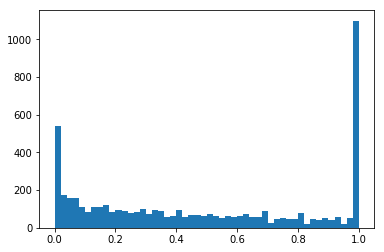

In [29]:
plt.hist(pvalues, bins=50)

In [30]:
num_instructors = [np.sqrt(x[1]) for x in all_pvalues.values()]

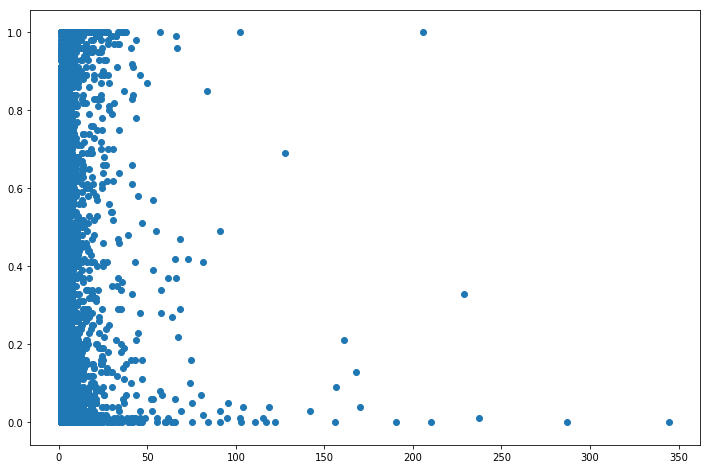

In [34]:
plt.figure(figsize=(12,8))
plt.scatter(num_instructors, pvalues)

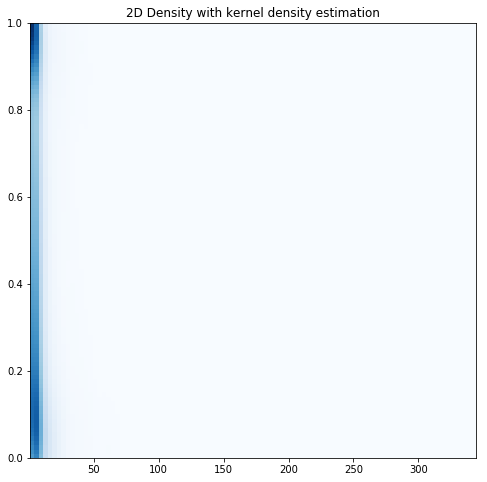

In [39]:
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins = 100
x = np.array(num_instructors)
y = np.array(pvalues)

k = kde.gaussian_kde((x,y))
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# 2D density plot without added shading
plt.figure(figsize=(8,8))
plt.title('2D Density with kernel density estimation')
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap='Blues')

In [36]:
from scipy.stats import kde

(0, 30)

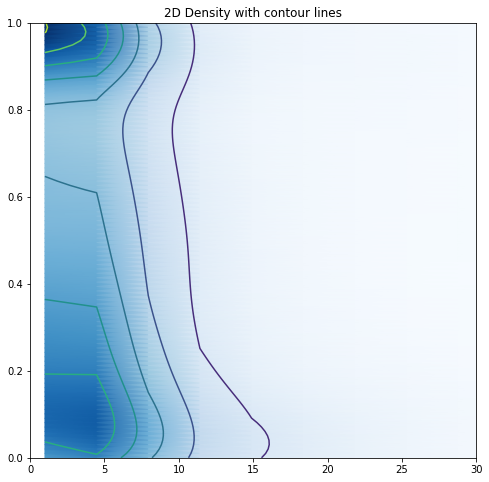

In [41]:
# 2D density plot with added shading
plt.figure(figsize=(8,8))
plt.title('2D Density with contour lines')
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap='Blues')
plt.contour(xi, yi, zi.reshape(xi.shape))
plt.xlim([0,30])

In [50]:
from mod_3_project import *

In [44]:
for key, value in all_pvalues.items():
    if value[0] == 0:
        print(key)

001738d6-6195-3557-8833-83cb53fdc779
00a17f67-ed74-3d86-9876-9a677ef991e4
0197f3d8-785d-3a4e-a93b-06e34105c951
01acecf4-405a-3d69-ace1-021b66465e89
01b263c7-ecf6-3b4b-bc36-05e9f8eec5d1
0254668f-3a95-3c64-8c43-8031b6aa4738
030e093c-c3a6-3091-b521-f7a7639bc5f7
030eac9c-c0a6-392b-9f17-3cf1340f099d
037ad181-fdc8-38e5-891b-c3f3e20c5f4c
037c0e5e-60ab-3f88-b869-51e2b7bea744
04786a2d-c8ba-380c-ad3b-e22f907f1a3b
05230ca0-f556-3276-8f04-421316d4610e
0575e9aa-a99e-360a-a5d3-bae16b50cba3
05a23e8a-6768-31b7-bc62-618483203bdd
05ad6262-1fff-3784-8e26-19f9bf114503
05c282a6-3fdd-3c17-8853-64555c2c677e
05ed7128-53a8-31f1-8cbf-82efdb2321f6
06a5a8e5-1002-3c9a-930d-eee941bd05cb
06de6df0-a0fd-3560-886c-933558b3e6f2
0720ee51-513a-37bf-b7a0-d133a7cb716a
07fad59c-5c8f-3982-9348-eecc09b5b6e7
0810dc81-809d-38a9-8990-c9bf0b6dd0be
08221bc6-7f5e-3383-8dd9-6f83ed8ea11e
088f742d-e47f-35f5-9a15-81119d1bbc7f
092ad737-5ee8-3645-9d25-08192b3d8f67
093b8490-789f-364e-bf69-67bc1e370710
0aac3482-448b-3005-b038-2ff27f15ec44
0

In [51]:
plot_instructor_cdfs(df, "001738d6-6195-3557-8833-83cb53fdc779")

TypeError: get_group() missing 1 required positional argument: 'name'

# Testing function library

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mod_3_project import *

In [3]:
conn, c = connect_to_sql_database()

In [4]:
df = sql_to_pandas_df("""SELECT co.course_uuid as course_uuid,
                    g.course_offering_uuid as course_offering_uuid,
                    t.instructor_id as instructor_id,
                    g.a_count as a_count,
                    g.ab_count as ab_count,
                    g.b_count as b_count,
                    g.bc_count as bc_count,
                    g.c_count as c_count,
                    g.d_count as d_count,
                    g.f_count as f_count
             FROM grade_distributions g
             JOIN course_offerings co ON g.course_offering_uuid = co.uuid
             JOIN sections s ON co.uuid = s.course_offering_uuid
             JOIN teachings t ON t.section_uuid = s.uuid
             """, c)

In [5]:
convert_grades_to_ints(df)

In [6]:
add_total_grades(df)

In [7]:
len(df)

2076665

In [8]:
df = filter_no_grades(df)

In [9]:
len(df)

756253

In [10]:
df = filter_only_one_instructor(df)

In [11]:
len(df)

742616

In [12]:
all_pvalues = pickle.load(open(f"all_pvalues_100.pkl", "rb"))

In [13]:
for key, value in all_pvalues.items():
    if value[0] == 0:
        print(key)

001738d6-6195-3557-8833-83cb53fdc779
00a17f67-ed74-3d86-9876-9a677ef991e4
0197f3d8-785d-3a4e-a93b-06e34105c951
01acecf4-405a-3d69-ace1-021b66465e89
01b263c7-ecf6-3b4b-bc36-05e9f8eec5d1
0254668f-3a95-3c64-8c43-8031b6aa4738
030e093c-c3a6-3091-b521-f7a7639bc5f7
030eac9c-c0a6-392b-9f17-3cf1340f099d
037ad181-fdc8-38e5-891b-c3f3e20c5f4c
037c0e5e-60ab-3f88-b869-51e2b7bea744
04786a2d-c8ba-380c-ad3b-e22f907f1a3b
05230ca0-f556-3276-8f04-421316d4610e
0575e9aa-a99e-360a-a5d3-bae16b50cba3
05a23e8a-6768-31b7-bc62-618483203bdd
05ad6262-1fff-3784-8e26-19f9bf114503
05c282a6-3fdd-3c17-8853-64555c2c677e
05ed7128-53a8-31f1-8cbf-82efdb2321f6
06a5a8e5-1002-3c9a-930d-eee941bd05cb
06de6df0-a0fd-3560-886c-933558b3e6f2
0720ee51-513a-37bf-b7a0-d133a7cb716a
07fad59c-5c8f-3982-9348-eecc09b5b6e7
0810dc81-809d-38a9-8990-c9bf0b6dd0be
08221bc6-7f5e-3383-8dd9-6f83ed8ea11e
088f742d-e47f-35f5-9a15-81119d1bbc7f
092ad737-5ee8-3645-9d25-08192b3d8f67
093b8490-789f-364e-bf69-67bc1e370710
0aac3482-448b-3005-b038-2ff27f15ec44
0

/Users/npschafer/Dropbox/flatiron/repositories/module-3-project-houston-ds-042219/mod_3_project.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[column] = np.random.permutation(df[column])


0.0


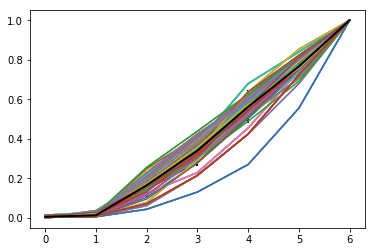

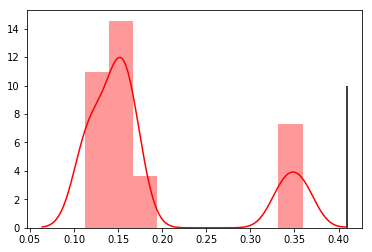

In [37]:
plot_instructor_cdfs(df, "001738d6-6195-3557-8833-83cb53fdc779", npermutations=10, alpha=0.001)

/Users/npschafer/Dropbox/flatiron/repositories/module-3-project-houston-ds-042219/mod_3_project.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[column] = np.random.permutation(df[column])


0.03


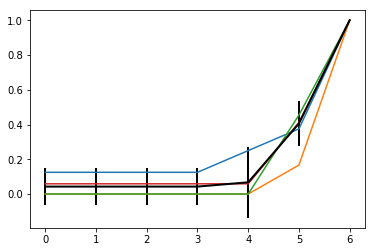

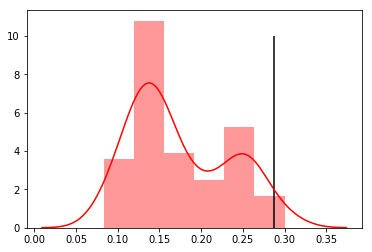

In [41]:
plot_instructor_cdfs(df, "00a17f67-ed74-3d86-9876-9a677ef991e4", npermutations=100)

0.0


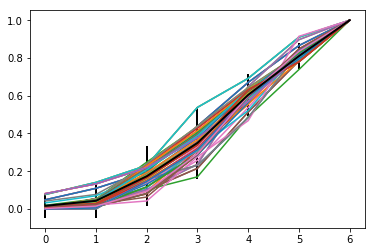

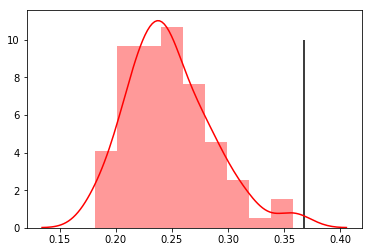

In [42]:
plot_instructor_cdfs(df, "0197f3d8-785d-3a4e-a93b-06e34105c951", npermutations=100)

0.0
0.02
0.01
0.0


KeyboardInterrupt: 

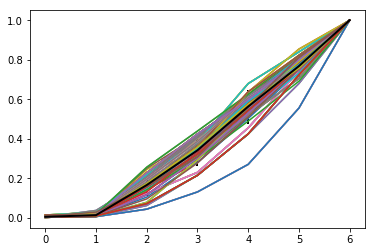

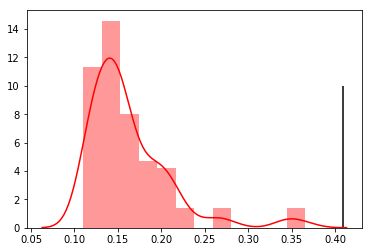

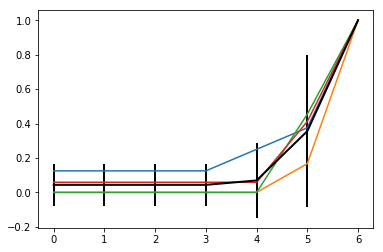

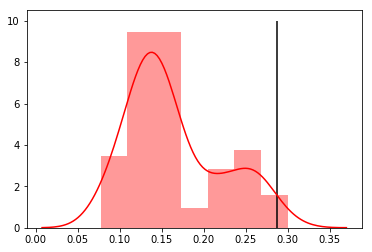

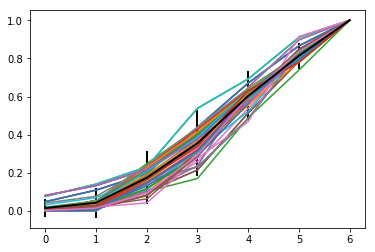

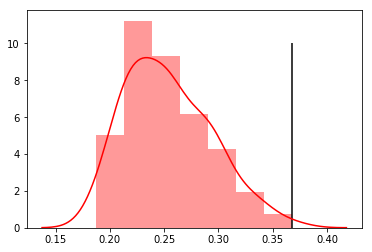

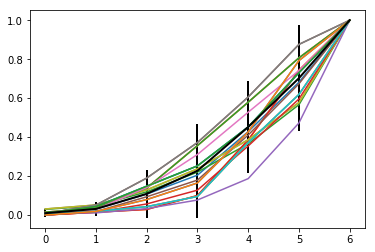

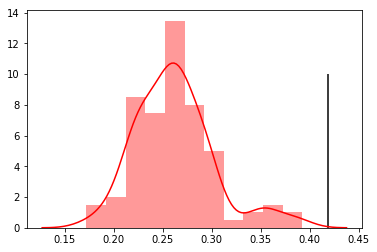

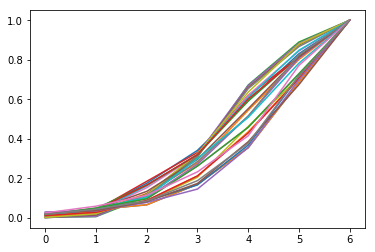

In [43]:
for key, value in all_pvalues.items():
    if value[0] == 0:
        plot_instructor_cdfs(df, key, npermutations=100)

In [44]:
len([x[0] for x in all_pvalues.values() if x[0]==0])

398

<img src="alan-schema.png" width=60%>

New stuff to get
- course name
- course number
- instructor name
- course offering term code
- subject name
- subject code

In [45]:
df = sql_to_pandas_df("""SELECT co.course_uuid as course_uuid,
                    c.name as course_name,
                    c.number as course_number,
                    g.course_offering_uuid as course_offering_uuid,
                    co.term_code as course_offering_term_code,
                    t.instructor_id as instructor_id,
                    i.name as instructor_name,
                    su.name as subject_name,
                    su.code as subject_code,
                    g.a_count as a_count,
                    g.ab_count as ab_count,
                    g.b_count as b_count,
                    g.bc_count as bc_count,
                    g.c_count as c_count,
                    g.d_count as d_count,
                    g.f_count as f_count
             FROM grade_distributions g
             JOIN course_offerings co ON g.course_offering_uuid = co.uuid
             JOIN sections s ON co.uuid = s.course_offering_uuid
             JOIN teachings t ON t.section_uuid = s.uuid
             JOIN courses c ON c.uuid = co.course_uuid
             JOIN instructors i ON i.id = t.instructor_id
             JOIN subject_memberships sm ON sm.course_offering_uuid = co.uuid
             JOIN subjects su ON su.code = sm.subject_code
             """, c)

In [46]:
zero_pvalue_uuids = [key for key, value in all_pvalues.items() if value[0] == 0]

In [60]:
df[df["course_uuid"].isin(zero_pvalue_uuids)]["subject_name"].unique()

array(['Folklore Program', 'Communication Arts', 'Geoscience',
       'Anthropology', 'Microbiology', 'Religious Studies',
       'Air Force Aerospace Studies', 'History', 'Biology', 'Zoology',
       'Art Department', 'Music', 'Chemistry', 'Physics',
       'Latin (Classics)', 'East Asian Area Studies', 'Political Science',
       'Environmental Studies - Gaylord Nelson Institute',
       'Communication Sciences and Disorders', 'Astronomy', 'Mathematics',
       'Geography', 'English', 'Theatre and Drama',
       'Integrated Liberal Studies', 'Afro-American Studies',
       'Asian American Studies', 'Botany', 'Genetics', 'Psychology',
       'Sociology', 'International Business',
       'Biological Systems Engineering', 'History of Science',
       'Art History', 'Landscape Architecture',
       'Engineering Mechanics and Astronautics', 'Comparative Literature',
       'Spanish (Spanish and Portuguese)', 'Social Work',
       'Accounting and Information Systems', 'Dance',
       'Medi

In [81]:
zero_pvalue_course_count = df[df["course_uuid"].isin(zero_pvalue_uuids)][["course_uuid", "subject_name"]].drop_duplicates().groupby("subject_name").size().sort_values(ascending=False)

In [82]:
course_count = df[["course_uuid", "subject_name"]].drop_duplicates().groupby("subject_name").size().sort_values(ascending=False)

In [85]:
type(zero_pvalue_course_count)

pandas.core.series.Series

In [90]:
sorted_courses = []
for course, count in zero_pvalue_course_count.iteritems():
    fraction = count/float(course_count[course])
    sorted_courses.append((course, fraction))

In [93]:
sorted(sorted_courses, key=lambda x: x[1], reverse=True)

[('General Business', 0.2631578947368421),
 ('Integrated Liberal Studies', 0.22857142857142856),
 ('Actuarial Science', 0.2),
 ('Emergency Medicine', 0.2),
 ('Accounting and Information Systems', 0.1794871794871795),
 ('International Business', 0.16666666666666666),
 ('East Asian Area Studies', 0.16666666666666666),
 ('Communication Arts', 0.16153846153846155),
 ('History', 0.15434083601286175),
 ('Physical Therapy', 0.15151515151515152),
 ('Anesthesiology', 0.125),
 ('Pharmacy Practice', 0.12280701754385964),
 ('Risk Management and Insurance', 0.12),
 ('Asian American Studies', 0.12),
 ('Occupational Therapy (Department of Kinesiology)', 0.11538461538461539),
 ('Environmental Studies - Gaylord Nelson Institute', 0.11486486486486487),
 ('History of Science', 0.11392405063291139),
 ('Management and Human Resources', 0.10909090909090909),
 ('Legal Studies', 0.10714285714285714),
 ('Economics', 0.1),
 ('Air Force Aerospace Studies', 0.1),
 ('Marketing', 0.0975609756097561),
 ('Physics', 0

In [95]:
one_pvalue_uuids = [key for key, value in all_pvalues.items() if value[0] == 1]

In [96]:
one_pvalue_course_count = df[df["course_uuid"].isin(one_pvalue_uuids)][["course_uuid", "subject_name"]].drop_duplicates().groupby("subject_name").size().sort_values(ascending=False)


In [97]:
course_count = df[["course_uuid", "subject_name"]].drop_duplicates().groupby("subject_name").size().sort_values(ascending=False)

In [100]:
sorted_courses = []
for course, count in one_pvalue_course_count.iteritems():
    fraction = count/float(course_count[course])
    sorted_courses.append((course, fraction))

In [101]:
sorted(sorted_courses, key=lambda x: x[1], reverse=True)

[('Integrated Arts', 1.0),
 ('Neuroscience', 0.6666666666666666),
 ('Pharmacy', 0.625),
 ('CLINICAL LABORATORY SCIENCE', 0.4838709677419355),
 ('Medical Sciences - Veterinary Medicine', 0.46153846153846156),
 ('Genetics', 0.43478260869565216),
 ('Agroecology', 0.4),
 ('Surgical Sciences', 0.36666666666666664),
 ('Medical Genetics', 0.34782608695652173),
 ('Ophthalmology and Visual Sciences', 0.3333333333333333),
 ('Biomolecular Chemistry', 0.3),
 ('Latin (Classics)', 0.2857142857142857),
 ('Farm & Industry Short Course', 0.26666666666666666),
 ('Integrated Science', 0.25),
 ('Biochemistry', 0.24615384615384617),
 ('Physical Therapy', 0.24242424242424243),
 ('Civil Society and Community Studies', 0.23809523809523808),
 ('Military Science', 0.2222222222222222),
 ('Entomology', 0.21739130434782608),
 ('WILDLIFE ECOLOGY', 0.21428571428571427),
 ('English', 0.2087912087912088),
 ('Psychology', 0.20437956204379562),
 ('Comparative Literature', 0.20408163265306123),
 ('Agronomy', 0.1956521739

In [102]:
df[df["subject_name"]=="Integrated Arts"]["course_name"].unique()

array(['The Studio Seminar: Mapping Your Creative Practice'], dtype=object)

In [103]:
df[df["subject_name"]=="Neuroscience"]["course_name"].unique()

array(['Independent Work', 'Lab Course in Neurobiology and Behavior',
       'Behavioral Neuroendocrinology Seminar'], dtype=object)

In [104]:
df[df["subject_name"]=="Pharmacy"]["course_name"].unique()

array(['Drug Interactions', 'Nonprescription Medications',
       'Pharmaceutical Biotechnology and Pharmacogenomics',
       'Research Ethics: Scientific Integrity and the Responsible Conduct of Research',
       'Safety and Quality in the Medication Use System',
       'Substance Abuse and Chemical Dependence', 'Exploring Pharmacy I',
       'Interprofessional Public Health Leadership'], dtype=object)

In [105]:
df[df["subject_name"]=="Genetics"]["course_name"].unique()

array(['Heredity', 'Independent Study', 'Principles of Genetics',
       'Basic Cytology and Laboratory Procedures', 'Genetics Laboratory',
       'Molecular Approaches for Potential Crop Improvement',
       'Human Genetics', 'Companion Research Seminar',
       'The Female Reproductive System', 'Clinical Practice I',
       'The Respiratory System', 'The Genitourinary System',
       'Advanced Microbial Genetics', 'Prokaryotic Molecular Biology',
       'Population Genetics', 'Biology and Genetics of Filamentous Fungi',
       'Advanced Topics in Genetics', 'Special Problems',
       'Advanced Genetics', 'Advanced Clinical Genetics Concepts',
       'Regulatory Mechanisms in Plant Development', 'Special Topics',
       'Computation and Informatics in Biology and Medicine',
       'Seminar in Animal Breeding', 'Seminar-Plant Breeding', 'Research',
       'Seminar in Genetics', 'Freshman Seminar in Genetics',
       'Advanced Laboratory Procedures', 'Molecular Evolution',
       'Intro

In [107]:
df[(df["subject_name"]=="Genetics") & (df["course_uuid"].isin(one_pvalue_uuids))]

,course_uuid,course_name,course_number,course_offering_uuid,course_offering_term_code,instructor_id,instructor_name,subject_name,subject_code,a_count,ab_count,b_count,bc_count,c_count,d_count,f_count
396445,81f80f31-015a-30dc-b468-9b62e78c68d4,Independent Study,299,e756fedf-f4c8-3f61-9225-8284b33840f6,1112,812237,PAUL SONDEL,Genetics,412,0,0,0,0,0,0,0
396446,81f80f31-015a-30dc-b468-9b62e78c68d4,Independent Study,299,e756fedf-f4c8-3f61-9225-8284b33840f6,1112,812237,PAUL SONDEL,Genetics,412,0,0,0,0,0,0,0
396447,81f80f31-015a-30dc-b468-9b62e78c68d4,Independent Study,299,e756fedf-f4c8-3f61-9225-8284b33840f6,1112,812237,PAUL SONDEL,Genetics,412,0,0,0,0,0,0,0
396448,81f80f31-015a-30dc-b468-9b62e78c68d4,Independent Study,299,e756fedf-f4c8-3f61-9225-8284b33840f6,1112,812237,PAUL SONDEL,Genetics,412,0,0,0,0,0,0,0
396449,81f80f31-015a-30dc-b468-9b62e78c68d4,Independent Study,299,e756fedf-f4c8-3f61-9225-8284b33840f6,1112,812237,PAUL SONDEL,Genetics,412,0,0,0,0,0,0,0
396450,81f80f31-015a-30dc-b468-9b62e78c68d4,Independent Study,299,e756fedf-f4c8-3f61-9225-8284b33840f6,1112,812237,PAUL SONDEL,Genetics,412,0,0,0,0,0,0,0
396451,81f80f31-015a-30dc-b468-9b62e78c68d4,Independent Study,299,e756fedf-f4c8-3f61-9225-8284b33840f6,1112,812237,PAUL SONDEL,Genetics,412,0,0,0,0,0,0,0
396452,81f80f31-015a-30dc-b468-9b62e78c68d4,Independent Study,299,e756fedf-f4c8-3f61-9225-8284b33840f6,1112,812237,PAUL SONDEL,Genetics,412,0,0,0,0,0,0,0
396453,81f80f31-015a-30dc-b468-9b62e78c68d4,Independent Study,299,e756fedf-f4c8-3f61-9225-8284b33840f6,1112,812237,PAUL SONDEL,Genetics,412,0,0,0,0,0,0,0
396454,81f80f31-015a-30dc-b468-9b62e78c68d4,Independent Study,299,e756fedf-f4c8-3f61-9225-8284b33840f6,1112,812237,PAUL SONDEL,Genetics,412,0,0,0,0,0,0,0


/Users/npschafer/Dropbox/flatiron/repositories/module-3-project-houston-ds-042219/mod_3_project.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[column] = np.random.permutation(df[column])


1.0


/Users/npschafer/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/npschafer/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


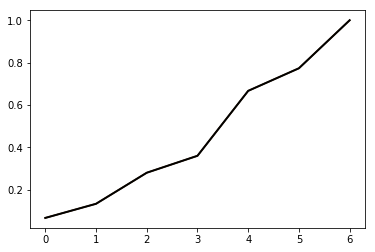

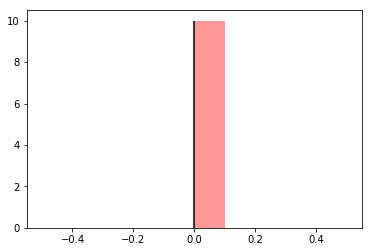

In [108]:
plot_instructor_cdfs(df, "81871cfc-c65d-3a57-aa1c-2e9382c8e51d")

In [110]:
df[df["course_uuid"] == "81871cfc-c65d-3a57-aa1c-2e9382c8e51d"]

,course_uuid,course_name,course_number,course_offering_uuid,course_offering_term_code,instructor_id,instructor_name,subject_name,subject_code,a_count,ab_count,b_count,bc_count,c_count,d_count,f_count
2204304,81871cfc-c65d-3a57-aa1c-2e9382c8e51d,General Genetics 2,468,cc863707-7736-3cf0-9043-23fb186cf684,1174,467681,WILLIAM ENGELS,Genetics,412,17,8,23,6,11,5,5
2204305,81871cfc-c65d-3a57-aa1c-2e9382c8e51d,General Genetics 2,468,cc863707-7736-3cf0-9043-23fb186cf684,1174,2602114,ALLEN LAUGHON,Genetics,412,17,8,23,6,11,5,5


## Dropping duplicate course_offering_uuid

In [139]:
df = sql_to_pandas_df("""SELECT co.course_uuid as course_uuid,
                    c.name as course_name,
                    c.number as course_number,
                    g.course_offering_uuid as course_offering_uuid,
                    co.term_code as course_offering_term_code,
                    t.instructor_id as instructor_id,
                    i.name as instructor_name,
                    su.name as subject_name,
                    su.code as subject_code,
                    g.a_count as a_count,
                    g.ab_count as ab_count,
                    g.b_count as b_count,
                    g.bc_count as bc_count,
                    g.c_count as c_count,
                    g.d_count as d_count,
                    g.f_count as f_count
             FROM grade_distributions g
             JOIN course_offerings co ON g.course_offering_uuid = co.uuid
             JOIN sections s ON co.uuid = s.course_offering_uuid
             JOIN teachings t ON t.section_uuid = s.uuid
             JOIN courses c ON c.uuid = co.course_uuid
             JOIN instructors i ON i.id = t.instructor_id
             JOIN subject_memberships sm ON sm.course_offering_uuid = co.uuid
             JOIN subjects su ON su.code = sm.subject_code
             """, c)

In [140]:
convert_grades_to_ints(df)

In [141]:
add_total_grades(df)

In [142]:
len(df)

2206765

In [143]:
df = filter_no_grades(df)

In [144]:
len(df)

860334

In [145]:
df = filter_only_one_instructor(df)

In [146]:
len(df)

844190

In [121]:
# df = filter_duplicate_course_offering_uuids(df)

In [122]:
# len(df)

47800

In [123]:
all_pvalues = compare_instructor_grade_distributions_by_permutation(df, 
                                                                    npermutations=100, 
                                                                    load_existing_pickle=False, 
                                                                    print_progress=True)

/Users/npschafer/Dropbox/flatiron/repositories/module-3-project-houston-ds-042219/mod_3_project.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[column] = np.random.permutation(df[column])


0.0 00060aa6-37a0-31ea-9cbc-764733edaa37 0.25 5
0.00019275250578257516 0008ba14-8d7a-3648-a092-9af2afd01474 0.17 2
0.00038550501156515033 0009e5ca-836c-3770-bf9e-7ad53caee832 0.88 4
0.0005782575173477255 0016a642-b100-3c2c-83ea-bcb8d18622fd 0.3 3
0.0007710100231303007 001738d6-6195-3557-8833-83cb53fdc779 0.81 21
0.0009637625289128759 00311152-1b06-32b8-b282-969566843287 0.71 19
0.001156515034695451 0038a678-b176-3a32-ba12-41c27a3aa0f6 1.0 2


KeyboardInterrupt: 

In [147]:
groups_list = list(df.groupby("course_offering_uuid"))

In [148]:
for i in range(50):
    print(i, len(groups_list[i][1]))

0 1
1 16
2 1
3 1
4 8
5 12
6 2
7 3
8 12
9 1
10 1
11 4
12 1
13 2
14 7
15 1
16 84
17 5
18 8
19 12
20 25
21 1
22 6
23 4
24 8
25 10
26 1
27 15
28 8
29 2
30 4
31 49
32 2
33 1
34 12
35 1
36 5
37 1
38 1
39 1
40 3
41 10
42 3
43 1
44 2
45 3
46 2
47 1
48 1
49 4


In [152]:
'-'.join(sorted(groups_list[1][1]["instructor_id"].unique()))

'3616341-3923237-4255194-4438032-4543527-4600126-782235'

In [153]:
'-'.join(['blah'])

'blah'

In [155]:
df.head(50)

,course_uuid,course_name,course_number,course_offering_uuid,course_offering_term_code,instructor_id,instructor_name,subject_name,subject_code,a_count,ab_count,b_count,bc_count,c_count,d_count,f_count,total_grades
0,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,344b3ebe-da7e-314c-83ed-9425269695fd,1092,761703,JOHN ARCHAMBAULT,Biomedical Engineering,207,105,0,0,0,0,0,0,105
1,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,344b3ebe-da7e-314c-83ed-9425269695fd,1092,761703,JOHN ARCHAMBAULT,Chemical and Biological Engineering,220,105,0,0,0,0,0,0,105
2,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,344b3ebe-da7e-314c-83ed-9425269695fd,1092,761703,JOHN ARCHAMBAULT,Civil and Environmental Engineering,240,105,0,0,0,0,0,0,105
3,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,344b3ebe-da7e-314c-83ed-9425269695fd,1092,761703,JOHN ARCHAMBAULT,Electrical and Computer Engineering,320,105,0,0,0,0,0,0,105
4,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,344b3ebe-da7e-314c-83ed-9425269695fd,1092,761703,JOHN ARCHAMBAULT,Engineering Mechanics and Astronautics,346,105,0,0,0,0,0,0,105
5,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,344b3ebe-da7e-314c-83ed-9425269695fd,1092,761703,JOHN ARCHAMBAULT,Industrial and Systems Engineering,490,105,0,0,0,0,0,0,105
6,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,344b3ebe-da7e-314c-83ed-9425269695fd,1092,761703,JOHN ARCHAMBAULT,Mechanical Engineering,612,105,0,0,0,0,0,0,105
7,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,344b3ebe-da7e-314c-83ed-9425269695fd,1092,761703,JOHN ARCHAMBAULT,Materials Science and Engineering,636,105,0,0,0,0,0,0,105
8,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,1082,761703,JOHN ARCHAMBAULT,Biomedical Engineering,207,158,0,0,0,0,0,0,158
9,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,1082,761703,JOHN ARCHAMBAULT,Chemical and Biological Engineering,220,158,0,0,0,0,0,0,158


In [156]:
from mod_3_project import *

In [157]:
make_combined_instructor_ids_for_team_teachers(df)

In [158]:
df.head(50)

,course_uuid,course_name,course_number,course_offering_uuid,course_offering_term_code,instructor_id,instructor_name,subject_name,subject_code,a_count,ab_count,b_count,bc_count,c_count,d_count,f_count,total_grades
0,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,344b3ebe-da7e-314c-83ed-9425269695fd,1092,761703,JOHN ARCHAMBAULT,Biomedical Engineering,207,105,0,0,0,0,0,0,105
1,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,344b3ebe-da7e-314c-83ed-9425269695fd,1092,761703,JOHN ARCHAMBAULT,Chemical and Biological Engineering,220,105,0,0,0,0,0,0,105
2,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,344b3ebe-da7e-314c-83ed-9425269695fd,1092,761703,JOHN ARCHAMBAULT,Civil and Environmental Engineering,240,105,0,0,0,0,0,0,105
3,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,344b3ebe-da7e-314c-83ed-9425269695fd,1092,761703,JOHN ARCHAMBAULT,Electrical and Computer Engineering,320,105,0,0,0,0,0,0,105
4,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,344b3ebe-da7e-314c-83ed-9425269695fd,1092,761703,JOHN ARCHAMBAULT,Engineering Mechanics and Astronautics,346,105,0,0,0,0,0,0,105
5,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,344b3ebe-da7e-314c-83ed-9425269695fd,1092,761703,JOHN ARCHAMBAULT,Industrial and Systems Engineering,490,105,0,0,0,0,0,0,105
6,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,344b3ebe-da7e-314c-83ed-9425269695fd,1092,761703,JOHN ARCHAMBAULT,Mechanical Engineering,612,105,0,0,0,0,0,0,105
7,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,344b3ebe-da7e-314c-83ed-9425269695fd,1092,761703,JOHN ARCHAMBAULT,Materials Science and Engineering,636,105,0,0,0,0,0,0,105
8,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,1082,761703,JOHN ARCHAMBAULT,Biomedical Engineering,207,158,0,0,0,0,0,0,158
9,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,1082,761703,JOHN ARCHAMBAULT,Chemical and Biological Engineering,220,158,0,0,0,0,0,0,158


In [159]:
len(df)

844190

In [160]:
df = filter_duplicate_course_offering_uuids(df)

In [161]:
len(df)

47800

In [162]:
df.head()

,course_uuid,course_name,course_number,course_offering_uuid,course_offering_term_code,instructor_id,instructor_name,subject_name,subject_code,a_count,ab_count,b_count,bc_count,c_count,d_count,f_count,total_grades
0,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,344b3ebe-da7e-314c-83ed-9425269695fd,1092,761703,JOHN ARCHAMBAULT,Biomedical Engineering,207,105,0,0,0,0,0,0,105
8,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,1082,761703,JOHN ARCHAMBAULT,Biomedical Engineering,207,158,0,0,0,0,0,0,158
17,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,ea3b717c-d66b-30dc-8b37-964d9688295f,1172,3677061-761703,JOHN ARCHAMBAULT,Biomedical Engineering,207,139,12,2,0,3,0,0,156
57,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,075da420-5f49-3dd0-93df-13e3c152e1b1,1114,761703,JOHN ARCHAMBAULT,Biomedical Engineering,207,87,0,0,0,0,0,0,87
73,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1,2b4e216d-a728-3713-8c7c-19afffc6b2fd,1104,761703,JOHN ARCHAMBAULT,Biomedical Engineering,207,70,0,0,0,0,0,0,70


In [165]:
%%time
all_pvalues = compare_instructor_grade_distributions_by_permutation(df, 
                                                                    npermutations=10, 
                                                                    load_existing_pickle=False, 
                                                                    print_progress=True)

5188 unique courses found
0.0 00060aa6-37a0-31ea-9cbc-764733edaa37 0.2 7
0.00019275250578257516 0008ba14-8d7a-3648-a092-9af2afd01474 0.0 2
0.00038550501156515033 0009e5ca-836c-3770-bf9e-7ad53caee832 0.4 3
0.0005782575173477255 0016a642-b100-3c2c-83ea-bcb8d18622fd 0.4 6
0.0007710100231303007 001738d6-6195-3557-8833-83cb53fdc779 1.0 22
0.0009637625289128759 00311152-1b06-32b8-b282-969566843287 1.0 22
0.001156515034695451 0038a678-b176-3a32-ba12-41c27a3aa0f6 1.0 2
0.0013492675404780262 0039d485-90d6-30cc-aac4-fe36a8021b19 0.0 2
0.0015420200462606013 003e7bf5-85a2-369b-a0d6-b6215231a67c 1.0 22
0.0017347725520431765 003fbdbf-277c-3eae-bcc9-4e09e05f925b 1.0 1
0.0019275250578257518 005123fb-4f4d-3b2a-892c-33bbe79964f1 1.0 2
0.002120277563608327 00820589-1457-3756-8de6-95f302b554bb 0.3 3
0.002313030069390902 008a6c97-fc09-3672-a1c8-110fb3e6c258 1.0 10
0.0025057825751734772 009bdb47-39c1-34d5-8cbb-e3c5ebdff217 1.0 1
0.0026985350809560524 00a17f67-ed74-3d86-9876-9a677ef991e4 0.2 4
0.002891287586

KeyboardInterrupt: 

In [ ]:
grouped_courses = df.groupby("course_uuid")
for course_index, (course, course_df) in enumerate(grouped_courses): 
    grouped_course_offerings = course_df.groupby("instructor_id")
    num_instructors = len(grouped_course_offerings)
    print(course_index, num_instructors, [course_df[x].unique() for x in course_df.columns])
#     if num_instructors == 22:
#         print(course_index, num_instructors)
#         print(course_df.head(1))

In [177]:
course_df.head()

,course_uuid,course_name,course_number,course_offering_uuid,course_offering_term_code,instructor_id,instructor_name,subject_name,subject_code,a_count,ab_count,b_count,bc_count,c_count,d_count,f_count,total_grades
911178,ffee6d0f-6a9d-3a4b-aea8-ac46c6804beb,Special Problems,699,923e7764-fe35-3b6f-a8dc-3fe4cb9bafe5,1114,147387-244306-2600137-2600159-2600271-2600432-...,ASEEM ANSARI,Biochemistry,200,5,1,0,0,0,0,0,6
911690,ffee6d0f-6a9d-3a4b-aea8-ac46c6804beb,Special Problems,699,beba5f14-b2f7-30f2-b668-c54d9d37abfb,1082,244306-2600137-2600432-2600550-2600648-2600739...,MICHAEL COX,Biochemistry,200,6,0,0,0,0,0,0,6
911925,ffee6d0f-6a9d-3a4b-aea8-ac46c6804beb,Special Problems,699,6c1c6583-2efa-3013-9694-28faa8f9fa5a,1162,147387-189155-244306-2600007-2600137-2600271-2...,MICHAEL COX,Biochemistry,200,7,0,0,0,0,0,0,7
912459,ffee6d0f-6a9d-3a4b-aea8-ac46c6804beb,Special Problems,699,99f36863-1f85-3718-b586-4b1f51136efa,1084,195780-244306-2600159-2600550-2600630-2600648-...,SAMUEL BUTCHER,Biochemistry,200,7,0,0,0,0,0,0,7
912835,ffee6d0f-6a9d-3a4b-aea8-ac46c6804beb,Special Problems,699,58ba7d9f-4843-3d8b-b2b5-18d8da40f7db,1152,189155-2600007-2600137-2600271-2600432-2600491...,BRIAN FOX,Biochemistry,200,6,0,0,0,0,0,0,6


<img src="alan-schema.png" width=60%>

In [184]:
sections_df = sql_to_pandas_df("""SELECT * 
                    FROM sections""", c)

In [185]:
sections_df.head()

,uuid,course_offering_uuid,section_type,number,room_uuid,schedule_uuid
0,"uuid,course_offering_uuid,section_type,number,...",None,None,None,None,None
1,"45adf63c-48c9-3659-8561-07556d2d4ddf"",""344b3eb...",None,None,None,None,None
2,"c6280e23-5e43-3859-893e-540d94993529"",""f718e6c...",None,None,None,None,None
3,"9395dc21-15d1-3fab-8d1f-6f3fe6114c48"",""ea3b717...",None,None,None,None,None
4,"b99e440b-39db-350a-81eb-b6eb1bd8b0bc"",""ea3b717...",None,None,None,None,None


In [187]:
sections_df["section_type"].unique()

array([None, 'section_type', 'FLD', 'LAB', 'LEC', 'IND', 'DIS', 'SEM'],
      dtype=object)

## Getting only lecture courses

In [205]:
df = sql_to_pandas_df("""SELECT co.course_uuid as course_uuid,
                    c.name as course_name,
                    c.number as course_number,
                    g.course_offering_uuid as course_offering_uuid,
                    s.section_type as section_type,
                    co.term_code as course_offering_term_code,
                    t.instructor_id as instructor_id,
                    i.name as instructor_name,
                    su.name as subject_name,
                    su.code as subject_code,
                    g.a_count as a_count,
                    g.ab_count as ab_count,
                    g.b_count as b_count,
                    g.bc_count as bc_count,
                    g.c_count as c_count,
                    g.d_count as d_count,
                    g.f_count as f_count
             FROM grade_distributions g
             JOIN course_offerings co ON g.course_offering_uuid = co.uuid
             JOIN sections s ON co.uuid = s.course_offering_uuid
             JOIN teachings t ON t.section_uuid = s.uuid
             JOIN courses c ON c.uuid = co.course_uuid
             JOIN instructors i ON i.id = t.instructor_id
             JOIN subject_memberships sm ON sm.course_offering_uuid = co.uuid
             JOIN subjects su ON su.code = sm.subject_code
             """, c)

In [206]:
convert_grades_to_ints(df)

In [207]:
add_total_grades(df)

In [208]:
len(df)

2206765

In [209]:
df = filter_no_grades(df)

In [210]:
len(df)

860334

In [211]:
df = get_only_lecture_section(df)

In [212]:
len(df)

402289

In [213]:
make_combined_instructor_ids_for_team_teachers(df)

In [214]:
len(df)

402289

In [215]:
df = filter_duplicate_course_offering_uuids(df)

In [216]:
len(df)

42527

In [217]:
df = filter_only_one_instructor(df)

In [218]:
len(df)

35078

In [219]:
all_pvalues = compare_instructor_grade_distributions_by_permutation(df, 
                                                                    npermutations=10, 
                                                                    load_existing_pickle=False, 
                                                                    print_progress=True)

3584 unique courses found
0.0 00060aa6-37a0-31ea-9cbc-764733edaa37 0.5 7
0.00027901785714285713 0008ba14-8d7a-3648-a092-9af2afd01474 0.2 2
0.0005580357142857143 0009e5ca-836c-3770-bf9e-7ad53caee832 0.6 3
0.0008370535714285714 0016a642-b100-3c2c-83ea-bcb8d18622fd 0.1 6
0.0011160714285714285 001738d6-6195-3557-8833-83cb53fdc779 0.5 19
0.0013950892857142857 0038a678-b176-3a32-ba12-41c27a3aa0f6 1.0 2
0.0016741071428571428 0039d485-90d6-30cc-aac4-fe36a8021b19 0.0 2
0.001953125 003e7bf5-85a2-369b-a0d6-b6215231a67c 0.2 5
0.002232142857142857 003fbdbf-277c-3eae-bcc9-4e09e05f925b 0.7 2
0.0025111607142857145 008a6c97-fc09-3672-a1c8-110fb3e6c258 0.7 4
0.0027901785714285715 00a17f67-ed74-3d86-9876-9a677ef991e4 0.3 4
0.0030691964285714285 00bcfa1d-ebe1-3209-bbd3-99d930ac649d 1.0 6
0.0033482142857142855 010f43a6-ec05-30ab-aad7-c1f700131ab7 0.2 3
0.003627232142857143 0116084b-a3b9-38a7-8b5f-f5a43352bdea 0.0 2
0.00390625 0184f9fa-3037-3391-987b-fd61338ed226 0.2 5
0.004185267857142857 0197f3d8-785d-3a4

0.03655133928571429 08f88aea-49fd-36e6-89aa-f54f1570b6db 0.6 3
0.036830357142857144 09174a00-f267-3220-881f-42eaf21c690b 0.5 7
0.037109375 09184bb8-9ef6-3816-89ea-736b162f5bb0 0.4 3
0.037388392857142856 092ad737-5ee8-3645-9d25-08192b3d8f67 0.1 2
0.03766741071428571 093268f4-bcf5-35b2-96a5-0fbb932a262f 0.3 5
0.03794642857142857 0937548f-70a7-3366-baa7-c9431f01c465 0.2 5
0.03822544642857143 096fd735-e31d-336b-9226-90acab908c11 0.7 5
0.03850446428571429 09a5958b-658c-35e4-a78f-f0c0eb507471 0.1 3
0.038783482142857144 09b2e759-804a-39e1-8068-97073774bd8b 0.2 5
0.0390625 09dba54c-b65e-3bf5-bce4-dba8a38b9a4f 1.0 4
0.039341517857142856 09e0571b-23c8-3919-942a-c318bc1eafaf 0.0 2
0.03962053571428571 09f3df76-2b80-3835-9068-3f0ac19b4ab2 0.2 3
0.03989955357142857 0a020520-bf69-3a8f-8759-ad36ff0c89a4 1.0 3
0.04017857142857143 0a0309ed-b30a-3d96-9281-01ca77064324 0.3 6
0.04045758928571429 0a08e177-277d-32ee-b765-026b2df1a54b 1.0 2
0.040736607142857144 0a0ef37b-40a7-3f94-9916-4ac24a0527b7 1.0 3
0.041

0.07366071428571429 11d88007-c0c7-335f-9e55-6723ff0606af 0.5 8
0.07393973214285714 11f4f0e9-e218-364f-80ef-6d1fcfb4eeb8 1.0 5
0.07421875 11ff96e1-3465-3f63-89f9-0e62357aa798 0.7 16
0.07449776785714286 1231884b-1174-3a18-b5a7-ca6da5175395 0.7 4
0.07477678571428571 1233b4d1-438d-3e13-ab45-25d273fdbdc1 0.4 5
0.07505580357142858 1236113a-9593-3019-b818-6a03e81c3960 0.3 2
0.07533482142857142 12376d79-c8f2-3c65-b20e-9f96c2bb58ec 0.0 8
0.07561383928571429 12493d6b-fd31-3bd6-9271-8e2187596d37 0.7 3
0.07589285714285714 124be584-113f-342a-b245-0518685bcd93 1.0 3
0.076171875 125449f4-d43d-31ef-b1e8-066f370d2890 0.8 4
0.07645089285714286 125d4bd6-a46e-3911-b239-0b5b17c003fb 0.4 4
0.07672991071428571 1264b9c5-ed96-379c-9e69-23af9ff3cfd4 0.2 2
0.07700892857142858 12c3729b-e855-3452-a8d2-c9c2ca7c208f 0.0 2
0.07728794642857142 12ca2ac4-75e3-30af-abac-15d18fedda3e 0.4 4
0.07756696428571429 130a1b1b-b47d-333f-853a-593c6af57c7a 0.6 20
0.07784598214285714 133749ec-90ac-31ce-8cda-4210d49c49c5 1.0 2
0.07812

0.11077008928571429 1b65bb5e-f7ed-3a59-9cc5-f3d9bbb05a91 0.1 4
0.11104910714285714 1b845df8-4497-3f54-ab38-4639ae596d75 0.2 3
0.111328125 1b854f6c-48a8-38a2-93f2-581c46da7a67 0.5 11
0.11160714285714286 1b87fde7-0d16-391e-9e76-89eaded67243 0.2 2
0.11188616071428571 1ba6af83-66cc-3db1-a023-bd8583bc72ef 0.5 4
0.11216517857142858 1ba704ae-8e01-34dd-adc7-507aa72a2f13 1.0 2
0.11244419642857142 1bad27ad-87c8-3c07-ac56-f704a1203db3 0.5 7
0.11272321428571429 1be215aa-10ac-3f64-8ab5-1772aac56d49 0.8 2
0.11300223214285714 1beadc0b-1044-3ef0-8b89-dc1ee67beb07 0.4 15
0.11328125 1bef08aa-5eb7-3bc0-b742-a2336e1a02cc 1.0 18
0.11356026785714286 1bf97d09-2630-377b-af97-6f2a930d612c 0.2 8
0.11383928571428571 1c095262-2cd7-3066-b364-c9f6e62d0e8c 0.7 2
0.11411830357142858 1c312620-c9c8-3ae5-9543-8520ff784ed2 0.0 2
0.11439732142857142 1c4c0a37-03c9-309a-8f3c-43f979d818f5 1.0 10
0.11467633928571429 1c5d3d0d-b157-3eda-a5ed-0e279a9fb1bd 0.1 2
0.11495535714285714 1c84080e-6d59-355f-bf5b-e9cdb99bf32f 0.2 6
0.115

0.14787946428571427 24d21afb-f99c-3116-ba01-cc572c7a40de 1.0 9
0.14815848214285715 24f2f19c-078e-3b34-8726-2a7ddb5d9abe 0.1 3
0.1484375 24f7a4f2-f774-3243-88eb-acb6ba04fd5b 0.4 15
0.14871651785714285 2502501a-1748-38d6-bf09-61b0a1df1bfe 0.8 2
0.14899553571428573 2504876e-400f-3c9d-92bf-d5af1848a6ce 0.1 8
0.14927455357142858 25074b16-4eae-39ff-8048-003004bf333a 0.2 2
0.14955357142857142 2509d11a-3f00-3761-a17d-de80b92ef9a8 0.0 5
0.14983258928571427 253cf5dd-c828-31ef-a89c-4f56aeb94306 0.5 2
0.15011160714285715 25600839-a06c-3d73-adc5-8b2cd3860d07 0.4 4
0.150390625 25626680-1fae-366b-bc0c-d04cdbfb6c5d 0.4 6
0.15066964285714285 25919dc8-a0ab-3e24-ab38-6e47bdf04e98 0.8 2
0.15094866071428573 25ac8f5d-709d-30d4-add4-ef1869f66daf 0.5 4
0.15122767857142858 25b47981-1e26-33c5-9666-a2584e53e41d 1.0 22
0.15150669642857142 25c1b534-c687-3c7f-b026-8995ec4d5e09 0.7 7
0.15178571428571427 25cacb10-8ceb-3224-9713-4c5ab1769051 1.0 2
0.15206473214285715 25cb6878-ca6c-3f9a-aa5b-452daa493601 1.0 2
0.152343

0.18498883928571427 2e146a07-22c5-313b-b8d3-af8aeda08293 0.7 9
0.18526785714285715 2e6f287f-a48b-3748-9948-7dac9c2fb9bb 0.1 9
0.185546875 2e8da4f9-925e-3202-b2db-47febb290017 0.5 6
0.18582589285714285 2e8dc527-d984-3020-8003-c7d63e1d64c5 0.9 5
0.18610491071428573 2e9d55b7-d822-344c-ba99-2e3a90ec2724 1.0 3
0.18638392857142858 2e9df6c3-8d49-3cc7-8fdd-0c2be74096a8 0.4 5
0.18666294642857142 2eacb08c-4327-3ff0-aa76-deb43ec562c4 0.4 8
0.18694196428571427 2eafe9a6-8a4b-3c84-841b-8df193fbd0f3 0.7 19
0.18722098214285715 2ec133bf-7702-3d72-854f-7f1badb303fe 0.7 2
0.1875 2ec3d5e7-60dd-331d-a49f-b06868748cf4 0.7 8
0.18777901785714285 2ec6fbb6-4806-3349-9f19-c25be24830e7 0.0 5
0.18805803571428573 2ed3ebc6-fa6d-380d-b73a-34ce67fddbe5 1.0 4
0.18833705357142858 2eea3caf-fe28-34c7-adb4-3ff997699595 1.0 2
0.18861607142857142 2f15aa39-c8de-31fb-a3f8-7ad8fac4d6af 0.0 2
0.18889508928571427 2f1bdf17-3550-30c5-90ca-471ad39b1d1b 1.0 4
0.18917410714285715 2f2b0d2c-96d5-3ced-8295-39af30bcb4f9 0.3 5
0.189453125 

0.22209821428571427 366714bd-5513-3f00-8af3-1f250ecb4062 0.1 4
0.22237723214285715 366c0b37-d058-3ff3-a9f0-2834ec916cb9 0.3 2
0.22265625 3673b8f6-99c5-309c-ab21-3f8e843c6341 0.4 3
0.22293526785714285 36be8119-ca39-31f4-855e-b5288e65e2d0 0.5 8
0.22321428571428573 36e5b2d6-eb32-3ad3-b942-efaa59f93d5a 0.4 5
0.22349330357142858 36ef426f-03c5-32f0-9877-6f37ad95a232 0.1 4
0.22377232142857142 36efc986-1ace-3ab5-8d39-472b4893b339 0.1 2
0.22405133928571427 36f5865c-55ae-3cbe-89b0-68f6dec5f6c7 1.0 2
0.22433035714285715 36ff3bec-2c78-38e4-9458-3094ebc93820 1.0 2
0.224609375 370be059-d2ff-365f-88ff-0d0663fc972c 0.3 5
0.22488839285714285 371525f0-413e-376e-9ec5-43b905793e13 0.6 2
0.22516741071428573 371e8df6-2151-3963-ba12-162251ddd720 0.5 2
0.22544642857142858 373d0c73-8ca2-36cb-9275-bf0fa3b21ea6 0.9 5
0.22572544642857142 374e1a21-e20f-3c14-b3a0-22cb61db78e7 0.5 5
0.22600446428571427 375be695-8a2b-327f-a297-f7dbc97ce275 0.3 7
0.22628348214285715 375e0a24-cff8-3753-a5e7-1d91f789d088 0.1 2
0.2265625

0.2592075892857143 3ea026e5-388a-3eba-8e7d-619624eb5eb0 0.5 2
0.25948660714285715 3ebe298f-71dc-3c35-9df4-98485ee66258 0.1 5
0.259765625 3ed07991-2c95-32cc-9142-615ca136e4c0 1.0 2
0.26004464285714285 3ed12c58-e1b4-37d7-ade4-e19ac0311dda 0.4 3
0.2603236607142857 3eeaa564-9167-3dfc-b92d-36b780335ac8 1.0 2
0.26060267857142855 3ef3ba60-426e-39ad-a61f-17d381b193d6 0.9 21
0.26088169642857145 3f03f27a-ffce-3257-b8f1-c0ec5670df7b 0.7 8
0.2611607142857143 3f1a2473-b3f9-3cc2-9c03-5dc7535e0122 0.3 2
0.26143973214285715 3f379625-610e-335f-abd6-afb15c992124 1.0 7
0.26171875 3f42988a-0728-313d-89f5-ff2f0f5a02c0 1.0 3
0.26199776785714285 3f439fa7-ec2b-3b57-a1f4-0765d9bdc705 1.0 3
0.2622767857142857 3f53e373-5f48-3f2d-9f43-dc0057090083 1.0 2
0.26255580357142855 3f8d6841-b281-396d-bcc5-d16588a97e5c 1.0 3
0.26283482142857145 3f8e754d-c789-32e0-bf4e-8abd6d44f70c 0.8 4
0.2631138392857143 3f8f938d-9aa5-3c9c-a01f-0fe59c31dfaa 0.3 18
0.26339285714285715 3fa811fb-2400-3b77-8e2d-44f8e9d9800a 0.7 5
0.263671875 

0.2963169642857143 4868e6c2-a8fa-3bfc-8d1b-4f59d5df8509 0.0 2
0.29659598214285715 486c3064-a720-31db-8d0c-3d1398b53f3e 0.9 4
0.296875 4877dc81-3924-3af9-b23c-080731070e04 0.1 2
0.29715401785714285 488f8c5a-2a58-3973-8110-bcedd96149bd 1.0 17
0.2974330357142857 48abe767-9aeb-3ad8-a36f-d6b1483d8f28 1.0 2
0.29771205357142855 48affed2-0e88-3234-82a3-b0fe0d4dd434 0.5 11
0.29799107142857145 48c5f8d2-27c2-3cce-acc6-50b7d0d68a49 0.7 2
0.2982700892857143 48ea9244-bccb-3abd-9295-fd2933c91687 1.0 2
0.29854910714285715 491245e9-daba-32b3-a39e-d5c39d4fc217 1.0 2
0.298828125 491b7c48-edd7-334a-b0fe-468c9f2c2391 0.4 2
0.29910714285714285 4923ed83-74bb-389e-88e2-e66faf1f121d 0.0 8
0.2993861607142857 492f64d4-4c54-33b9-815e-fa1d66ff188e 0.1 5
0.29966517857142855 4936ef11-c672-3453-988e-b3d7ce0bb4cc 1.0 12
0.29994419642857145 49485b4a-ed54-3c2b-a1aa-d54a5990e0c7 1.0 2
0.3002232142857143 49902e8b-49fb-39fe-b6eb-0a321691ea91 0.0 2
0.30050223214285715 49ab3664-b2d6-3493-aabd-008123987124 1.0 3
0.30078125 49

0.33370535714285715 534e8555-79a9-373e-9c35-549e76c4c66d 0.3 2
0.333984375 535b8fd3-cee7-3400-ac64-6d1d41ae68bb 0.3 2
0.33426339285714285 53791164-92b5-3024-8226-be46ce35712d 1.0 6
0.3345424107142857 5395f5c6-68c4-3a81-ab4b-525365d12c55 0.2 7
0.33482142857142855 53afeb69-82d2-39fb-b952-c912a383fbea 0.0 3
0.33510044642857145 53c36728-5c8b-30f8-8323-a24044270303 1.0 2
0.3353794642857143 5445daae-7d9e-33eb-8754-d6d93bd2bfee 0.6 4
0.33565848214285715 544fdb91-b3fa-33d7-9f6b-f35743329ba2 0.5 8
0.3359375 5470e727-b373-3c92-8229-03942101e332 0.2 2
0.33621651785714285 547b978f-6db9-3680-b73f-52e9cfe190d8 0.4 8
0.3364955357142857 5480959a-7832-31ed-91ce-2ed4add767d7 1.0 2
0.33677455357142855 54900332-20c3-3249-ab1b-d24e3ce2b457 0.0 7
0.33705357142857145 54e5edce-799b-3d36-9b5a-063a1d51a41c 0.4 3
0.3373325892857143 54e6c019-87ab-3825-89db-bb40a725bc8c 0.0 7
0.33761160714285715 54ec4068-98ef-3cee-9ebf-0ab52691efb1 1.0 16
0.337890625 54fc4d31-9cdc-37f0-8871-0726281af9b4 1.0 2
0.33816964285714285 5

0.37109375 5d70a0f7-02a1-3fc5-8cdf-56d0e514bb4b 1.0 4
0.37137276785714285 5d7903d0-2c64-3643-b87a-f2af1fe3cd2a 0.5 3
0.3716517857142857 5d996275-ff1c-35de-b3d2-4b9dac307f02 1.0 9
0.37193080357142855 5daf717c-469b-3704-abf0-08fddb7d959e 1.0 2
0.37220982142857145 5db53337-fbe5-3664-b2b6-0f9cceef8d12 0.0 2
0.3724888392857143 5db9c638-5930-3831-befb-e7b7fa6e45a7 0.3 2
0.37276785714285715 5dbfad55-f6c1-3435-bff5-ae198fc144df 1.0 2
0.373046875 5dbfbb6d-ff27-3dc4-8fc0-62119fbeea10 0.2 4
0.37332589285714285 5dc023e9-3c8d-3e59-89e5-5313bce8b2cb 0.9 2
0.3736049107142857 5dc085e8-9d11-3882-a03e-b7bc3b25a193 0.2 5
0.37388392857142855 5dd5af18-a349-3295-984e-e17e7edfa147 0.8 2
0.37416294642857145 5ddecf7c-ef39-3412-8e44-da7353e73872 0.4 4
0.3744419642857143 5de0ca17-bbab-3b5a-a658-c584fce31523 1.0 11
0.37472098214285715 5de4ce5f-013d-378d-88f3-90636a0828fb 0.0 3
0.375 5de87c7d-4beb-36a9-9f64-4702a218c355 0.7 6
0.37527901785714285 5e007a8b-d9e8-338b-a627-faa33b5fad71 1.0 2
0.3755580357142857 5e02ab4

0.40848214285714285 65d770d3-a246-31e7-9e41-603f1b0e791e 1.0 2
0.4087611607142857 660199d9-a07e-3e7c-9950-d9a6331fda52 0.2 10
0.40904017857142855 661131a8-e10a-393a-81d6-2822c49a27f1 0.4 6
0.40931919642857145 661542b5-6ee1-313b-bd67-b7866bce6738 0.5 2
0.4095982142857143 66479171-ff14-321b-89e8-09d859c9806e 1.0 21
0.40987723214285715 666992b9-d23d-34ae-88be-a8ba078c68b0 0.2 6
0.41015625 666b65e6-ba35-3f2d-889e-131e9104df8b 0.9 2
0.41043526785714285 667e12ac-b792-32e1-a84d-334ea88b8263 0.9 2
0.4107142857142857 66823017-e29a-3712-b7fd-9af486c19e71 0.3 2
0.41099330357142855 6684b759-c543-3e4b-a47a-b89dffc3102b 0.7 3
0.41127232142857145 6689b449-61db-3f1a-8556-bb5f9691e4a7 0.6 8
0.4115513392857143 66a0e66c-c517-3846-9269-036965e74348 0.0 3
0.41183035714285715 66a6d85f-ba85-3edd-9172-4737da7474e2 1.0 2
0.412109375 66acd537-334c-3161-8a95-8e738f5dcafd 1.0 2
0.41238839285714285 66d2d90d-7133-34a2-9e38-ead779998b2a 1.0 2
0.4126674107142857 66d63101-b315-39b0-985d-cb2b20e02ede 0.2 6
0.4129464285

0.4458705357142857 7050f083-da66-326b-90b3-0e1afac304d2 1.0 4
0.44614955357142855 705c01b1-f920-326a-87db-20e48f01e9bf 0.5 2
0.44642857142857145 707b272c-9b13-3127-bd25-6c15d5839ffa 0.5 2
0.4467075892857143 707ff8ce-8e84-332e-8555-f21a116bc3ea 1.0 3
0.44698660714285715 7082120e-8b69-3c48-93fb-9476fc429a7a 0.2 2
0.447265625 70a888bf-8eb0-3090-a116-76f30e3dd245 0.2 5
0.44754464285714285 70b33bf2-8831-302a-a558-79ce2445eea2 0.2 4
0.4478236607142857 70b718dc-e850-33ea-ace6-7912d0cf6f25 0.8 18
0.44810267857142855 70b796d9-95ec-30ee-8d69-fdcdd63c9bf0 0.6 2
0.44838169642857145 70cb36d8-8877-3572-89e0-b9d1b3dab647 0.8 6
0.4486607142857143 70d6c39d-fa77-3694-8f17-7394b2ea0f69 0.5 5
0.44893973214285715 70e5589b-7b17-3d73-96e5-963aa567f5bb 1.0 11
0.44921875 70ed2244-cda1-312b-a31f-ccd3ea7f481f 0.5 8
0.44949776785714285 710b9455-81ca-3bba-9d1a-9f8883fe41f0 0.5 2
0.4497767857142857 710cddd1-8c64-30b9-8d45-a52894583a34 0.9 8
0.45005580357142855 710f0b23-1cec-3e93-9c60-347929330352 0.3 3
0.4503348214

0.48325892857142855 79b4b7ce-529b-3f35-ad90-c3d069f4326e 0.0 2
0.48353794642857145 79b6ea04-6cd0-3b3f-b213-b06fcccf5bc9 1.0 2
0.4838169642857143 79d53326-6ed9-3fa9-94cb-3fa9793959ee 0.6 2
0.48409598214285715 79e9ba50-740a-35d0-924e-cc4f870147d6 0.9 3
0.484375 79ecfd38-9542-3ee2-a308-df4692103d85 1.0 21
0.48465401785714285 7a033000-694d-394c-9508-6c1fcbcb9106 0.5 2
0.4849330357142857 7a1f40ae-41dc-331a-825c-4584e12bd245 1.0 4
0.48521205357142855 7a54e474-3227-39ad-af90-a70cad591d4d 0.1 4
0.48549107142857145 7a552326-da08-354c-aafc-f56edcf83f44 1.0 22
0.4857700892857143 7a5651a0-10e8-310e-a481-a4ed48f4560f 0.0 7
0.48604910714285715 7a5f33cb-37ba-306d-aa7b-8e0cb345d9a4 0.0 3
0.486328125 7a70dda0-b4ca-3e44-9024-80d354169a4c 1.0 4
0.48660714285714285 7a764d07-543f-30d7-b9c6-38cfa8422a22 1.0 2
0.4868861607142857 7ab72e36-358f-32c2-9152-389d80d31595 0.1 2
0.48716517857142855 7acd1a64-1c53-36d6-bbf3-7770e0ec52aa 0.0 5
0.48744419642857145 7aeb5a2f-d89a-36a6-91b5-087b015b46e4 1.0 22
0.4877232142

0.5206473214285714 84aee85b-eaad-3425-8a42-8cf3d1ef58e7 0.7 2
0.5209263392857143 84b69e1b-80e2-3265-99fe-9f5701bd9849 0.0 4
0.5212053571428571 84f254a0-c8c6-3b3d-81ef-17331bf84571 0.1 2
0.521484375 84ff7796-d97f-3f4a-987c-858e26e5375c 0.2 3
0.5217633928571429 85091315-2606-35ba-b9e3-dceb24335332 0.2 10
0.5220424107142857 853fc578-d572-3092-bd0b-cf72fd928dff 1.0 2
0.5223214285714286 855044d1-8f3d-3660-9437-1cd37faca6c7 1.0 21
0.5226004464285714 8552178d-4059-317a-a1e0-e89edd505ca5 1.0 3
0.5228794642857143 8576e136-9581-3225-ab5e-992dfabb0442 0.2 4
0.5231584821428571 857ee218-94ea-348f-ace8-81d1b14610bb 0.6 6
0.5234375 858da9fe-0ee7-3831-8d5c-b6e8986a2d44 0.4 3
0.5237165178571429 85ab5a2c-0477-373e-a3bf-44d9ca7bb578 0.2 5
0.5239955357142857 85c6e6ae-ead8-3a11-a560-fcdea67643c3 0.5 2
0.5242745535714286 85d76a6d-14ae-39a4-bca1-bde90c3fae1b 0.6 7
0.5245535714285714 85dc5e15-56ba-3865-b947-5c7ba3b0c11e 1.0 22
0.5248325892857143 85e3e255-5bad-36de-b289-e5d9a7ef8a92 0.4 10
0.5251116071428571 8

0.5583147321428571 8f05fa0f-bf19-3cfa-903f-608f915a1f0c 0.8 7
0.55859375 8f4507d6-5448-349b-a4b0-bf5ab265356c 0.5 4
0.5588727678571429 8f49b179-1190-33a3-8928-5434508098af 1.0 7
0.5591517857142857 8f6096ee-1c1b-3ab8-9584-daa1022e1bbc 0.3 2
0.5594308035714286 8f64ef61-083a-3ebb-aa44-ad8343bc397f 0.4 2
0.5597098214285714 8f83fee9-57a2-3b84-914f-6bf845fdb346 0.7 2
0.5599888392857143 8fc782a9-d193-3079-b947-0f6d47bddcfb 0.3 3
0.5602678571428571 8fc945a1-c6cc-3b21-9d5a-f7ecab4b1b16 0.5 8
0.560546875 8fd38ca8-1e29-37aa-a92d-d5d80c4cc9c9 0.6 10
0.5608258928571429 8fd3a5a2-f236-3b9a-8020-469e095b14cf 0.3 4
0.5611049107142857 8fda5115-4287-343c-8e3d-98d963512339 0.1 7
0.5613839285714286 900bf928-ed91-30d5-8efb-47892e404558 0.7 2
0.5616629464285714 900f314b-6b6d-35f8-ab1f-534912985b80 0.1 3
0.5619419642857143 90435727-d686-3ffa-9295-875d09d68c4e 0.3 7
0.5622209821428571 90503533-ad14-3d92-b770-493fe6bc6c8d 0.8 2
0.5625 905227a3-bc36-3592-a25c-fab68353d27d 0.7 7
0.5627790178571429 906dfc9e-fde2-3

0.5959821428571429 99b23208-04e4-393b-bcf6-06fe708c5bb5 1.0 2
0.5962611607142857 99bcb709-9080-304a-9fce-c17e578a5c12 0.0 6
0.5965401785714286 99be314a-93e7-39ee-8617-1a2360608021 0.2 5
0.5968191964285714 99c8f542-28ef-3023-b3d9-6d04ee0be572 1.0 2
0.5970982142857143 99e4bd1b-b6ba-30eb-a1de-16d528671ddf 0.0 3
0.5973772321428571 99e595bc-33a0-3490-937f-81eaf47ee9f5 0.7 5
0.59765625 99e9c065-6dba-30ad-8193-8c9d6820ff86 0.6 7
0.5979352678571429 99f113b2-8847-3e17-8fcb-8fe8ed154782 1.0 2
0.5982142857142857 99f1e6ee-bf62-38ed-9115-ea877e0225b5 0.6 3
0.5984933035714286 99fd057b-b443-3b3e-b5a7-5d7a392e90ad 0.0 3
0.5987723214285714 9a268158-5d08-3b7f-819b-6d8d3dab80d0 0.1 3
0.5990513392857143 9a55dfaa-9a10-3e10-becb-ca5f046e49e0 0.4 2
0.5993303571428571 9aa4af24-42a3-344b-982d-f8493100a1f3 0.9 5
0.599609375 9aa6caf1-0637-327e-a6fd-ae43da873488 1.0 7
0.5998883928571429 9aab1745-614a-3b7f-8932-709d98711898 0.1 2
0.6001674107142857 9ab08aa6-d9ef-3353-894d-dfaf1ce174ed 0.4 5
0.6004464285714286 9ae4

0.6336495535714286 a3f70fe9-e260-3e63-ba7e-a9384f9353fc 1.0 2
0.6339285714285714 a40683ba-e6b0-3f12-8f7a-57aff95c2ed9 1.0 22
0.6342075892857143 a40a6a1c-f683-37a7-8206-a2931a5f5540 0.6 9
0.6344866071428571 a41be17e-cfb2-354f-98a0-301154563b81 0.0 6
0.634765625 a466149e-f4d5-3329-8ffb-efaa5139f91e 0.2 2
0.6350446428571429 a4810d71-f3fb-3068-b43c-ab2bfd1e781d 0.3 4
0.6353236607142857 a4d3c159-c3da-3660-8557-bf4824c43548 1.0 3
0.6356026785714286 a4dcc153-1a04-39d8-9b28-b56fb4fa5266 0.7 14


KeyboardInterrupt: 

In [220]:
all_pvalues = compare_instructor_grade_distributions_by_permutation(df, 
                                                                    npermutations=100, 
                                                                    load_existing_pickle=False, 
                                                                    print_progress=True)

3584 unique courses found


/Users/npschafer/Dropbox/flatiron/repositories/module-3-project-houston-ds-042219/mod_3_project.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[columns] = np.random.permutation(df[columns])
/Users/npschafer/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


KeyboardInterrupt: 